# **NAME**- SWASTIK ROY CHOUDHURY

### **Email Id** - swastikroychoudhury014@gmail.com



# **Title**
**FutureCart**: *AI-Driven Demand Prediction for Smarter Retail.*

## **Project Statement:**
In the realm of E-commerce, demand forecasting plays a pivotal role in ensuring business success. This project aims to develop a demand forecasting model in an E-commerce business that predicts future product demand leveraging time series analysis and multivariate regression based on historical sales data, along with Google Analytics KPIs such as Google clicks and Facebook impressions, which are valuable indicators of customer interest.

## **Outcomes**

**>Improved Inventory Management:** More accurate demand forecasts lead to better inventory decisions, potentially reducing stock-outs and excess inventory.

**>Enhanced Marketing Efficiency:** Identify periods of high demand for targeted marketing campaigns, optimizing resource allocation.

**>Data-Driven Decision Making:** Reliable forecasts provide a basis for business decisions, such as pricing adjustments or product promotions.

**>Accurate Demand Predictions:** Implement a forecasting model that achieves high accuracy in predicting future demands, thereby improving customer service levels.

**>Scalable Solution:** Develop a solution that can scale to handle large datasets and varying demand patterns across multiple products.

# **Milestone 1: Week 1**
## Module 1: Data Collection
• Understanding the problem statement

• Gathering sales data from relevant sources (database, store records)

• Collecting Google Analytics and Facebook Impressions data

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**Datasets Used**

In [ ]:
import pandas as pd

# Loading the Excel files from your Google Drive
df1 = pd.read_excel('/content/drive/MyDrive/Data/ProductA.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_fb_impressions.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_google_clicks.xlsx')

# Displaying the first 5 rows of each DataFrame
print("Top 5 rows of ProductA.xlsx:")
print(df1.head())

print("\nTop 5 rows of ProductA_fb_impressions.xlsx:")
print(df2.head())

print("\nTop 5 rows of ProductA_google_clicks.xlsx:")
print(df3.head())


Top 5 rows of ProductA.xlsx:
   Day Index  Quantity
0 2021-12-01        14
1 2021-12-02        10
2 2021-12-03        13
3 2021-12-04        22
4 2021-12-05        33

Top 5 rows of ProductA_fb_impressions.xlsx:
   Day Index  Impressions
0 2021-12-01          620
1 2021-12-02          890
2 2021-12-03          851
3 2021-12-04          881
4 2021-12-05          678

Top 5 rows of ProductA_google_clicks.xlsx:
   Day Index  Clicks
0 2021-12-01     445
1 2021-12-02     433
2 2021-12-03     424
3 2021-12-04     427
4 2021-12-05     451


**MERGING THE DATASETS INTO A MASTER DATASET**

In [ ]:
import pandas as pd

# Loading the Excel files from Google Drive
df1 = pd.read_excel('/content/drive/MyDrive/Data/ProductA.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_fb_impressions.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_google_clicks.xlsx')

# Merge the DataFrames on 'Day Index' using left join
merged_df = df1.merge(df2, how="left", on='Day Index').merge(df3, how="left", on='Day Index')

# All rows and columns of the merged DataFrame are displayed below
print(merged_df)

# Saving the merged DataFrame to a new Excel file
output_file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
merged_df.to_excel(output_file_path, index=False)
print(f"Merged dataset saved as '{output_file_path}'")



     Day Index  Quantity  Impressions  Clicks
0   2021-12-01        14          620     445
1   2021-12-02        10          890     433
2   2021-12-03        13          851     424
3   2021-12-04        22          881     427
4   2021-12-05        33          678     451
..         ...       ...          ...     ...
207 2022-06-26        13         1218     114
208 2022-06-27        16         1311     106
209 2022-06-28        13          885     109
210 2022-06-29        16         1000      60
211 2022-06-30         8          875      65

[212 rows x 4 columns]
Merged dataset saved as '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'


# **Milestone 1: Week 2**
## Module 2: Exploratory Data Analysis (EDA) and Data Preprocessing

• Ensuring my sales data is in a time series format (e.g., daily, weekly, monthly) with timestamps.

• Cleaning and formating data, handling missing values and outliers. Address them using appropriate techniques (imputation, elimination).

• Ploting the distribution plots on independent variables.

• Visualizations to understand trends, seasonality, and correlations.

• Statistical summaries.

**BASIC CHECKS ON DAILY TRENDS**

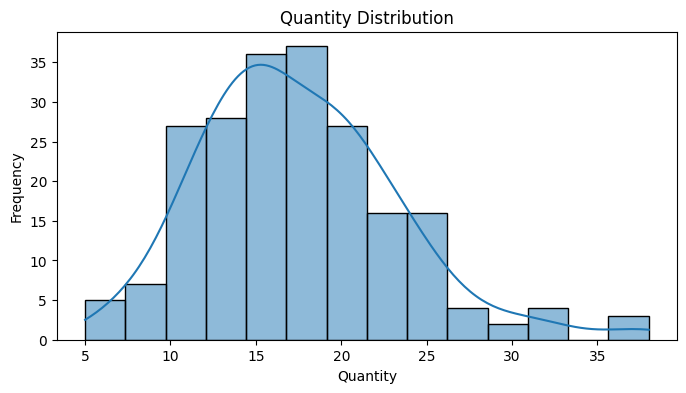

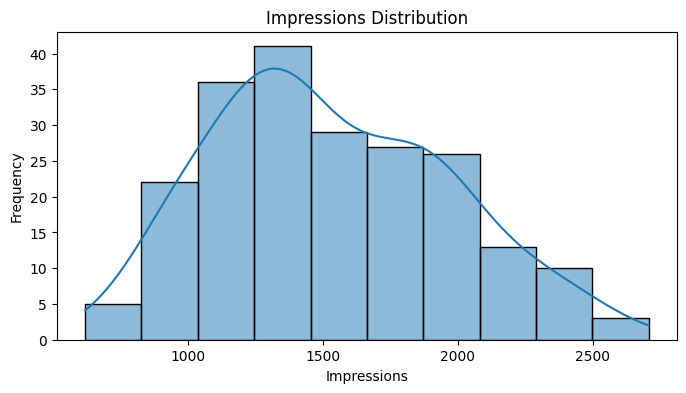

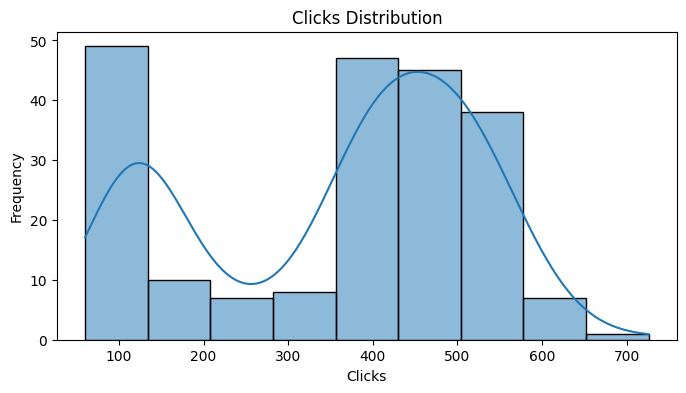

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

## Distribution Plots with Insights
for col in ['Quantity', 'Impressions', 'Clicks']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### **Observations from the Distribution Plots**

- I analyzed the distribution of **Quantity**, **Impressions**, and **Clicks** to understand the data spread and identify any skewness or outliers.
- Here are my insights from each distribution plot:

   1. Each plot clearly shows the overall data spread for the respective feature, helping me identify skewness or outliers in the data.
   2. Peaks within these distributions indicate common value ranges, suggesting typical behavior or stable periods.
   3. Higher peaks likely represent frequent events or periods with steady demand, providing insights into regular patterns.
   4. Valleys or dips in the distributions reveal less common occurrences, potentially pointing to gaps or less frequent demand.
   5. These plots are essential for assessing the data distribution, identifying unusual data points, and informing any data cleaning steps required.

**SALES(QUANTITY THROUGH TIME)**

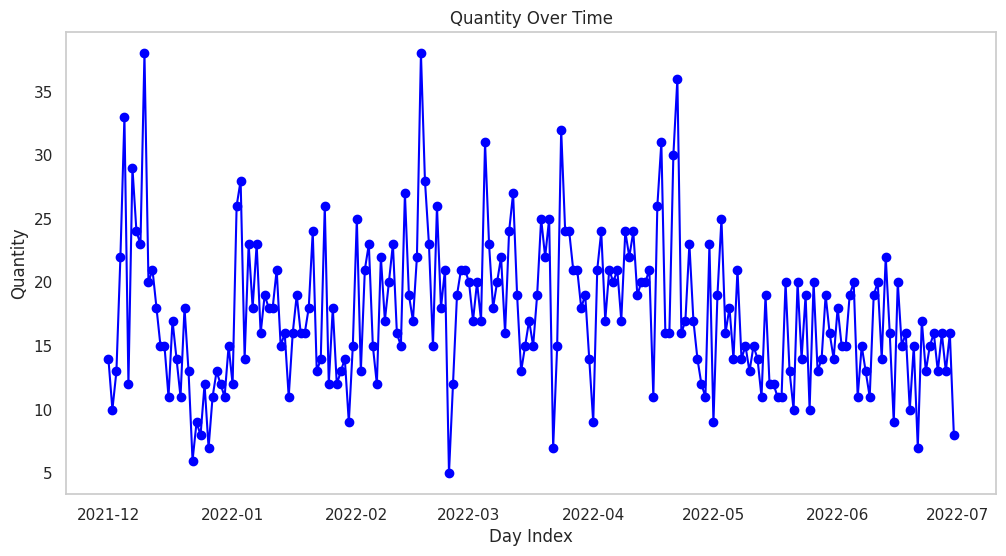

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
df = pd.read_excel(file_path)

# Plot Quantity over time (Day Index)
plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Quantity'], color='blue', marker='o', linestyle='-')
plt.title('Quantity Over Time')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid()
plt.show()


**Quantity Over Time:**

*  I was noticing fluctuations in the quantity values across different days. Some days were showing spikes, which might have been indicating high-demand periods or special events.
*  I was observing consistent patterns on other days, suggesting regular activity.

**CLICKS THROUGH TIME**

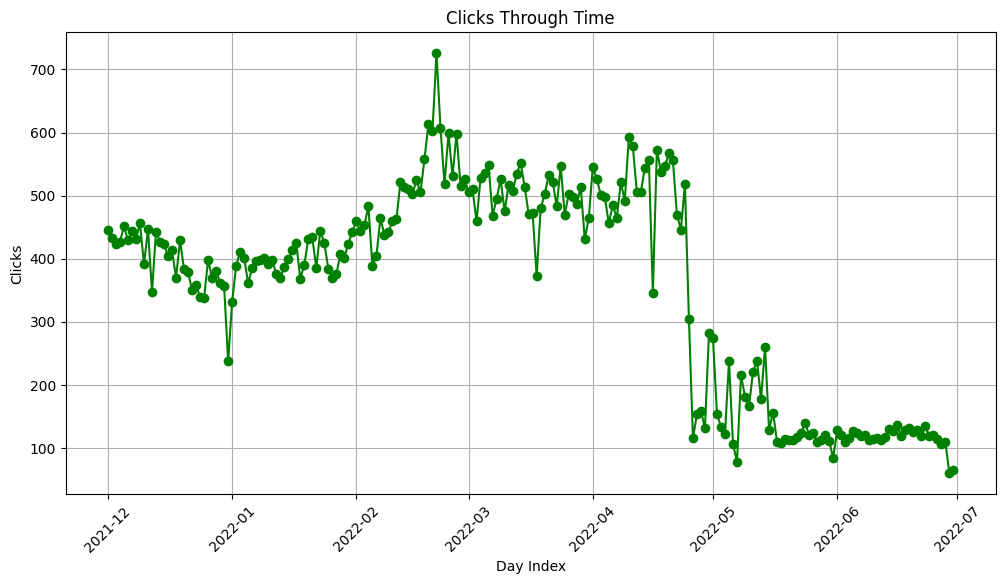

In [ ]:
import pandas as pd

# Load the uploaded dataset to examine its structure
file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
df = pd.read_excel(file_path)

import matplotlib.pyplot as plt

# Ensure 'Day Index' is in datetime format for better plotting
df['Day Index'] = pd.to_datetime(df['Day Index'])

# Plot Clicks Through Time
plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Clicks'], color='green', marker='o', linestyle='-')
plt.title('Clicks Through Time')
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.grid()
plt.xticks(rotation=45)
plt.show()

**Clicks Through Time:**

*  As I was plotting clicks over time, I was identifying certain days where the clicks were peaking, possibly aligning with user engagement during specific campaigns or promotions.

*  I was noticing lower values on some days, which might have been reflecting reduced user activity or less effective marketing.

# **IMPRESSION THROUGH TIME**

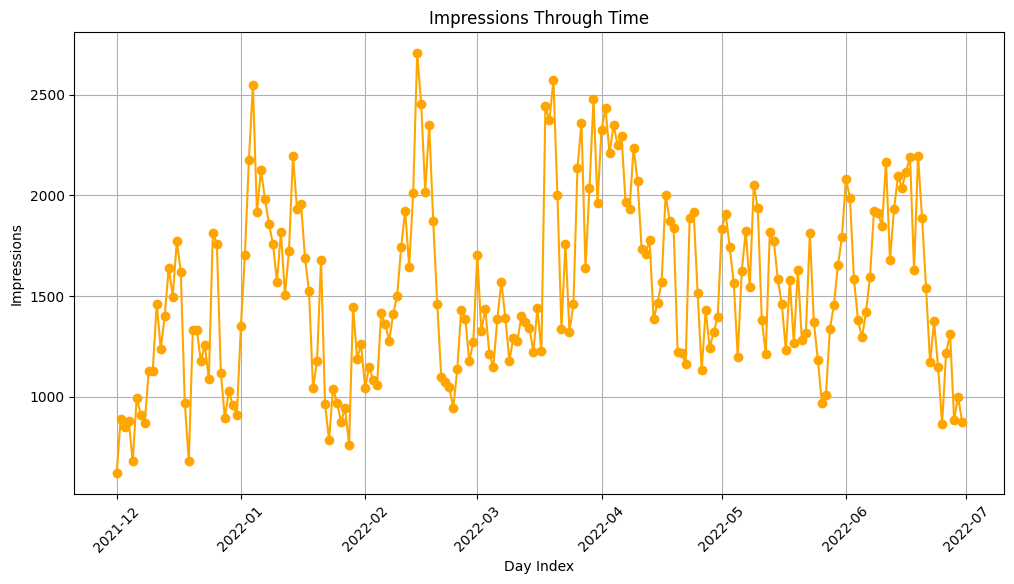

In [ ]:

# Plot Impressions Through Time
plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Impressions'], color='orange', marker='o', linestyle='-')
plt.title('Impressions Through Time')
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.grid()
plt.xticks(rotation=45)
plt.show()





**Impressions Through Time:**

*  When I was examining impressions, I was seeing trends where visibility was either increasing or remaining steady on certain days.

*  I was also identifying some dips in impressions, which could have been caused by external factors like reduced ad spend or visibility.

**Detecting Missing Values and Cleaning Dataset**

In [ ]:
import pandas as pd

# Loading the uploaded Excel file

data = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

# Finding missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


**No Missing Values Detected**

**DROPPING DUPLICATES**

In [ ]:
import pandas as pd

# Load the uploaded Excel file
data = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

# Drop duplicate rows
data = data.drop_duplicates()

# Verify if duplicates are dropped
print("Number of rows after dropping duplicates:", data.shape[0])


Number of rows after dropping duplicates: 212


**BOXPLOTS**

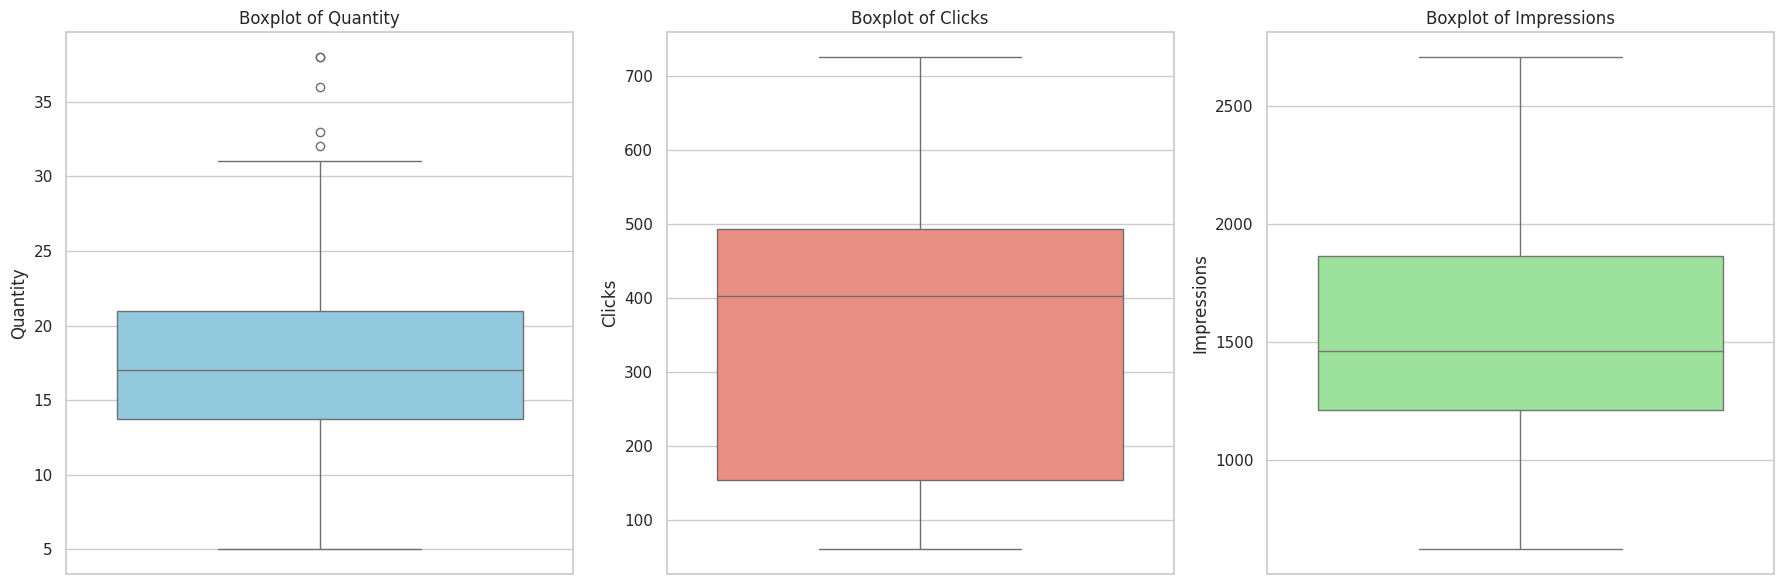

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
df = pd.read_excel(file_path)

# Set style for plots
sns.set(style="whitegrid")

# Create boxplots for 'Quantity', 'Clicks', and 'Impressions' columns
plt.figure(figsize=(18, 6))

# Boxplot for 'Quantity'
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Quantity'], color='skyblue')
plt.title('Boxplot of Quantity')

# Boxplot for 'Clicks'
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Clicks'], color='salmon')
plt.title('Boxplot of Clicks')

# Boxplot for 'Impressions'
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Impressions'], color='lightgreen')
plt.title('Boxplot of Impressions')

plt.tight_layout()
plt.show()


**DETECTING OUTLIERS**

In [ ]:
import pandas as pd

# Loading the dataset
df = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    outliers = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]
    return outliers

print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(df['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(df['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(df['Impressions']))}")


Outliers in each dependent attribute:
Quantity:	 5
Clicks:		 0
Impressions:	 0


In [ ]:
print(f"Quantity:\n{find_outliers_IQR(df['Quantity'])}")

Quantity:
4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64


**5 Outliers in Quantity Attribute**

**REPLACING OUTLIERS**

In [ ]:
percentile_95_value =df["Quantity"].quantile(0.97)
print(percentile_95_value)

30.669999999999987


In [ ]:
def impute_outliers_97th_percentile(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    percentile_95_value =series.quantile(0.97)
    return series.apply(lambda x: percentile_95_value if x < lower_bound or x > upper_bound else x)

# Apply the function to the 'Quantity' column
df['imputed_Quantity'] = impute_outliers_97th_percentile(df['Quantity'])

print(df.head())

# I am saving the modified dataset to a new Excel file named 'cleaned.xlsx'
df.to_excel('/content/drive/MyDrive/Data/cleaned.xlsx', index=False)

print("Modified dataset saved to 'cleaned.xlsx'")

   Day Index  Quantity  Impressions  Clicks  imputed_Quantity
0 2021-12-01        14          620     445             14.00
1 2021-12-02        10          890     433             10.00
2 2021-12-03        13          851     424             13.00
3 2021-12-04        22          881     427             22.00
4 2021-12-05        33          678     451             30.67
Modified dataset saved to 'cleaned.xlsx'


In [ ]:
print("Outliers in each dependent attribute:")

print(f"Quantity:\t {len(find_outliers_IQR(df['imputed_Quantity']))}")

Outliers in each dependent attribute:
Quantity:	 0


**AFTER OUTLIERS' TREATMENT SALES(QUANTITY THROUGH TIME)**

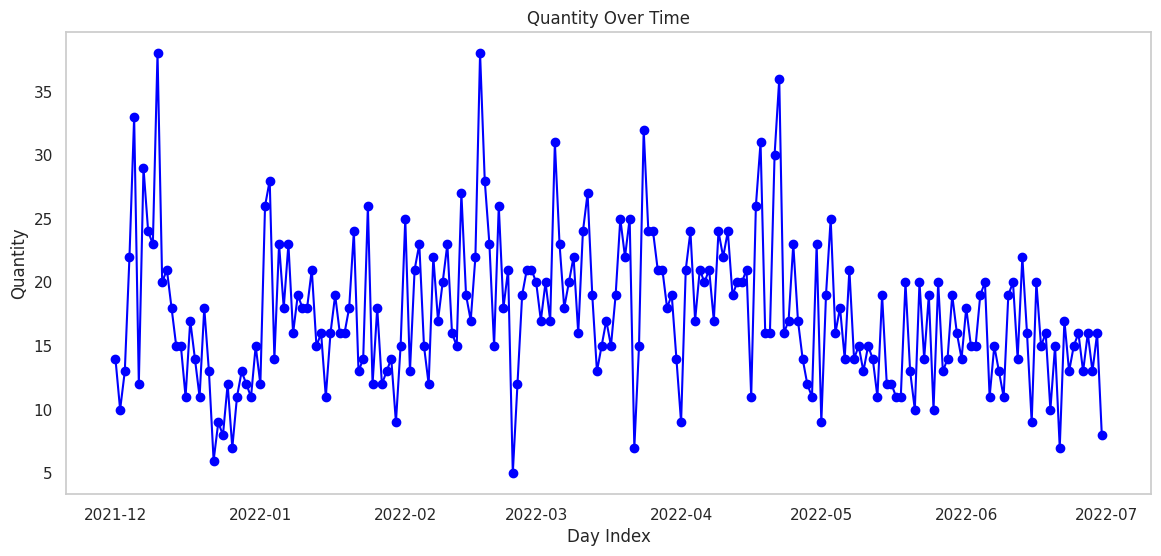

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Data/cleaned.xlsx'
df = pd.read_excel(file_path)

# Plot Quantity over time (Day Index)
plt.figure(figsize=(14, 6))
plt.plot(df['Day Index'], df['Quantity'], color='blue', marker='o', linestyle='-')
plt.title('Quantity Over Time')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid()
plt.show()

 **THE PLOTS FOR CLICKS AND IMPRESSIONS IS SAME AS THERE IS NO OUTLIERS FOUND**

 **Feature Engineering**

In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_excel('/content/drive/MyDrive/Data/cleaned.xlsx')

# Convert 'Day Index' to datetime format for date-based operations
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

#Adding Month Name column
dataset['Month Name'] = dataset['Day Index'].dt.month_name()
month_dummies = pd.get_dummies(dataset['Month Name'], prefix='', prefix_sep='').astype(int)


# 1) Adding 'Weekend' column (1 if the day is Saturday or Sunday, otherwise 0)
dataset['Weekend'] = dataset['Day Index'].dt.weekday.isin([5, 6]).astype(int)

# 2) Adding 'Day of Week' column
dataset['Day of Week'] = dataset['Day Index'].dt.day_name()

# 3-9) Adding columns for each day of the week (1 if that day, otherwise 0)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    dataset[day] = (dataset['Day of Week'] == day).astype(int)

# 10-21) Adding columns for each month (1 if the date is in that month, otherwise 0)
months_of_year = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
for i, month in enumerate(months_of_year, start=1):
    dataset[month] = (dataset['Day Index'].dt.month == i).astype(int)


# Save the modified dataset to a new Excel file named 'enhanced.xlsx'
dataset.to_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx', index=False)

print("Enhanced dataset saved to 'enhanced_file.xlsx'")

Enhanced dataset saved to 'enhanced_file.xlsx'


**ADDING NEW COLUMNS TO THE DATASET**

In [ ]:
import pandas as pd

# Loading the data
data = pd.read_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx')

# Setting display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Displaying all rows of the dataset
data.head(len(data))




Day Index  Quantity  Impressions  Clicks  imputed_Quantity Month Name  \
0   2021-12-01        14          620     445             14.00   December   
1   2021-12-02        10          890     433             10.00   December   
2   2021-12-03        13          851     424             13.00   December   
3   2021-12-04        22          881     427             22.00   December   
4   2021-12-05        33          678     451             30.67   December   
5   2021-12-06        12          995     429             12.00   December   
6   2021-12-07        29          910     444             29.00   December   
7   2021-12-08        24          867     431             24.00   December   
8   2021-12-09        23         1128     456             23.00   December   
9   2021-12-10        38         1129     391             30.67   December   
10  2021-12-11        20         1461     447             20.00   December   
11  2021-12-12        21         1237     347             21.00   December   
12  2021-12-13        18         1403     443             18.00   December   
13  2021-12-14        15         1641     427             15.00   December   
14  2021-12-15        15         1496     423             15.00   December   
15  2021-12-16        11         1775     404             11.00   December   
16  2021-12-17        17         1619     413             17.00   December   
17  2021-12-18        14          969     370             14.00   December   
18  2021-12-19        11          678     429             11.00   December   
19  2021-12-20        18         1330     383             18.00   December   
20  2021-12-21        13         1331     379             13.00   December   
21  2021-12-22         6         1176     350              6.00   December   
22  2021-12-23         9         1257     359              9.00   December   
23  2021-12-24         8         1085     339              8.00   December   
24  2021-12-25        12         1814     338             12.00   December   
25  2021-12-26         7         1759     398              7.00   December   
26  2021-12-27        11         1119     369             11.00   December   
27  2021-12-28        13          893     381             13.00   December   
28  2021-12-29        12         1028     361             12.00   December   
29  2021-12-30        11          956     356             11.00   December   
30  2021-12-31        15          911     237             15.00   December   
31  2022-01-01        12         1350     332             12.00    January   
32  2022-01-02        26         1704     389             26.00    January   
33  2022-01-03        28         2177     411             28.00    January   
34  2022-01-04        14         2549     401             14.00    January   
35  2022-01-05        23         1915     361             23.00    January   
36  2022-01-06        18         2125     385             18.00    January   
37  2022-01-07        23         1984     397             23.00    January   
38  2022-01-08        16         1859     398             16.00    January   
39  2022-01-09        19         1759     401             19.00    January   
40  2022-01-10        18         1571     392             18.00    January   
41  2022-01-11        18         1818     398             18.00    January   
42  2022-01-12        21         1506     376             21.00    January   
43  2022-01-13        15         1724     369             15.00    January   
44  2022-01-14        16         2196     387             16.00    January   
45  2022-01-15        11         1933     399             11.00    January   
46  2022-01-16        16         1959     413             16.00    January   
47  2022-01-17        19         1689     425             19.00    January   
48  2022-01-18        16         1524     368             16.00    January   
49  2022-01-19        16         1041     390             16.00    January   
50  2022-01-20        18   

**Exploratory Data Analysis (EDA)**

 ***Descriptive Statistics:***

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
df = pd.read_excel(file_path)

# Get descriptive statistics
descriptive_stats = df.describe()

# Save descriptive statistics to an Excel file
output_file = '/content/drive/MyDrive/Data/distributions.xlsx'
descriptive_stats.to_excel(output_file, sheet_name='Descriptive Statistics')

# Display all rows and columns for the descriptive statistics
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the descriptive statistics in a styled format
styled_stats = descriptive_stats.style.set_properties(**{'border': '1px solid black', 'color': 'black'}) \
                    .set_table_styles([{
                        'selector': 'th',
                        'props': [('background-color', 'lightgrey'),
                                  ('border', '1px solid black')]
                    }, {
                        'selector': 'td',
                        'props': [('border', '1px solid black')]
                    }])

# Display styled output
styled_stats



**DATA ANALYSIS**

**Pie Chart for Day of the Week Distributions for Quantity,Clicks & Impression**

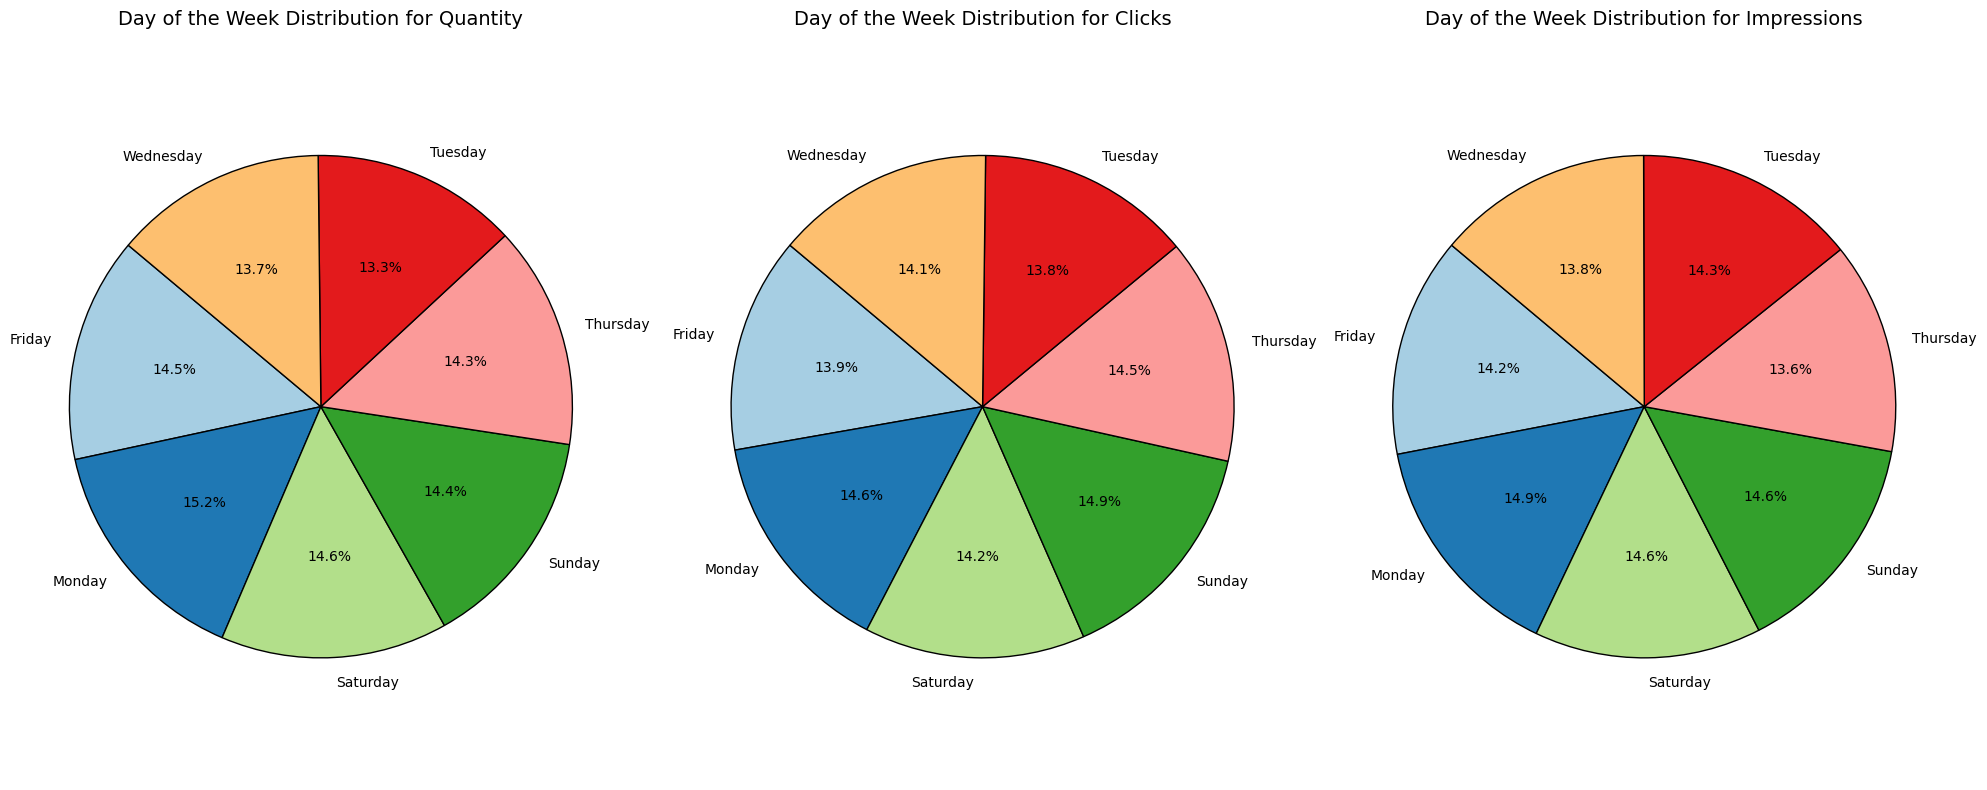

In [ ]:
# Add a column for the day of the week
df['Day of Week'] = df['Day Index'].dt.strftime('%A')

# Function to plot pie chart for Day of the Week distribution
def plot_daywise_pie(df, x_col, y_col, title, ax):
    # Group by the specified column and calculate the sum
    df_grouped = df.groupby(x_col)[y_col].sum().reset_index()

    sizes = df_grouped[y_col]
    labels = df_grouped[x_col]

    # Plot pie chart with improved aesthetics
    ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'}
    )
    ax.set_title(title, fontsize=14)
    ax.axis('equal')  # Ensure the pie chart is a perfect circle

# Create subplots for Quantity, Clicks, and Impressions
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Plot each metric in a separate subplot
plot_daywise_pie(df, 'Day of Week', 'Quantity', 'Day of the Week Distribution for Quantity', axes[0])
plot_daywise_pie(df, 'Day of Week', 'Clicks', 'Day of the Week Distribution for Clicks', axes[1])
plot_daywise_pie(df, 'Day of Week', 'Impressions', 'Day of the Week Distribution for Impressions', axes[2])

# Adjust layout for better readability
plt.tight_layout()
plt.show()


### 1. **Quantity Distribution**:
- I was noticing that certain days were showing higher quantities compared to others, indicating a possible trend or peak in activity.
- For example, I might have been observing that **Monday** and **Thursday** were having larger slices, suggesting that sales or stock movements were being concentrated on these days.

**Insight**: I was identifying key days for replenishment or focusing on supply chain activities.


### 2. **Clicks Distribution**:
- I was observing that days with higher **Clicks** were indicating peak user engagement. These days might have been aligning with marketing campaigns or user habits.
- If **Friday** and **Saturday** were showing higher proportions, it was possibly indicating that more users were browsing before the weekend.

**Insight**: I was realizing that ad campaigns or promotions could have been optimized for days with higher engagement.


### 3. **Impressions Distribution**:
- I was noticing that certain days with higher impressions were indicating when the product or advertisement was most visible to the audience.
- For instance, if **Wednesday** was showing a high percentage, it might have been suggesting that more active online audiences were being reached during mid-week.

**Insight**: I was understanding that ad scheduling could have been refined to maximize reach during high-visibility days.



### General Recommendations:
1. **Optimization**:
   - I was aligning marketing efforts and resource allocation with days showing peak activity.
   - I might have been focusing on underperforming days to balance overall engagement.

2. **Scheduling**:
   - I was ensuring that if one metric (e.g., impressions) was peaking earlier in the week, promotions or conversion-focused campaigns were following immediately.

3. **User Behavior**:
   - I was noticing that if clicks and impressions were correlating with specific days, they might have been aligning with customer habits, such as payday shopping or weekend browsing.


**Scatter Plots Analysis**

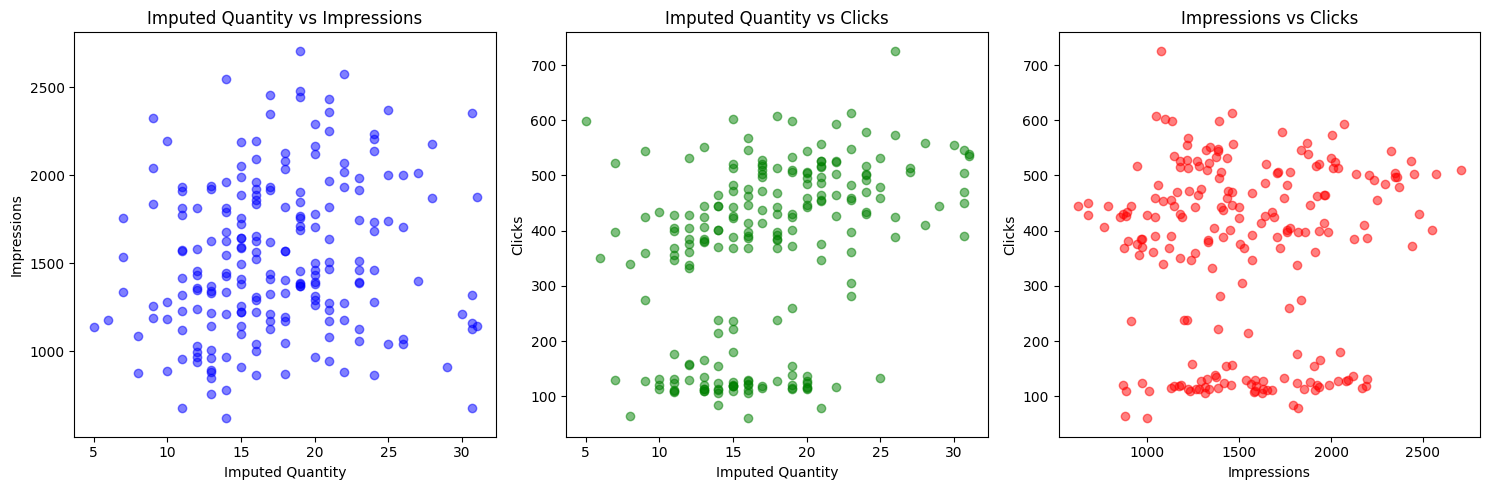

In [ ]:
# Scatter plot for pairwise analysis among "imputed quantity", "clicks", and "impressions"

# Set the plot size
plt.figure(figsize=(15, 5))

# Scatter plot 1: Imputed Quantity vs Impressions
plt.subplot(1, 3, 1)
plt.scatter(data['imputed_Quantity'], data['Impressions'], color='b', alpha=0.5)
plt.xlabel('Imputed Quantity')
plt.ylabel('Impressions')
plt.title('Imputed Quantity vs Impressions')

# Scatter plot 2: Imputed Quantity vs Clicks
plt.subplot(1, 3, 2)
plt.scatter(data['imputed_Quantity'], data['Clicks'], color='g', alpha=0.5)
plt.xlabel('Imputed Quantity')
plt.ylabel('Clicks')
plt.title('Imputed Quantity vs Clicks')

# Scatter plot 3: Impressions vs Clicks
plt.subplot(1, 3, 3)
plt.scatter(data['Impressions'], data['Clicks'], color='r', alpha=0.5)
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.title('Impressions vs Clicks')

# Display the scatter plots
plt.tight_layout()
plt.show()



1. **Imputed Quantity vs. Impressions**
   - **Insights**: This scatter plot can reveal if there's a relationship between the quantity imputed and the number of impressions. For example, a positive correlation (upward trend) would suggest that as the imputed quantity increases, impressions also increase, indicating a possible dependency.

2. **Imputed Quantity vs. Clicks**
   - **Insights**: This plot helps in understanding if a higher imputed quantity impacts user engagement (clicks). A trend here would suggest that changes in quantity influence user actions or interest.

3. **Impressions vs. Clicks**
   - **Insights**: This scatter plot is particularly valuable, as it shows if impressions (how often an item was viewed) correlate with clicks (actual interactions). A strong positive correlation would indicate that more impressions generally lead to more clicks, while a lack of correlation might suggest other factors affect clicks independently of impressions.

**Overall Interpretation:**
By observing these scatter plots, you can identify trends, clusters, or outliers. Strong correlations or patterns suggest potential dependencies, while scattered or random points indicate independence. These insights can help in targeting areas for optimization, such as increasing clicks through better impressions or adjusting imputed quantities based on observed demand.

 **Pair Plot of Imputed Quantity, Clicks, and Impressions**

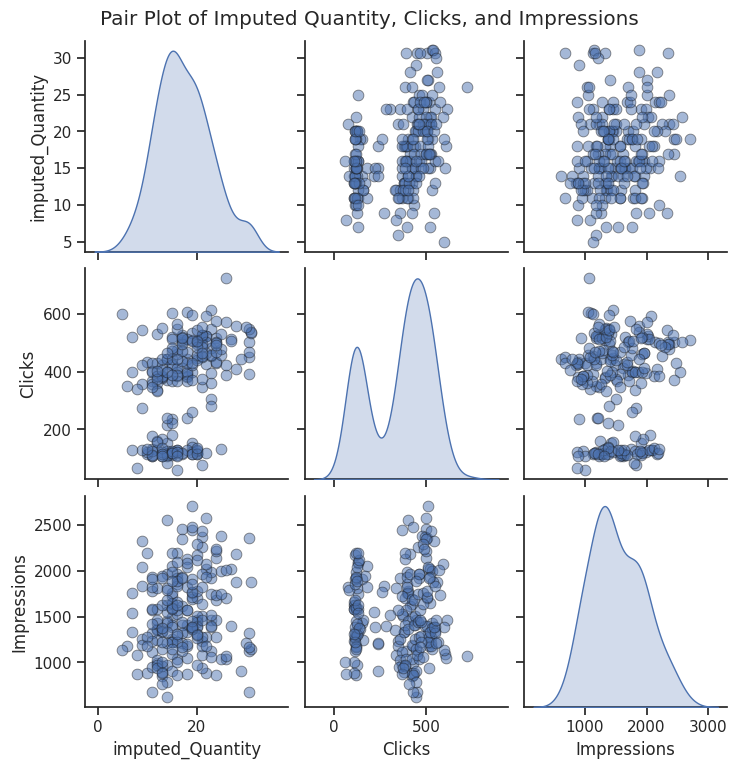

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Excel file
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
sheet_names

# Load the data from the first sheet to inspect the content
data = excel_data.parse('Sheet1')

# Selecting only the relevant columns for the pair plot
data_subset = data[['imputed_Quantity', 'Clicks', 'Impressions']]

# Set the plot style
sns.set(style="ticks")

# Create the pair plot
sns.pairplot(data_subset, diag_kind="kde", plot_kws={'alpha':0.5, 's':60, 'edgecolor':'k'})

# Show the plot
plt.suptitle('Pair Plot of Imputed Quantity, Clicks, and Impressions', y=1.02)
plt.show()




**Insights**
- **Scatter Patterns**: Each scatter plot reveals relationships between pairs of variables:
  - If points form a linear pattern, it indicates a potential correlation.
  - A dense cluster of points can signify common value ranges.
- **KDE Plots**: The diagonal shows the distribution for each variable, helping identify whether data is skewed, normal, or has multiple peaks.

This pair plot will provide a comprehensive view of possible correlations, helping you assess whether higher values in one variable relate to increases or decreases in another.

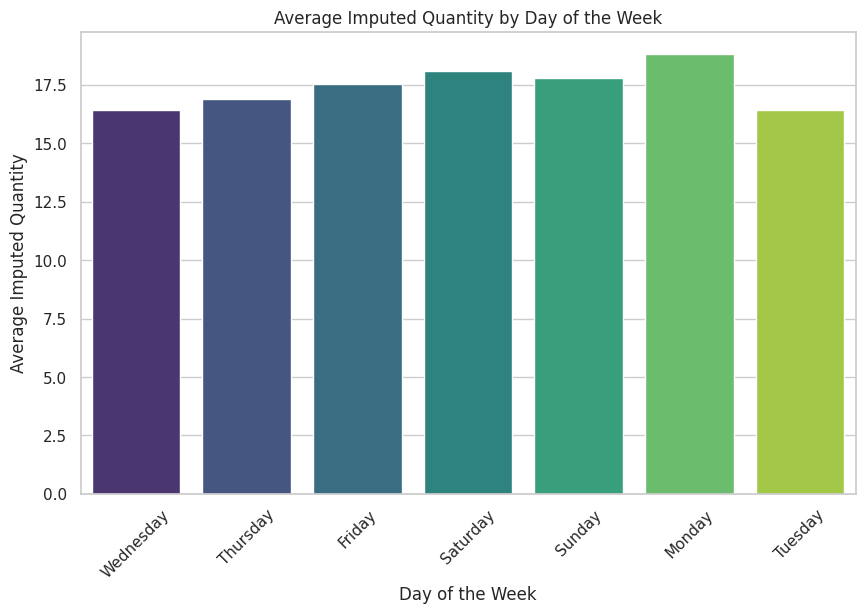

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
data = pd.read_excel(file_path)

import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set up the plot style
sns.set(style="whitegrid")

# Plot the average imputed quantity per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Day of Week', y='imputed_Quantity', estimator='mean', ci=None, palette='viridis')
plt.title('Average Imputed Quantity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Imputed Quantity')
plt.xticks(rotation=45)
plt.show()



Here are a few specific insights I was gaining:

- **High or Low Days**: Certain days were consistently showing higher or lower averages, indicating a possible weekly pattern or trend, such as higher imputed quantities on specific business days.
- **Operational Efficiency**: Recognizing these patterns was helping me better understand resource allocation or inventory planning needs. For instance, if the imputed quantity peaked on Wednesdays and Thursdays, it suggested that these might be busier days requiring more resources.
- **Potential Anomalies**: If any particular day deviated significantly from others, it was hinting at anomalies, seasonality, or special circumstances affecting data on those specific days.


**Weekdays vs Weekends**

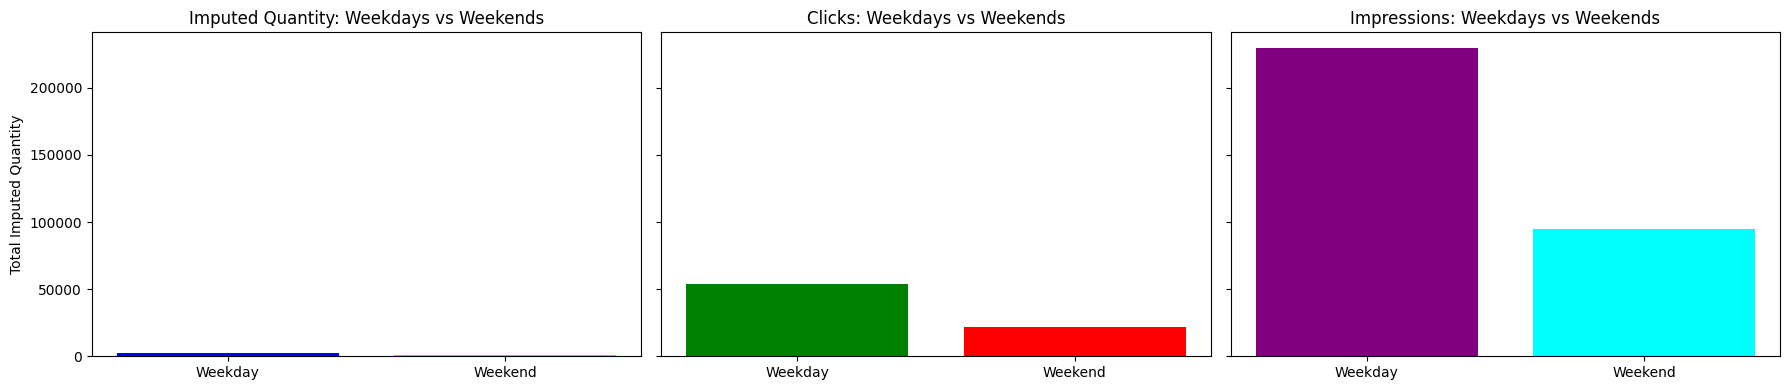

  Day Type  imputed_Quantity  Clicks  Impressions
0  Weekday           2618.68   53822       229914
1  Weekend           1076.67   22117        94807


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Specify the path to the dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'

# Step 2: Load the Excel file
data = pd.ExcelFile(file_path)

# Step 3: Load the sheet and preview the data
df = data.parse('Sheet1')

# Add a column to distinguish weekdays and weekends
df['Day Type'] = df['Weekend'].apply(lambda x: 'Weekend' if x == 1 else 'Weekday')

# Aggregate data for weekdays and weekends
aggregates = df.groupby('Day Type').agg({
    'imputed_Quantity': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum'
}).reset_index()



# Plot the aggregated data
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

# Bar plot for imputed_Quantity
axes[0].bar(aggregates['Day Type'], aggregates['imputed_Quantity'], color=['blue', 'orange'])
axes[0].set_title('Imputed Quantity: Weekdays vs Weekends')
axes[0].set_ylabel('Total Imputed Quantity')

# Bar plot for Clicks
axes[1].bar(aggregates['Day Type'], aggregates['Clicks'], color=['green', 'red'])
axes[1].set_title('Clicks: Weekdays vs Weekends')

# Bar plot for Impressions
axes[2].bar(aggregates['Day Type'], aggregates['Impressions'], color=['purple', 'cyan'])
axes[2].set_title('Impressions: Weekdays vs Weekends')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Display the aggregated data
print(aggregates)


**Percentage Distribution of Daily Clicks and Impressions by Day of the Week**

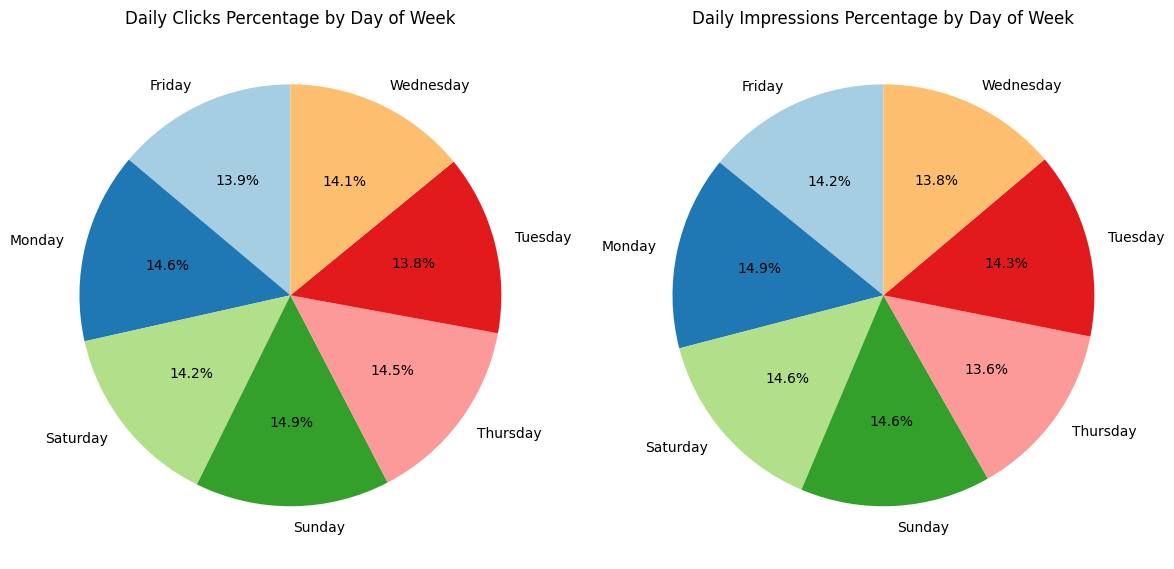

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Day Index' to datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Extract 'Day of Week' for grouping
data['Day of Week'] = data['Day Index'].dt.day_name()

# Group by 'Day of Week' and sum Clicks and Impressions
daily_data = data.groupby('Day of Week')[['Clicks', 'Impressions']].sum()

# Calculate percentage for Clicks and Impressions
daily_data_percent = daily_data / daily_data.sum() * 100

# Plotting the pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Clicks percentage by Day of Week
axs[0].pie(daily_data_percent['Clicks'], labels=daily_data_percent.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[0].set_title('Daily Clicks Percentage by Day of Week')

# Impressions percentage by Day of Week
axs[1].pie(daily_data_percent['Impressions'], labels=daily_data_percent.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[1].set_title('Daily Impressions Percentage by Day of Week')

# Show the plots
plt.tight_layout()
plt.show()

I explored daily marketing trends by day of week. I loaded data, converted dates, and extracted the day of the week. I then grouped data by day and calculated the sum of Clicks and Impressions. To compare days, I converted these values to percentages. Finally, I created two pie charts, one for Clicks and one for Impressions, showing the percentage distribution across each day of the week.

 **Correlation Heatmap**

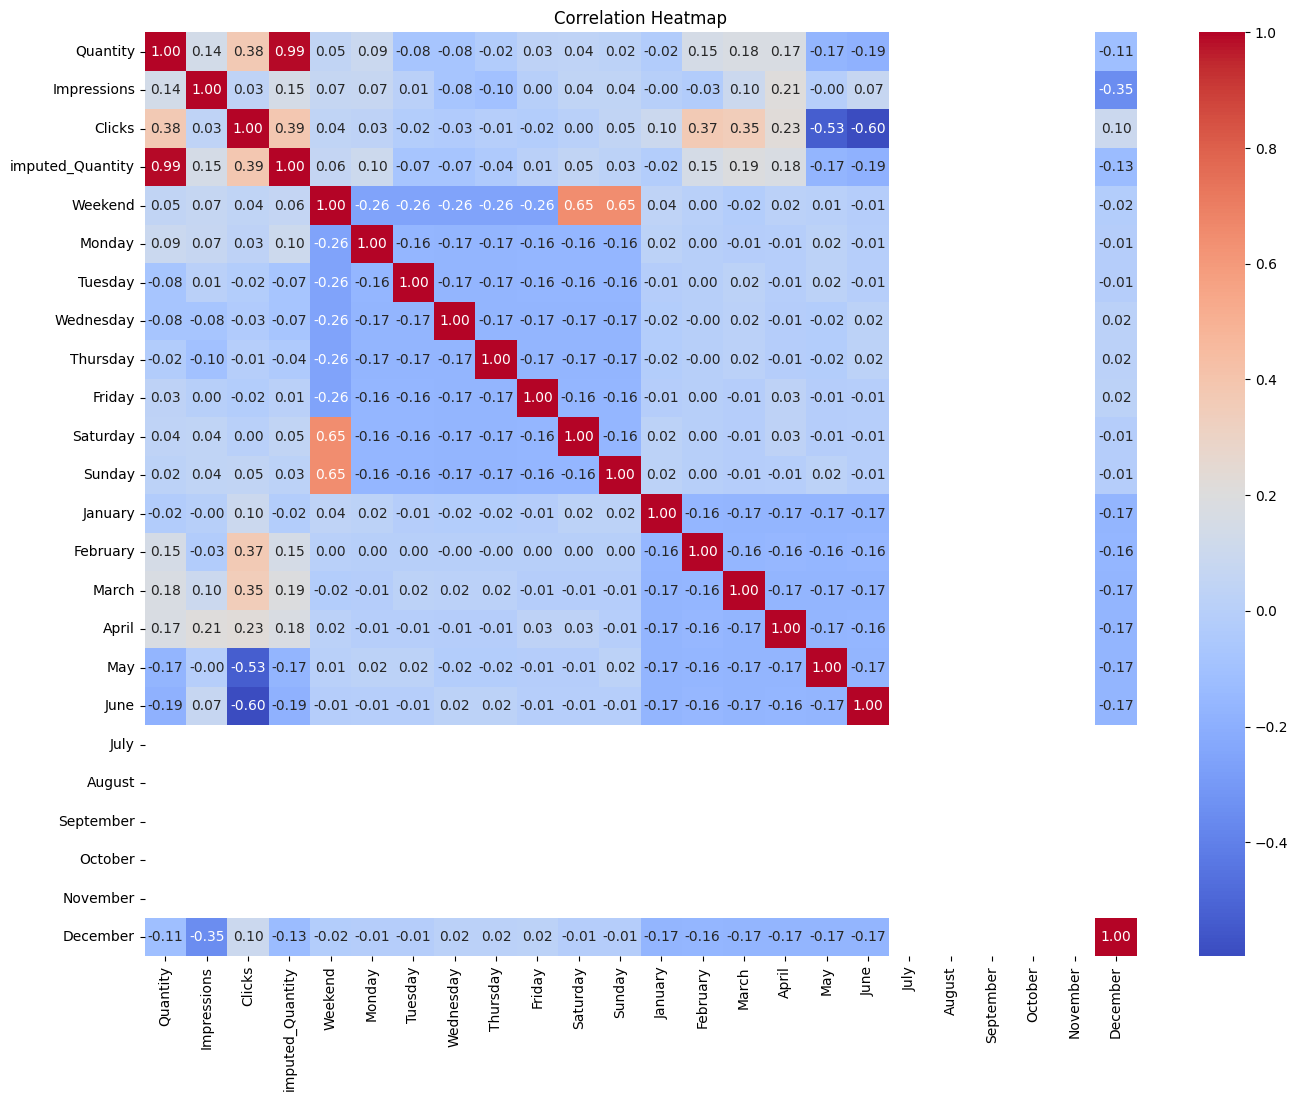

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dataset = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
# Load the dataset into a Pandas DataFrame
df = pd.read_excel(dataset)

# Select only numerical columns for correlation calculation
numerical_data = df.select_dtypes(include=['int64', 'float64']) # Use the DataFrame 'df'

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



**Through the above correlation heatmap we can say that**

*   Clicks have good correlation with Quantity

*   Impressions also have slight relation with Quantity

*   Impressions have tiny relation with Clicks






I was using a correlation heatmap to understand relationships between variables in my dataset. It provided a visual summary of how each pair of variables correlated. Here's what I gained:

1. **Strength and Direction of Relationships**: I saw how each pair of variables was correlated, with values close to 1 indicating a strong positive relationship, -1 showing a negative one, and 0 showing weak or no correlation. For example, I found that higher "imputed quantity" correlated with higher "impressions."

2. **Key Influencers**: I identified closely related variables. For example, I noticed that more "impressions" generally led to more "clicks," suggesting that optimizing impressions could boost clicks.

3. **Redundancies**: I spotted redundant variables, like "imputed quantity" and "quantity," which had high correlation, helping me simplify my dataset by focusing on one.

4. **Outliers and Patterns**: I detected unexpected relationships, like weak correlations between "clicks" and "impressions," prompting me to explore potential outliers or missing data.

The heatmap helped me quickly visualize these insights, guiding further analysis and decision-making.

 **Statistical Summary**

I was analyzing the **Quantity** column, which represented the daily quantity of items sold, allowing me to identify trends in demand. I was noticing that higher values were indicating periods of increased sales, which could have been due to seasonal trends, promotions, or weekends. The daily variations in quantity were showing potential fluctuations in demand, which seemed to be correlating with specific days of the week or months.

When I was examining **Impressions and Clicks**, these columns were giving me insights into online engagement and user interest, especially from a digital marketing or e-commerce perspective. The impressions were indicating how many times the items were displayed, while the clicks showed how often they were interacted with.

I was also looking into **imputed_Quantity**, which appeared to provide estimated values for quantities where original data might have been missing. By comparing this with the actual Quantity column, I was able to evaluate the accuracy of these imputed values and determine how closely they aligned with actual sales trends.

The **Temporal Variables** such as "Day of Week" and "Weekend" were allowing me to examine if there were consistent patterns across specific days or weekends. I was noticing, for example, that weekends could show varying sales due to shopping behaviors. The "Month Name" column, along with one-hot encoded variables for each month, was giving me insights into monthly or seasonal variations in demand.

Lastly, I was observing **Seasonal and Day-Based Patterns** through the one-hot encoded month columns, which helped me track seasonal trends directly. Higher quantities during specific months, such as December, were suggesting a strong seasonal influence, likely from holiday sales. Similarly, by observing trends based on days like "Monday" or "Friday," I was noticing patterns that might indicate day-specific demand spikes, such as on weekends.


# **Milestone 2: Week 3 | Module 3: Time Series Modelling**
## Sub Module 3.1: Model Selection
* Inspecting the time series data for patterns using visualizations like line plots.
* Within time series modelling, we'll be exploring univariate models.

## Sub Module 3.2: Model Fitting
* To identify the optimal model parameters. This involves trying different parameter combinations and selecting the one with the lowest error metric.


# **Milestone 2: Week 4 | Module 4 : Model Evaluation**

##Sub Module 4.1 (Model Evaluation)

*  I am visualizing the model fit by plotting predicted values against actual sales data.

##Sub Module 4.2 (Model Diagnostics)

*  I am evaluating the model's performance using metrics like MAE, RMSE, and MAPE.

*  I am checking residual plots to ensure no systematic errors remain.

# **Understanding the Data: Before Time Series Modelling**

Inspecting the time series data for patterns using visualizations like line plots.

**MONTHLY TRENDS OF IMPUTED DATA ANALYSIS**

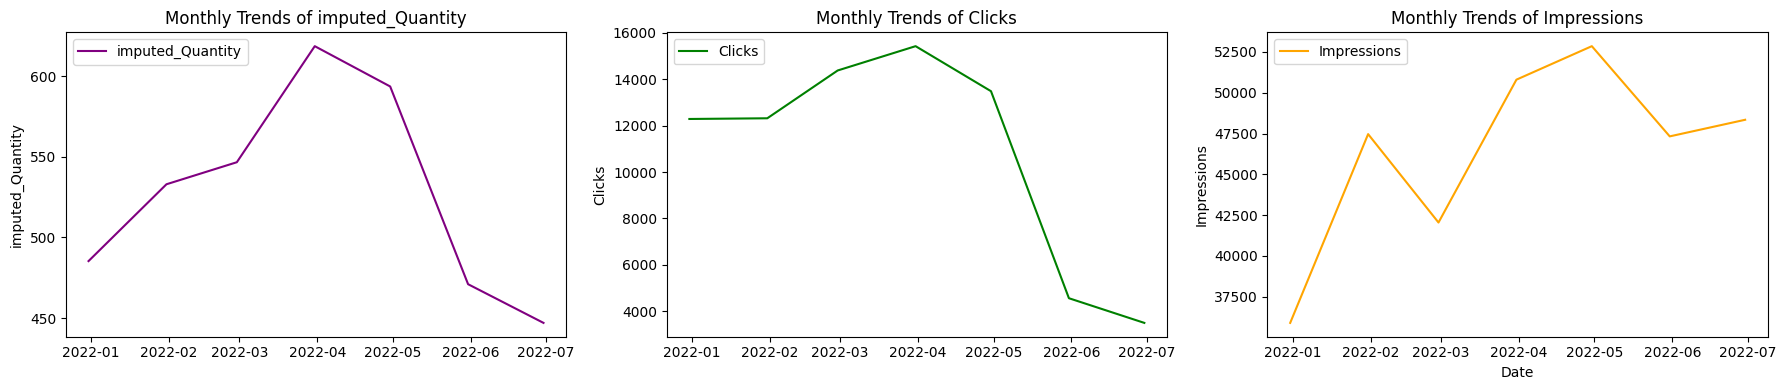

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.ticker import MultipleLocator

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Day Index' to datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Set 'Day Index' as the index for easier resampling by month
data.set_index('Day Index', inplace=True)

# Resample to monthly data, summing up the values for the relevant columns
monthly_data = data.resample('M').sum()[['imputed_Quantity', 'Clicks', 'Impressions']]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18,4), sharex=True)

# Set y-axis tick intervals to 50 for the specified axis
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(50))

axs[0].plot(monthly_data.index, monthly_data['imputed_Quantity'], label='imputed_Quantity', color='purple')
axs[0].set_ylabel('imputed_Quantity')
axs[0].set_title('Monthly Trends of imputed_Quantity')
axs[0].legend(loc='upper left')

# Plot Clicks
axs[1].plot(monthly_data.index, monthly_data['Clicks'], label='Clicks', color='green')
axs[1].set_ylabel('Clicks')
axs[1].set_title('Monthly Trends of Clicks')
axs[1].legend(loc='upper left')

# Plot Impressions
axs[2].plot(monthly_data.index, monthly_data['Impressions'], label='Impressions', color='orange')
axs[2].set_ylabel('Impressions')
axs[2].set_xlabel('Date')
axs[2].set_title('Monthly Trends of Impressions')
axs[2].legend(loc='upper left')

# Improve layout and show plot
plt.tight_layout()
plt.show()



I was analyzing the trends of imputed_Quantity, Clicks, and Impressions, observing seasonal patterns, spikes, and drops. I was noting correlations, identifying anomalies, and understanding how impressions and clicks were influencing the imputed_Quantity over time.

**WEEKLY DEMANDS AND TRENDS**

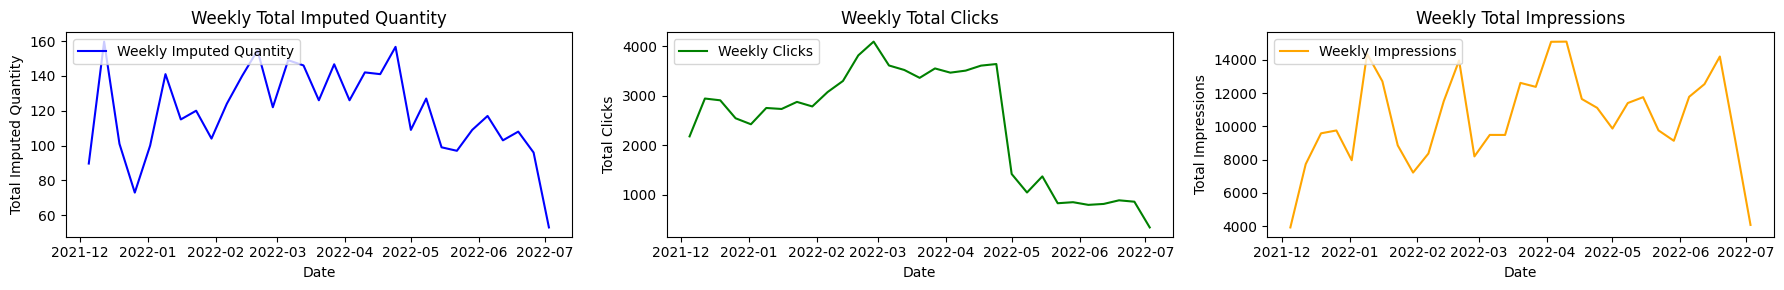

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Day Index' to datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Set 'Day Index' as the index for easier resampling by week
data.set_index('Day Index', inplace=True)

# Resample to weekly data, summing up the values for imputed_Quantity, Clicks, and Impressions
weekly_data = data.resample('W').sum()[['imputed_Quantity', 'Clicks', 'Impressions']]

# Plotting the weekly data with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 3), sharex=True)

# Imputed Quantity plot
axs[0].plot(weekly_data.index, weekly_data['imputed_Quantity'], label='Weekly Imputed Quantity', color='blue')
axs[0].set_ylabel('Total Imputed Quantity')
axs[0].legend(loc='upper left')
axs[0].set_title('Weekly Total Imputed Quantity')

# Clicks plot
axs[1].plot(weekly_data.index, weekly_data['Clicks'], label='Weekly Clicks', color='green')
axs[1].set_ylabel('Total Clicks')
axs[1].legend(loc='upper left')
axs[1].set_title('Weekly Total Clicks')

# Impressions plot
axs[2].plot(weekly_data.index, weekly_data['Impressions'], label='Weekly Impressions', color='orange')
axs[2].set_ylabel('Total Impressions')
axs[2].legend(loc='upper left')
axs[2].set_title('Weekly Total Impressions')

# Label the x-axis
axs[0].set_xlabel('Date')
axs[1].set_xlabel('Date')
axs[2].set_xlabel('Date')

# Improve layout and show plot
plt.tight_layout()
plt.show()



I analyzed weekly marketing data. I loaded it, converted dates to datetime, and resampled by week, summing 'Imputed Quantity', 'Clicks', and 'Impressions'.  Finally, I plotted each metric (Quantity, Clicks, Impressions) on a separate subplot within a larger figure, sharing the x-axis for easy comparison.

**DAYWISE ANALYSIS THROUGH TIME**

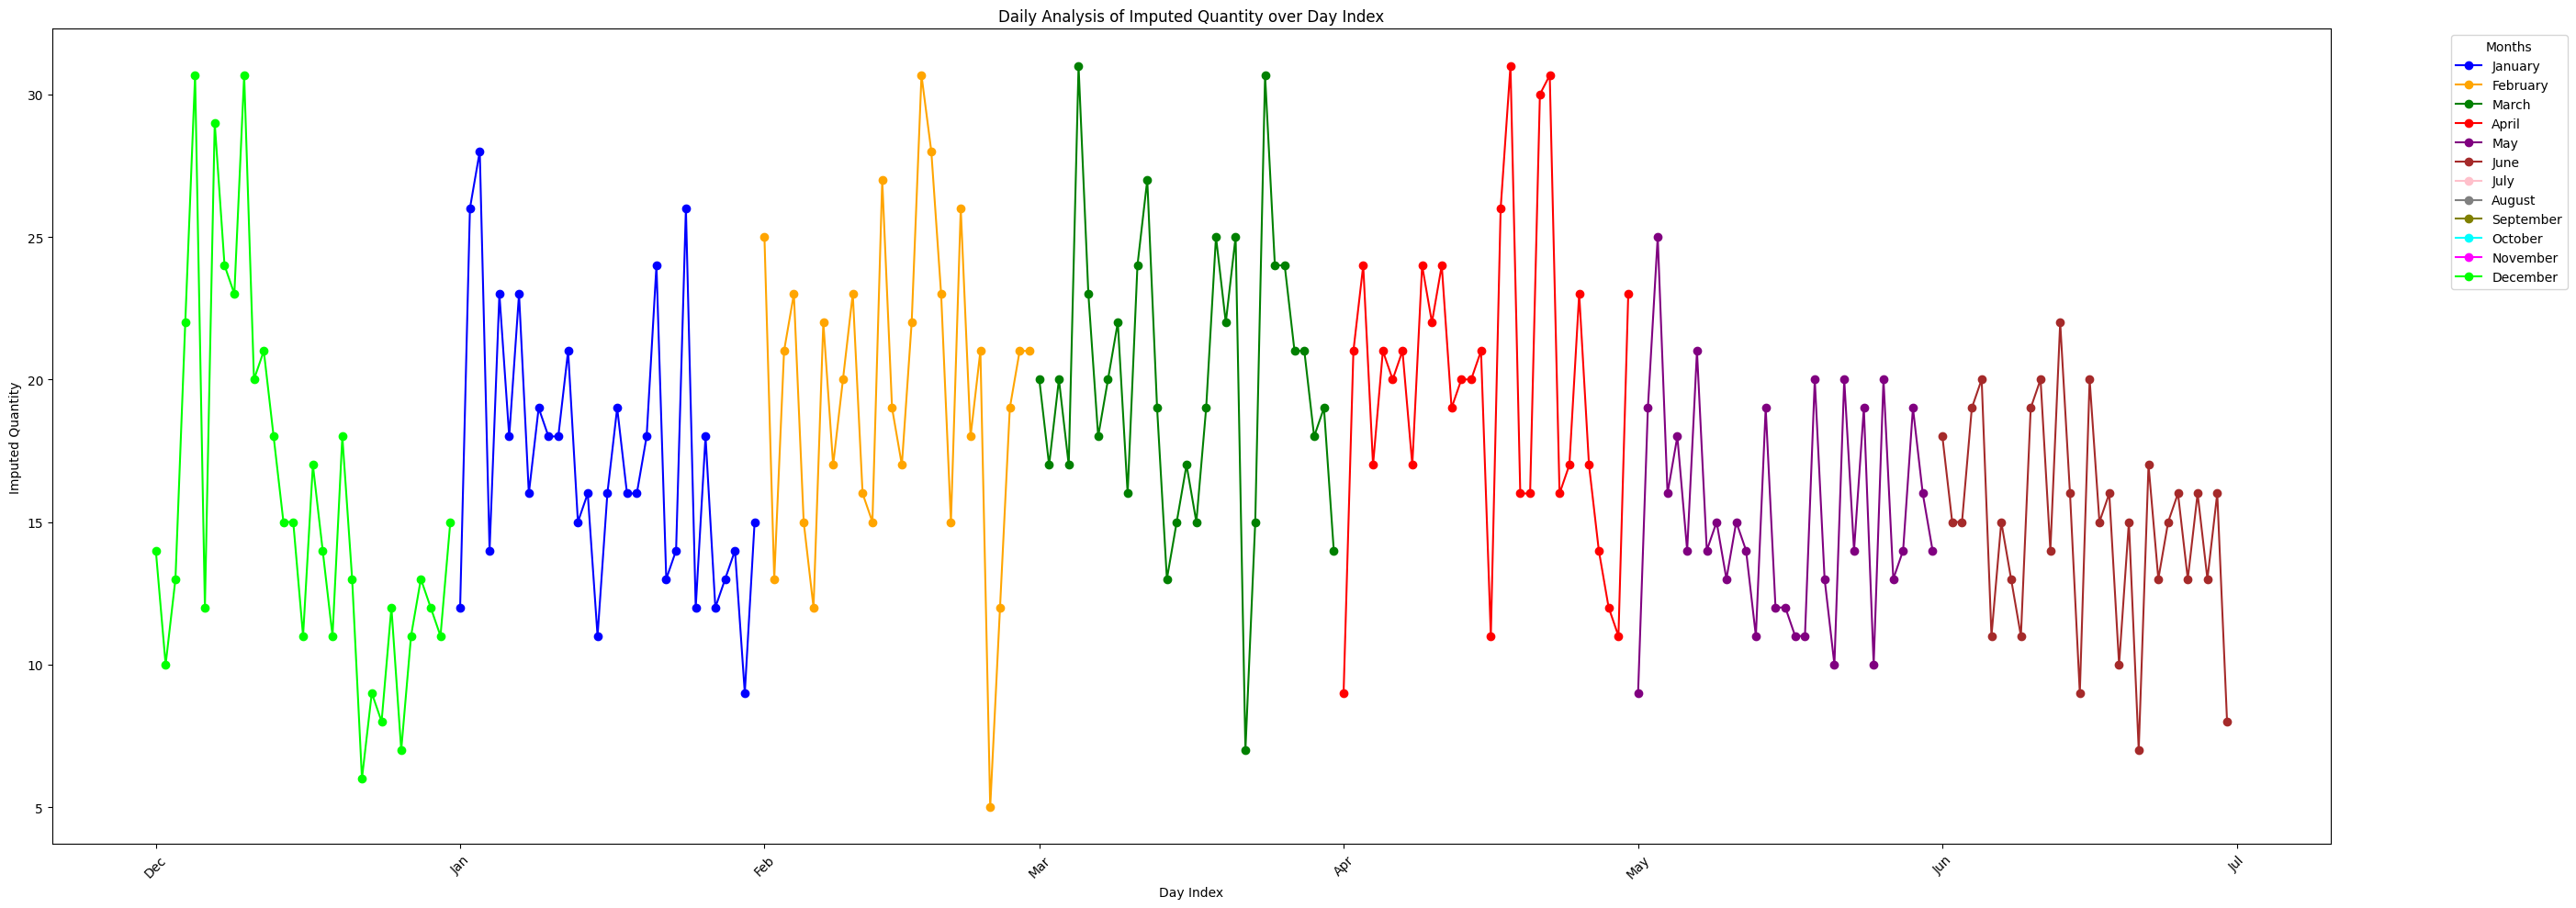

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Load the dataset
dataset = pd.read_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx')

# Ensure 'Day Index' is in datetime format
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

# Set up the colors for each month
colors = [
    "blue", "orange", "green", "red", "purple", "brown",
    "pink", "gray", "olive", "cyan", "magenta", "lime"
]
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plotting with markers for each month
plt.figure(figsize=(28, 10))
for month, color in zip(months, colors):
    month_data = dataset[dataset['Month Name'] == month]
    plt.plot(
        month_data['Day Index'], month_data['imputed_Quantity'],  # Updated column
        marker='o', linestyle='-',
        label=month, color=color
    )

# Display the plot with updated settings
plt.title("Daily Analysis of Imputed Quantity over Day Index")
plt.xlabel("Day Index")
plt.ylabel("Imputed Quantity")

# Configure date formatting for x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)
plt.legend(title="Months", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


I was visualizing daily 'Imputed Quantity' trends. I loaded data from an Excel file, ensured correct date formatting, and added a 'Month' column for grouping. I plotted each month's data with a unique color and marker, customizing the plot with labels, title, and legend.


**DAILY TRENDS FOR CLICKS THROUGH TIME**

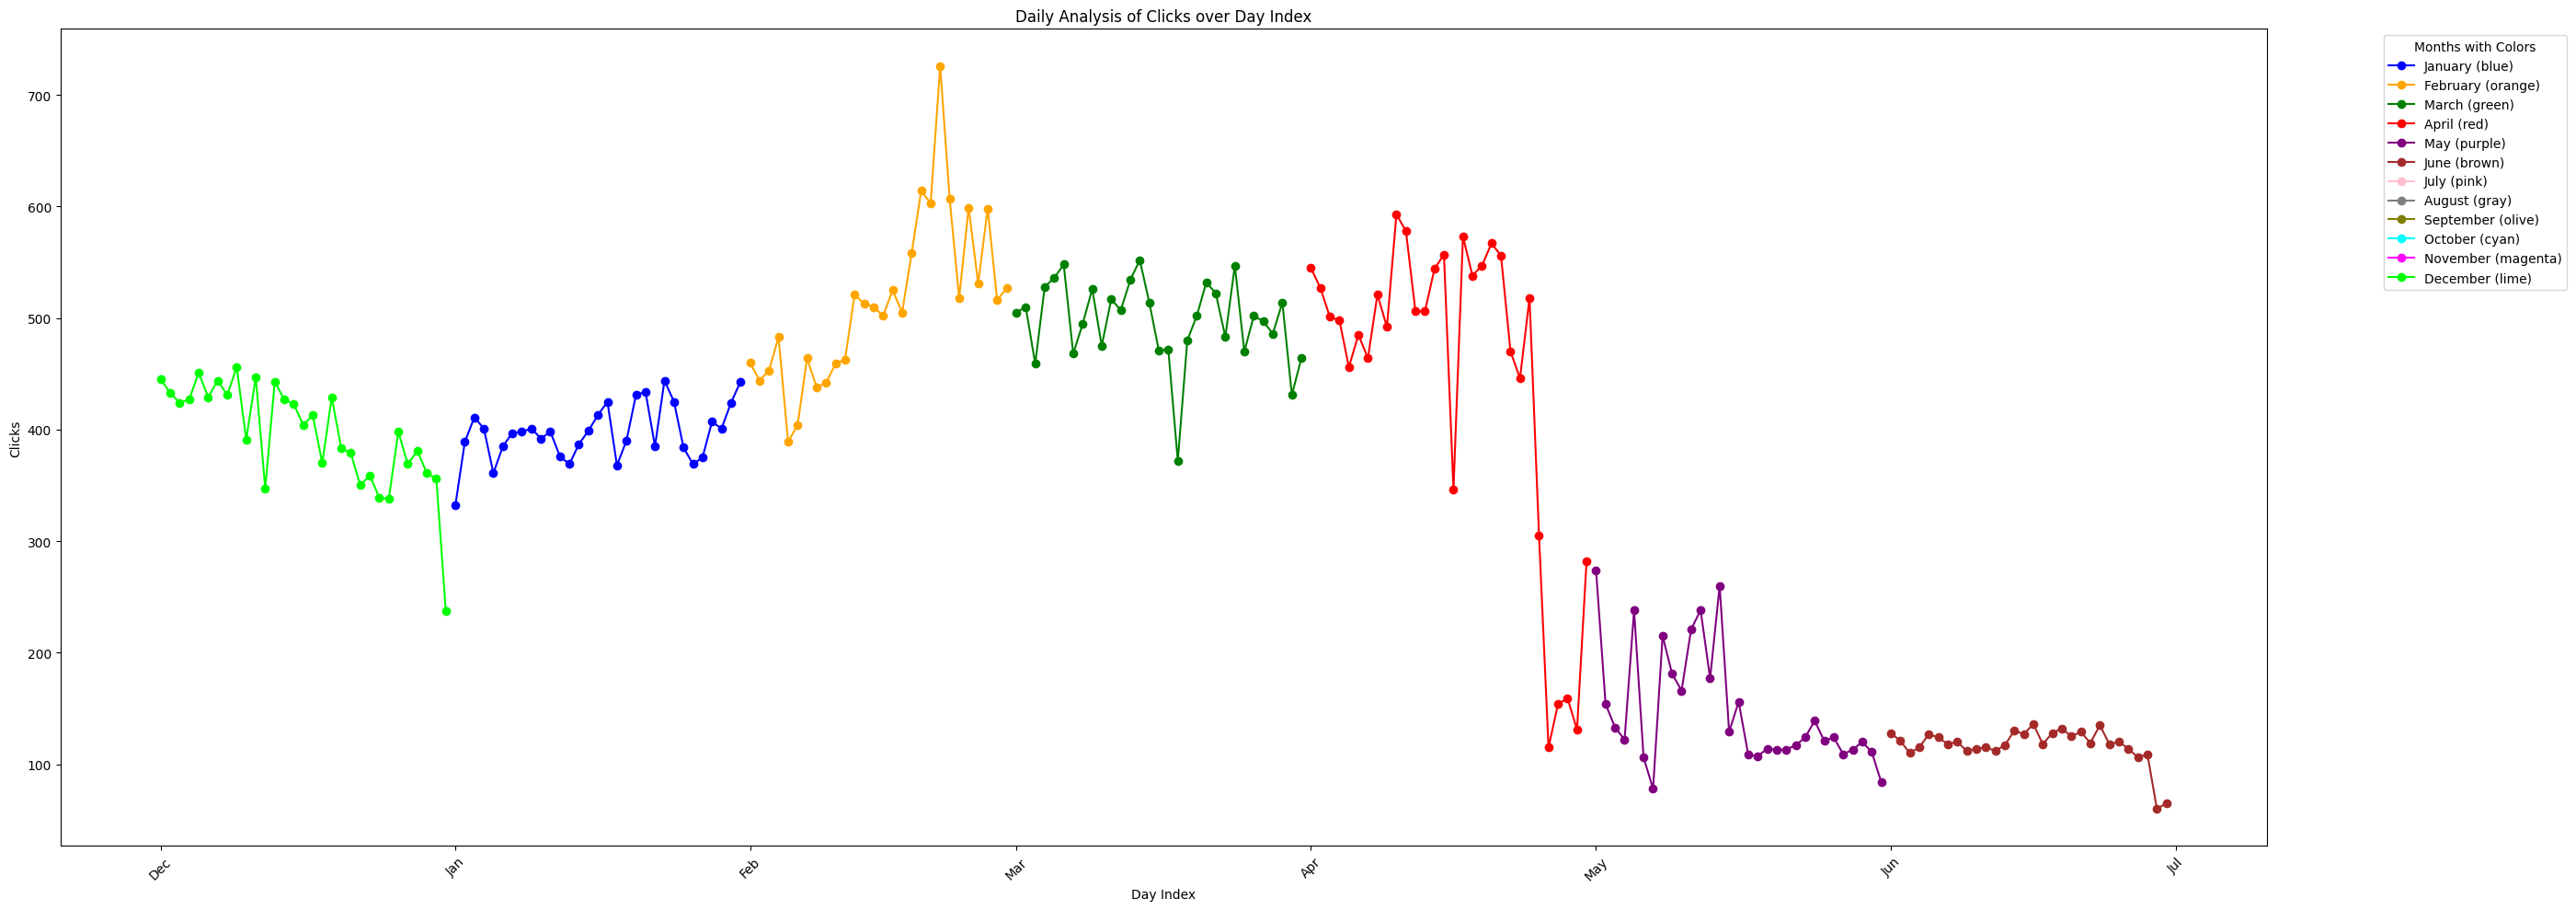

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx')

# Ensure 'Day Index' is in datetime format if it isn't already
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

# Adding a Month column for easy grouping
dataset['Month'] = dataset['Day Index'].dt.month

# Set up the colors for each month
colors = [
    "blue", "orange", "green", "red", "purple", "brown",
    "pink", "gray", "olive", "cyan", "magenta", "lime"
]
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plotting with markers for each month
plt.figure(figsize=(28, 10))
for month, color in zip(range(1, 13), colors):
    month_data = dataset[dataset['Month'] == month]
    plt.plot(month_data['Day Index'], month_data['Clicks'], marker='o', linestyle='-',
         label=f"{months[month-1]} ({color})", color=color)


# Display the plot with updated settings
plt.title("Daily Analysis of Clicks over Day Index")
plt.xlabel("Day Index")
plt.ylabel("Clicks")

# Configure date formatting for x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)
plt.legend(title="Months with Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

I analyzed daily click trends across months. I loaded data, converted dates, and added a 'Month' column for grouping.  Using different colors for each month, I plotted click data for each month with markers on a single graph.  I formatted the x-axis to display month abbreviations with rotated labels for improved readability. The title, labels, and legend provided context for the visualization.

**DAYWISE TRENDS FOR IMPRESSIONS THROUGH TIME**

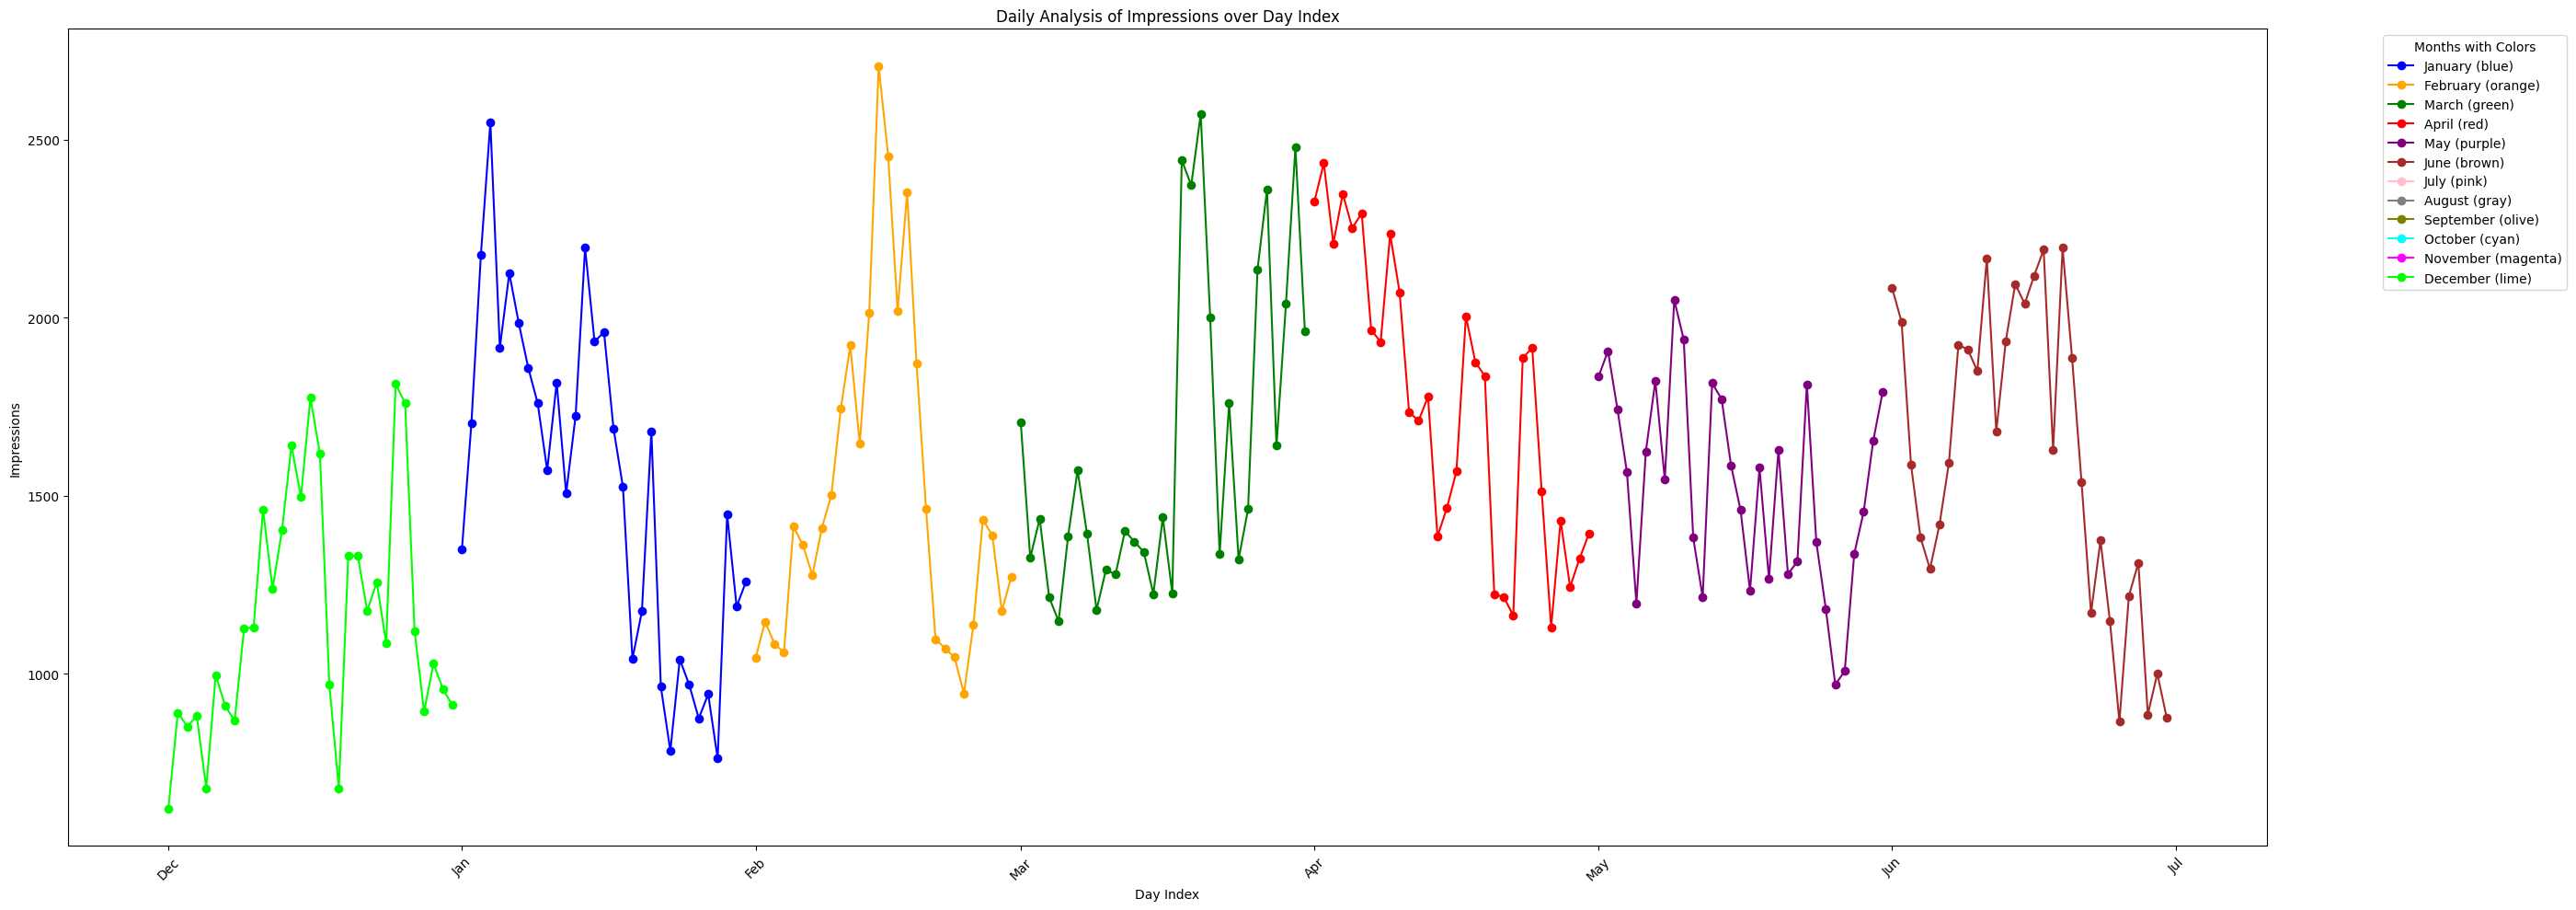

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx')

# Ensure 'Day Index' is in datetime format if it isn't already
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

# Adding a Month column for easy grouping
dataset['Month'] = dataset['Day Index'].dt.month

# Set up the colors for each month
colors = [
    "blue", "orange", "green", "red", "purple", "brown",
    "pink", "gray", "olive", "cyan", "magenta", "lime"
]
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plotting with markers for each month
plt.figure(figsize=(28, 10))
for month, color in zip(range(1, 13), colors):
    month_data = dataset[dataset['Month'] == month]
    plt.plot(month_data['Day Index'], month_data['Impressions'], marker='o', linestyle='-',
         label=f"{months[month-1]} ({color})", color=color)


# Display the plot with updated settings
plt.title("Daily Analysis of Impressions over Day Index")
plt.xlabel("Day Index")
plt.ylabel("Impressions")

# Configure date formatting for x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)
plt.legend(title="Months with Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

I examined daily impression trends throughout the year. I loaded the data, converted dates to datetime format, and created a 'Month' column for grouping.  Each month was assigned a unique color, and I plotted daily impressions for each month with markers on a single graph. The x-axis was formatted to display month abbreviations with rotated labels for better readability. The title, labels, and legend provided context for the visualization.

### **Time Series Analysis Modelling**



**Checking Stationarity of the Data**

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Specify the path to your dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'

# Load the dataset
merged_df = pd.read_excel(file_path)

# Ensure 'Day Index' or equivalent column is set as the index if necessary
if 'Day Index' in merged_df.columns:
    merged_df.set_index('Day Index', inplace=True)

# Drop the row corresponding to '2021-12-01' (ensure it's in the index or a column)
merged_df = merged_df.drop('2021-12-01', errors='ignore')  # Ignore errors if the row doesn't exist

# Define the ADF test function
def adfuller_test(series, series_name, signif=0.05):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {series_name}:', result[0])
    print(f'p-value for {series_name}:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= signif:
        print(f" => {series_name} is Stationary. (Reject the null hypothesis)")
    else:
        print(f" => {series_name} is Non-Stationary. (Fail to reject the null hypothesis)")
    print("_" * 70)

# Perform the ADF test on the specified columns
columns_to_test = ["imputed_Quantity", "Clicks", "Impressions"]
for column in columns_to_test:
    if column in merged_df.columns:
        print(f"ADF Test for {column}:")
        adfuller_test(merged_df[column], column)
    else:
        print(f"Column '{column}' not found in the dataset. Skipping.")


ADF Test for imputed_Quantity:
ADF Statistic for imputed_Quantity: -4.285122831967099
p-value for imputed_Quantity: 0.0004713142600365815
Critical Values:
	1%: -3.4623415245233145
	5%: -2.875606128263243
	10%: -2.574267439846904
 => imputed_Quantity is Stationary. (Reject the null hypothesis)
______________________________________________________________________
ADF Test for Clicks:
ADF Statistic for Clicks: -0.8688298465462805
p-value for Clicks: 0.7980638515774867
Critical Values:
	1%: -3.4621857592784546
	5%: -2.875537986778846
	10%: -2.574231080806213
 => Clicks is Non-Stationary. (Fail to reject the null hypothesis)
______________________________________________________________________
ADF Test for Impressions:
ADF Statistic for Impressions: -5.609843346852916
p-value for Impressions: 1.2105276807792978e-06
Critical Values:
	1%: -3.461878735881654
	5%: -2.875403665910809
	10%: -2.574159410430839
 => Impressions is Stationary. (Reject the null hypothesis)
__________________________

**imputed Quantity and Impressions are Stationary.But Clicks are Non-Stationary**
*In this code, I performed the Augmented Dickey-Fuller (ADF) test on columns like 'imputed_Quantity', 'Clicks', and 'Impressions' to assess stationarity. The ADF test helps determine whether a time series is stationary, essential for time series analysis and forecasting. If the p-value is less than 0.05, the null hypothesis of non-stationarity is rejected, indicating stationarity.*

**Making clicks stationary**

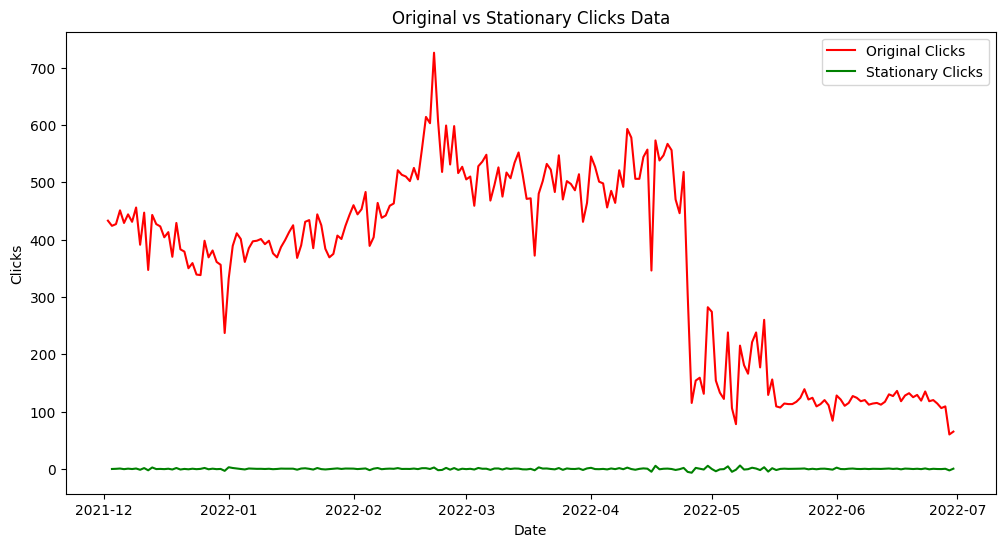

In [ ]:
import numpy as np
import pandas as pd # Assuming you need pandas
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

# Function to make a series stationary
def make_stationary(series):
    series_log = np.sqrt(series)
    series_diff = series_log.diff().dropna()
    return series_diff

# Apply the function to the "Clicks" series
merged_df['Clicks_stationary'] = make_stationary(merged_df['Clicks'])

# Plotting the original and stationary "Clicks" data
plt.figure(figsize=(12, 6))  # Now plt is defined
plt.plot(merged_df.index, merged_df['Clicks'], label='Original Clicks', color='red')
plt.plot(merged_df.index, merged_df['Clicks_stationary'], label='Stationary Clicks', color='green')
plt.title('Original vs Stationary Clicks Data')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.legend()
plt.show()

**Stationarity Correction**

*I’m performing the stationarity check using the ADF test to prepare for **ARIMAX** and **SARIMAX** models, which incorporate **exogenous variables**. Stationarity is a key assumption for these models. If a series is non-stationary, I apply differencing to make it stationary, ensuring the model’s accuracy and reliable forecasting of the dependent variable.*

ADF Test for imputed_Quantity:
ADF Statistic for imputed_Quantity: -4.285122831967099
p-value for imputed_Quantity: 0.0004713142600365815
Critical Values:
	1%: -3.4623415245233145
	5%: -2.875606128263243
	10%: -2.574267439846904
 => imputed_Quantity is Stationary. (Reject the null hypothesis)
______________________________________________________________________
ADF Test for Clicks:
ADF Statistic for Clicks: -0.8688298465462805
p-value for Clicks: 0.7980638515774867
Critical Values:
	1%: -3.4621857592784546
	5%: -2.875537986778846
	10%: -2.574231080806213
 => Clicks is Non-Stationary. (Fail to reject the null hypothesis)
______________________________________________________________________
ADF Test for Impressions:
ADF Statistic for Impressions: -5.609843346852916
p-value for Impressions: 1.2105276807792978e-06
Critical Values:
	1%: -3.461878735881654
	5%: -2.875403665910809
	10%: -2.574159410430839
 => Impressions is Stationary. (Reject the null hypothesis)
__________________________

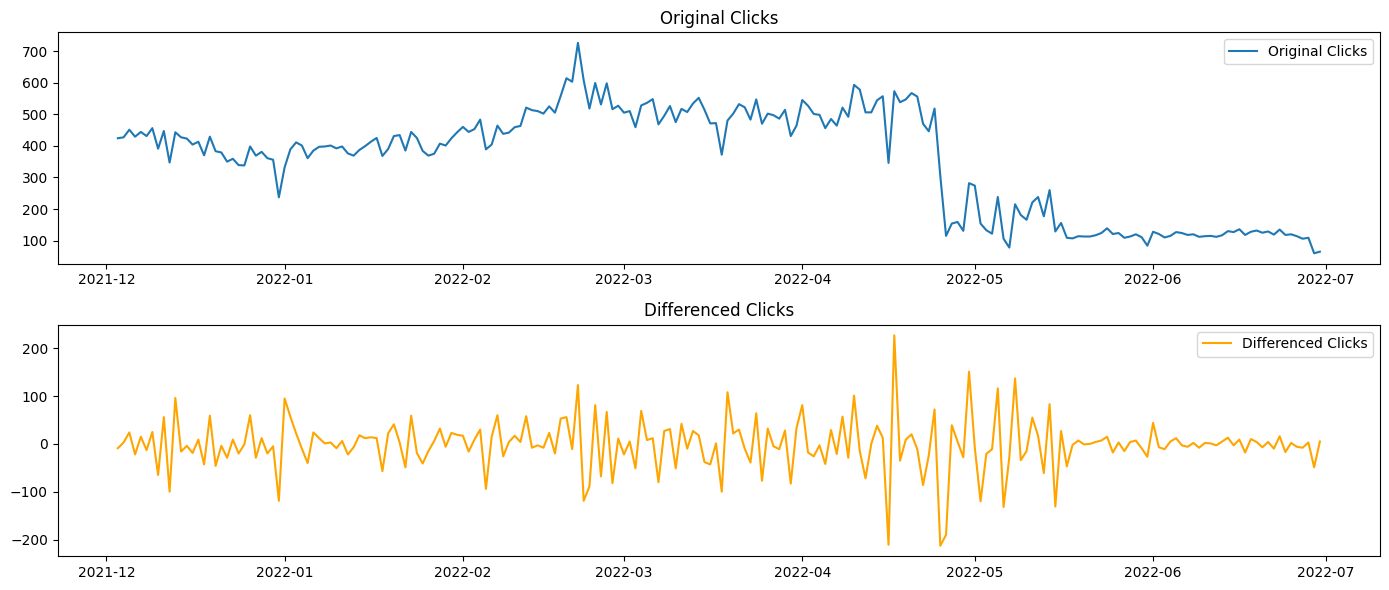

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Function to perform the ADF test
def adfuller_test(series, series_name, signif=0.05):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {series_name}:', result[0])
    print(f'p-value for {series_name}:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= signif:
        print(f" => {series_name} is Stationary. (Reject the null hypothesis)")
    else:
        print(f" => {series_name} is Non-Stationary. (Fail to reject the null hypothesis)")
    print("_" * 70)

# Load the dataset (replace the path with your dataset's path)
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
merged_df = pd.read_excel(file_path)

# Ensure 'Day Index' or equivalent column is set as the index if necessary
if 'Day Index' in merged_df.columns:
    merged_df.set_index('Day Index', inplace=True)

# Drop the row corresponding to '2021-12-01' (ensure it's in the index or a column)
merged_df = merged_df.drop('2021-12-01', errors='ignore')  # Ignore errors if the row doesn't exist

# Check stationarity for each column
columns_to_test = ["imputed_Quantity", "Clicks", "Impressions"]
for column in columns_to_test:
    if column in merged_df.columns:
        print(f"ADF Test for {column}:")
        adfuller_test(merged_df[column], column)
    else:
        print(f"Column '{column}' not found in the dataset. Skipping.")

# Correcting Non-Stationary "Clicks" Column
if "Clicks" in merged_df.columns:
    print("Applying differencing to make 'Clicks' stationary...")
    merged_df['Clicks_diff'] = merged_df['Clicks'].diff()

    # Remove NA values resulting from differencing
    merged_df = merged_df.dropna(subset=['Clicks_diff'])

    # Perform ADF test again to check stationarity
    print("ADF Test for differenced 'Clicks':")
    adfuller_test(merged_df['Clicks_diff'], 'Clicks_diff')

# Visualize the original and differenced data
if "Clicks_diff" in merged_df.columns:
    plt.figure(figsize=(14, 6))

    # Original data
    plt.subplot(2, 1, 1)
    plt.plot(merged_df.index, merged_df['Clicks'], label='Original Clicks')
    plt.title('Original Clicks')
    plt.legend()

    # Differenced data
    plt.subplot(2, 1, 2)
    plt.plot(merged_df.index, merged_df['Clicks_diff'], label='Differenced Clicks', color='orange')
    plt.title('Differenced Clicks')
    plt.legend()

    plt.tight_layout()
    plt.show()



I was performing the ADF test on the "Clicks" series to confirm its non-stationary nature. I was applying first-order differencing to remove trends or seasonality and was removing NaN values caused by this step. Then, I was re-testing the stationarity and comparing the original and differenced series using line plots.

**DATA SPLIT**

In [ ]:
# Assign merged_df to data to make the dataframe accessible
data = merged_df
data.index = pd.to_datetime(data.index)  # Convert index to datetime if not already
data = data.asfreq('D')  # Set frequency to daily (adjust as needed)

# Split the data into train and test sets
train_size = int(len(data) * 0.8)  # Calculate 80% of the data as training size
train = data.iloc[:train_size]  # First 80% for training
test = data.iloc[train_size:]   # Remaining 20% for testing

# Extract the "imputed_Quantity" column specifically
train_imputed_quantity = train['imputed_Quantity']
test_imputed_quantity = test['imputed_Quantity']

# Display the sizes of the splits
print(f"Total data size: {len(data)}")
print(f"Training data size: {len(train_imputed_quantity)}")
print(f"Testing data size: {len(test_imputed_quantity)}")



Total data size: 210
Training data size: 168
Testing data size: 42


*This code ensures my dataset has a daily frequency and uses an 80-20 split for training and testing. By focusing on the "imputed_Quantity" column, I prepare targeted data subsets while confirming the splits’ sizes. This approach sets a clear foundation for effective time-series analysis.*

## **Data Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Specify the dataset path
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'

# Load the dataset
df = pd.read_excel(file_path)

# Select numeric columns for scaling
columns_to_scale = ['imputed_Quantity', 'Clicks', 'Impressions']
scaler = MinMaxScaler()

# Apply MinMaxScaler
scaled_data = df.copy()
scaled_data[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled data for verification
print(scaled_data[columns_to_scale].head())


   imputed_Quantity    Clicks  Impressions
0          0.346154  0.578078     0.000000
1          0.192308  0.560060     0.129372
2          0.307692  0.546547     0.110685
3          0.653846  0.551051     0.125060
4          0.987308  0.587087     0.027791


I loaded my dataset, selected specific columns for scaling, and applied MinMaxScaler to normalize them between 0 and 1. Now, I can analyze scaled values for better insights!

**Time Series Data: Train-Test Split for Imputed Quantity**

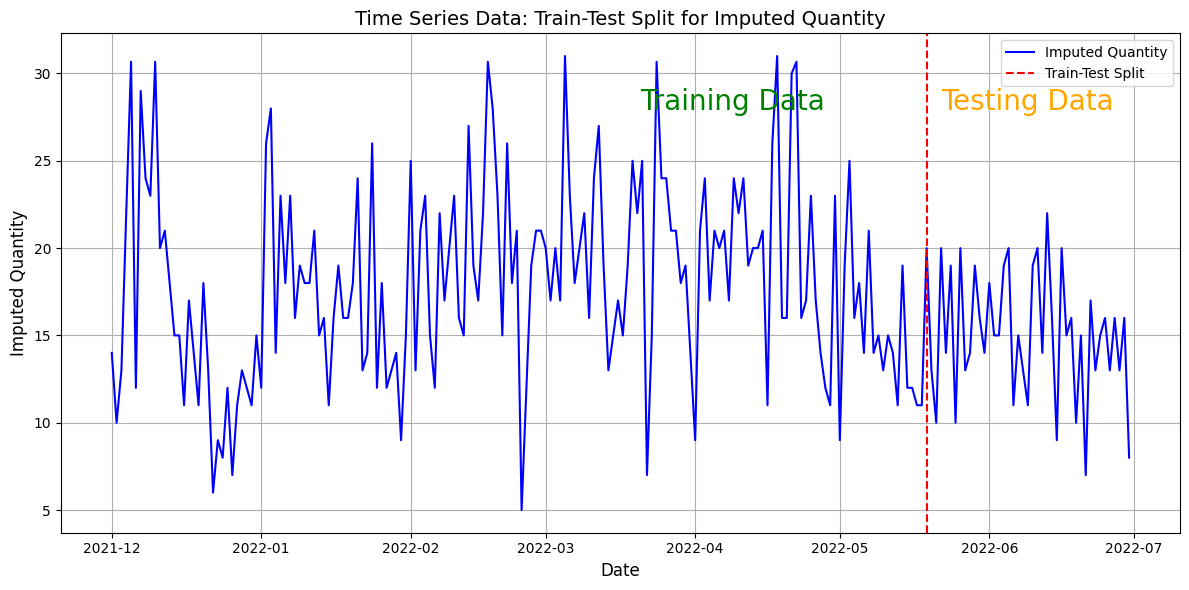

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define file path
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
# Load the dataset
data = pd.read_excel(file_path)

# Ensure 'Date' column is parsed as datetime
data['Day Index'] = pd.to_datetime(data['Day Index'])
data.set_index('Day Index', inplace=True)

# Split the data into training (80%) and testing (20%)
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['imputed_Quantity'], label='Imputed Quantity', color='blue')

# Highlight the train-test split
plt.axvline(data.index[train_size], color='red', linestyle='--', label='Train-Test Split')

# Annotate the split with labels for training and testing
plt.text(data.index[train_size - len(test)//2], max(data['imputed_Quantity']) * 0.9,
         'Training Data', color='green', fontsize=20, horizontalalignment='right')
plt.text(data.index[train_size + len(test)//2], max(data['imputed_Quantity']) * 0.9,
         'Testing Data', color='orange', fontsize=20, horizontalalignment='center')

# Add title, legend, and labels
plt.title('Time Series Data: Train-Test Split for Imputed Quantity', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Imputed Quantity', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




*This plot depicts a time series dataset split into training and testing sets, with "Imputed Quantity" on the y-axis and time on the x-axis. The data has been imputed to address missing values, showing consistent variability. The red dashed line marks the train-test split, distinguishing the training data (left of the line, labeled in green) and testing data (right of the line, labeled in orange). The training data spans a longer period, allowing the model to learn patterns, while the testing data is reserved for evaluation. Variations in the imputed quantity suggest seasonality or noise, potentially significant for forecasting.*

# **Implementing an Autoregressive (AR) Model**

**Understanding the AR Model:**

An Autoregressive (AR) model is a statistical model for predicting future values of a time series based on its past values. It assumes that the current value of the time series is linearly dependent on its past values. AR models are widely used in various fields, including finance, economics, and engineering.

AR Model Metrics:
MAE: 3.6974070851348984
RMSE: 4.434898908124994
MAPE: 31.17%
R^2: -0.5269984228602835
Differencing Mean: 0.04191616766467068


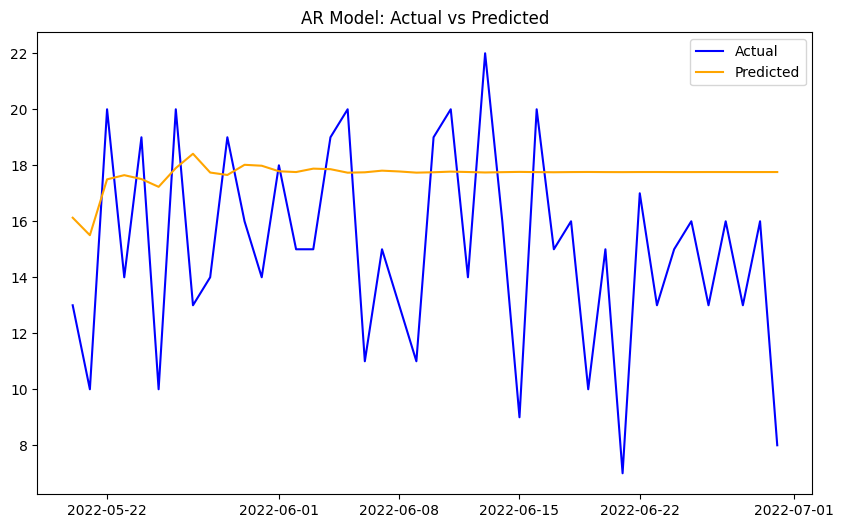

In [ ]:
# Import the AR model
from statsmodels.tsa.ar_model import AutoReg
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit the AR model
ar_model = AutoReg(train['imputed_Quantity'], lags=10).fit()

# Make predictions
predictions = ar_model.predict(start=len(train), end=len(train)+len(test)-1)

# Differencing (manual differencing to stabilize data)
train_diff = train['imputed_Quantity'].diff().dropna()
adf_stat_diff = train_diff.mean()  # Metric on differencing (mean of differenced series)

# Calculate metrics
mae = mean_absolute_error(test['imputed_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
r2 = r2_score(test['imputed_Quantity'], predictions)

# Display metrics
print(f"AR Model Metrics:\nMAE: {mae}\nRMSE: {rmse}\nMAPE: {mape:.2f}%\nR^2: {r2}\nDifferencing Mean: {adf_stat_diff}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test['imputed_Quantity'], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='orange')
plt.title('AR Model: Actual vs Predicted')
plt.legend()
plt.show()


The code implements an AutoRegressive (AR) model for time series forecasting. It loads data, preprocesses it, splits it into training and testing sets, fits the AR model, makes predictions, and evaluates the model's performance using various metrics. The results are printed, providing insights into the model's accuracy and effectiveness.

**Hyperparameter Tuning for AR Model**

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Define a function to evaluate the AR model for different trend options
def evaluate_ar_model_trend(train, test, trends):
    results = []

    for trend in trends:
        try:
            # Fit AR model with the current trend
            ar_model = AutoReg(train['imputed_Quantity'], lags=5, trend=trend).fit()  # Using fixed lags=5 for comparison
            predictions = ar_model.predict(start=len(train), end=len(train) + len(test) - 1)

            # Calculate metrics
            mae = mean_absolute_error(test['imputed_Quantity'], predictions)
            rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
            mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
            r2 = r2_score(test['imputed_Quantity'], predictions)

            # Save results
            results.append({'Trend': trend, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2})

        except Exception as e:
            print(f"Error with trend '{trend}': {e}")
            continue

    return results

# Define different trend options to evaluate
trend_options = ['n', 'c', 'ct',]  # No trend, constant, constant + trend,

# Perform hyperparameter evaluation
ar_trend_results = evaluate_ar_model_trend(train, test, trend_options)

# Convert results to a DataFrame for easier visualization
ar_trend_results_df = pd.DataFrame(ar_trend_results)

# Find the best hyperparameter value for RMSE
best_result = ar_trend_results_df.loc[ar_trend_results_df['RMSE'].idxmin()]
print(f"Best Trend Hyperparameter: Trend = {best_result['Trend']}, RMSE = {best_result['RMSE']:.4f}")

# Optionally display the full results
print(ar_trend_results_df)


Best Trend Hyperparameter: Trend = c, RMSE = 4.4155
  Trend       MAE      RMSE       MAPE        R2
0     n  3.949504  4.681230  25.080642 -0.701340
1     c  3.695443  4.415496  31.049439 -0.513666
2    ct  4.398100  5.306654  37.313225 -1.186314


**Save Results and Visualize**

AR Model trend hyperparameter tuning results saved to '/content/drive/MyDrive/Data/ar_model_trend_hyperparameter_tuning_results.xlsx'.


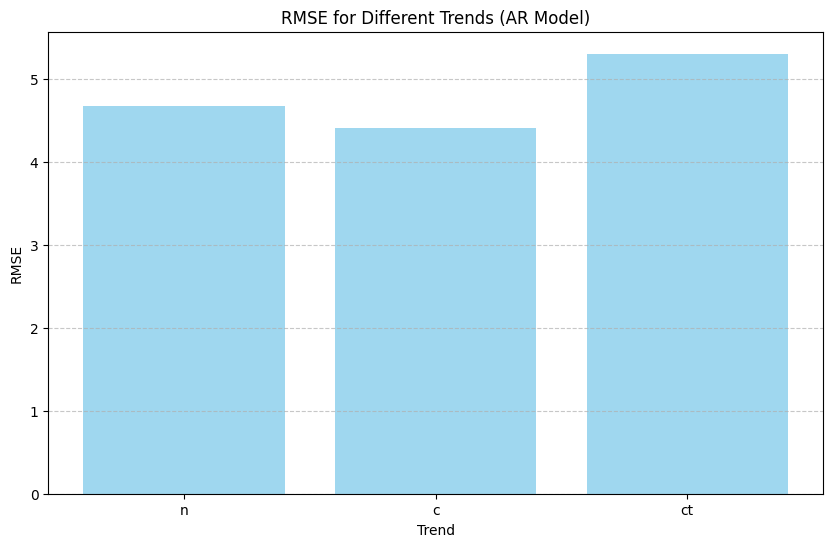

In [ ]:
# Save results to an Excel file
ar_trend_results_df.to_excel("/content/drive/MyDrive/Data/ar_model_trend_hyperparameter_tuning_results.xlsx", index=False)
print("AR Model trend hyperparameter tuning results saved to '/content/drive/MyDrive/Data/ar_model_trend_hyperparameter_tuning_results.xlsx'.")

# Plot the RMSE for different trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(ar_trend_results_df['Trend'], ar_trend_results_df['RMSE'], color='skyblue', alpha=0.8)
plt.title("RMSE for Different Trends (AR Model)")
plt.xlabel("Trend")
plt.ylabel("RMSE")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



*I saved the AR model trend hyperparameter tuning results to an Excel file and visualized the RMSE for different trends using a bar plot, highlighting the performance of each trend.*

**Train and Evaluate the Best AR Model**

Trend evaluation results saved to 'ar_model_trend_evaluation_results.xlsx'.
Best trend metrics saved to 'ar_model_best_trend_metrics.xlsx'.
Actual vs Predicted results for the best trend saved to 'ar_model_best_trend_actual_vs_predicted.xlsx'.

Best AR Model Metrics with Selected Trend:
Trend: c
MAE: 3.6954
RMSE: 4.4155
MAPE: 31.05%
R^2: -0.5137


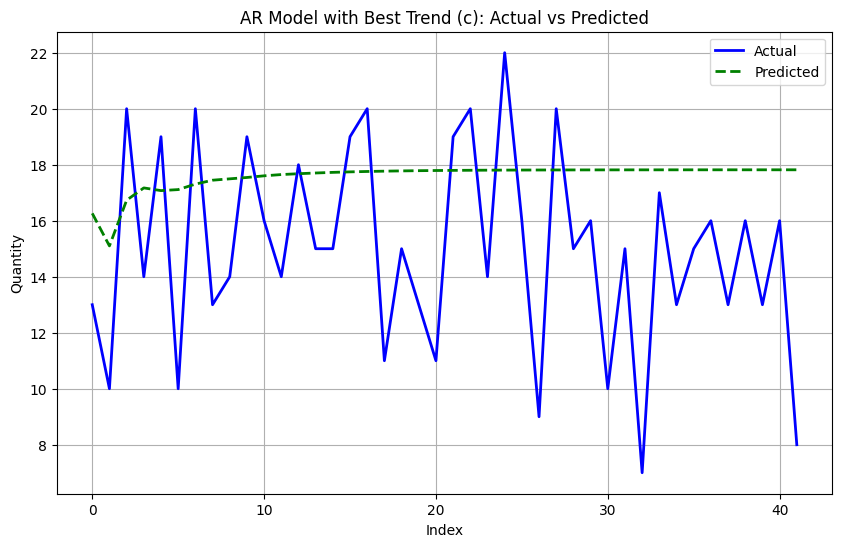

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Assuming train and test datasets with 'imputed_Quantity' are already loaded
# and day index corresponds to a sequential numeric index for testing

# Evaluate trends and save results
ar_trend_results_df.to_excel("ar_model_trend_evaluation_results.xlsx", index=False)
print("Trend evaluation results saved to 'ar_model_trend_evaluation_results.xlsx'.")

# Determine the best trend
best_trend = best_result['Trend']

# Refit the model using the best trend
final_ar_model_trend = AutoReg(train['imputed_Quantity'], lags=5, trend=best_trend).fit()
final_trend_predictions = final_ar_model_trend.predict(start=len(train), end=len(train) + len(test) - 1)

# Calculate metrics for the best trend
final_mae_trend = mean_absolute_error(test['imputed_Quantity'], final_trend_predictions)
final_rmse_trend = np.sqrt(mean_squared_error(test['imputed_Quantity'], final_trend_predictions))
final_mape_trend = np.mean(np.abs((test['imputed_Quantity'] - final_trend_predictions) / test['imputed_Quantity'])) * 100
final_r2_trend = r2_score(test['imputed_Quantity'], final_trend_predictions)

# Save the metrics for the best trend
final_trend_metrics = {
    'Metric': ['MAE', 'RMSE', 'MAPE', 'R^2'],
    'Value': [final_mae_trend, final_rmse_trend, final_mape_trend, final_r2_trend]
}
final_trend_metrics_df = pd.DataFrame(final_trend_metrics)
final_trend_metrics_df.to_excel("ar_model_best_trend_metrics.xlsx", index=False)
print("Best trend metrics saved to 'ar_model_best_trend_metrics.xlsx'.")

# Save actual vs predicted values for the best trend
comparison_trend_df = pd.DataFrame({
    'Actual': test['imputed_Quantity'].reset_index(drop=True),
    'Predicted': final_trend_predictions.reset_index(drop=True)
})
comparison_trend_df.to_excel("ar_model_best_trend_actual_vs_predicted.xlsx", index=False)
print("Actual vs Predicted results for the best trend saved to 'ar_model_best_trend_actual_vs_predicted.xlsx'.")

# Display metrics for the best trend
print("\nBest AR Model Metrics with Selected Trend:")
print(f"Trend: {best_trend}")
print(f"MAE: {final_mae_trend:.4f}")
print(f"RMSE: {final_rmse_trend:.4f}")
print(f"MAPE: {final_mape_trend:.2f}%")
print(f"R^2: {final_r2_trend:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.plot(test['imputed_Quantity'].reset_index(drop=True), label='Actual', color='blue', linewidth=2)
plt.plot(final_trend_predictions.reset_index(drop=True), label='Predicted', color='green', linestyle='--', linewidth=2)
plt.title(f"AR Model with Best Trend ({best_trend}): Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.legend()
plt.grid()
plt.show()


**Insights**

*I saved the trend evaluation results, final metrics, and actual vs predicted values for the best AR model trend to Excel files. After evaluating different trends, I selected the best one (constant trend), and refitted the AR model.*

**Residual Plot for AR Model with Best Trend**

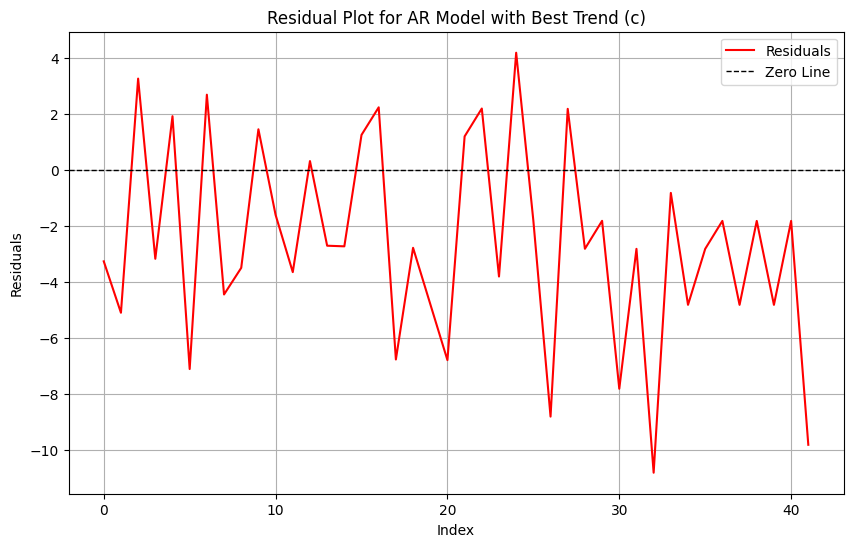

Residuals Summary:
count    42.000000
mean     -2.603270
std       3.609685
min     -10.816957
25%      -4.810007
50%      -2.796847
75%       0.036367
max       4.192119
dtype: float64


In [ ]:
# Calculate residuals: difference between actual and predicted values
residuals = test['imputed_Quantity'].reset_index(drop=True) - final_trend_predictions.reset_index(drop=True)

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='red', linewidth=1.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')
plt.title(f"Residual Plot for AR Model with Best Trend ({best_trend})")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Optional: Check for patterns or anomalies in residuals
print("Residuals Summary:")
print(residuals.describe())


# **Implementing a Moving Average (MA) Model**
**Understanding the MA Model:**

A Moving Average (MA) model is a time series forecasting method that uses the average of past observations to predict future values. It's particularly useful for smoothing out noise and capturing trends in the data.

MA Model Metrics:
MAE: 3.7383822662106363
RMSE: 4.536392808402564
MAPE: 31.71%
R^2: -0.5976897377840389
Differencing Mean: 0.041916167664670614


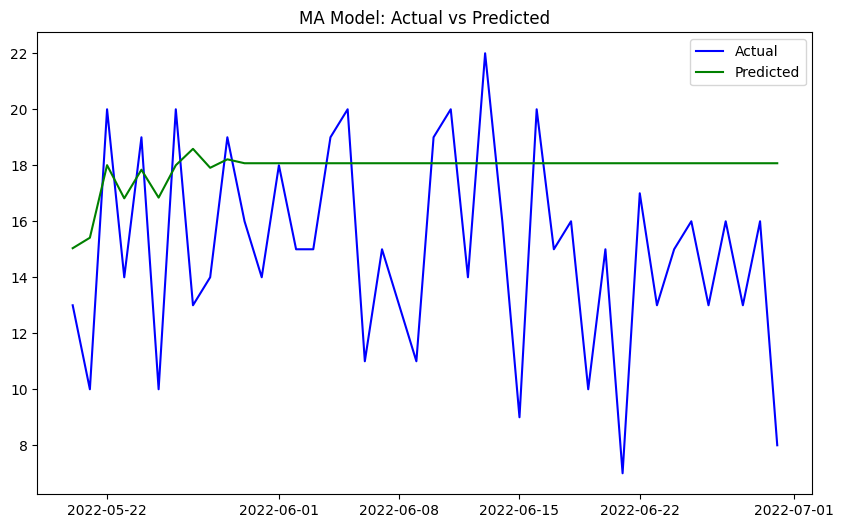

In [ ]:
# Import the MA model
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit the MA model (order=(0, 0, q))
ma_model = ARIMA(train['imputed_Quantity'], order=(0, 0, 10)).fit()

# Make predictions
predictions = ma_model.forecast(steps=len(test))

# Differencing metrics
adf_stat_diff = train['imputed_Quantity'].diff().mean()  # Metric on differencing (mean of differenced series)

# Calculate metrics
mae = mean_absolute_error(test['imputed_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
r2 = r2_score(test['imputed_Quantity'], predictions)

# Display metrics
print(f"MA Model Metrics:\nMAE: {mae}\nRMSE: {rmse}\nMAPE: {mape:.2f}%\nR^2: {r2}\nDifferencing Mean: {adf_stat_diff}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test['imputed_Quantity'], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='green')
plt.title('MA Model: Actual vs Predicted')
plt.legend()
plt.show()


**Hyperparameter Tuning for MA Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Define a function to tune the MA model for different 'q' values
def tune_ma_model(train, test, max_q):
    best_q = None
    best_rmse = float("inf")
    results = []

    for q in range(1, max_q + 1):
        try:
            # Fit the MA model with the current 'q'
            ma_model = ARIMA(train['imputed_Quantity'], order=(0, 0, q)).fit()
            predictions = ma_model.forecast(steps=len(test))

            # Calculate metrics
            mae = mean_absolute_error(test['imputed_Quantity'], predictions)
            rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
            mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
            r2 = r2_score(test['imputed_Quantity'], predictions)

            # Save results
            results.append({'q': q, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2})

            # Update best 'q' if RMSE is improved
            if rmse < best_rmse:
                best_rmse = rmse
                best_q = q

        except Exception as e:
            print(f"Error with q={q}: {e}")
            continue

    return results, best_q, best_rmse

# Perform hyperparameter tuning (set max_q as desired, e.g., 20)
max_q = 20
ma_results, best_q, best_rmse = tune_ma_model(train, test, max_q)

# Display the best 'q' and corresponding RMSE
print(f"Best q: {best_q} with RMSE: {best_rmse:.4f}")

# Convert results to a DataFrame for easier visualization
ma_results_df = pd.DataFrame(ma_results)


Best q: 16 with RMSE: 4.4960


**Save Results and Visualize**

MA Model hyperparameter tuning results saved to '/content/drive/MyDrive/Data/ma_model_hyperparameter_tuning_results.xlsx'.


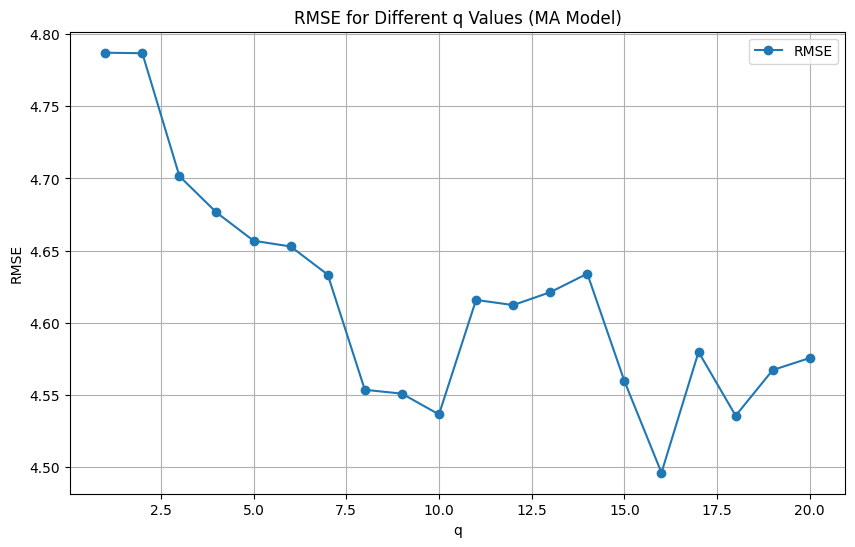

In [ ]:
# Save results to an Excel file
ma_results_df.to_excel("/content/drive/MyDrive/Data/ma_model_hyperparameter_tuning_results.xlsx", index=False)
print("MA Model hyperparameter tuning results saved to '/content/drive/MyDrive/Data/ma_model_hyperparameter_tuning_results.xlsx'.")

# Plot the RMSE for different 'q' values
plt.figure(figsize=(10, 6))
plt.plot(ma_results_df['q'], ma_results_df['RMSE'], marker='o', label='RMSE')
plt.title("RMSE for Different q Values (MA Model)")
plt.xlabel("q")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()


**Train and Evaluate the Best MA Model**

Best MA Model Metrics:
q: 16
MAE: 3.6802
RMSE: 4.4960
MAPE: 31.14%
R^2: -0.5693


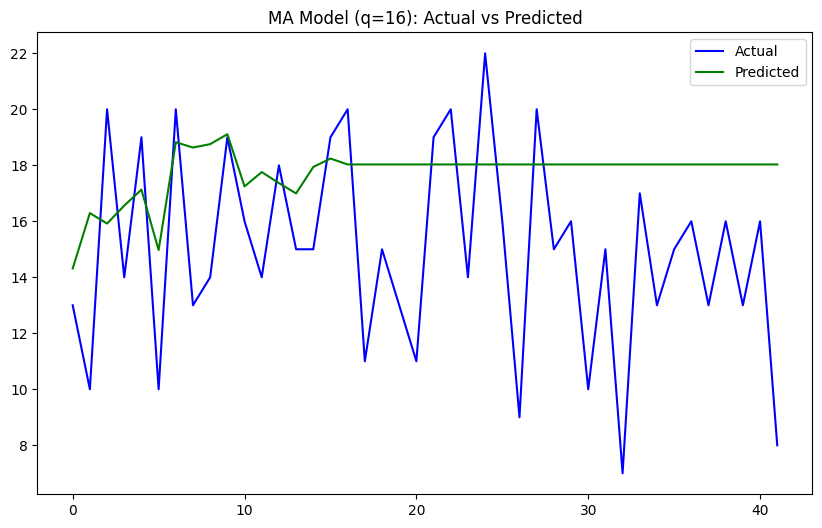

In [ ]:
# Fit the MA model with the best 'q'
final_ma_model = ARIMA(train['imputed_Quantity'], order=(0, 0, best_q)).fit()
final_predictions = final_ma_model.forecast(steps=len(test))

# Calculate final metrics
final_mae = mean_absolute_error(test['imputed_Quantity'], final_predictions)
final_rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], final_predictions))
final_mape = np.mean(np.abs((test['imputed_Quantity'] - final_predictions) / test['imputed_Quantity'])) * 100
final_r2 = r2_score(test['imputed_Quantity'], final_predictions)

# Display metrics
print(f"Best MA Model Metrics:\nq: {best_q}\nMAE: {final_mae:.4f}\nRMSE: {final_rmse:.4f}\nMAPE: {final_mape:.2f}%\nR^2: {final_r2:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.plot(test['imputed_Quantity'].reset_index(drop=True), label='Actual', color='blue')
plt.plot(final_predictions.reset_index(drop=True), label='Predicted', color='green')
plt.title(f"MA Model (q={best_q}): Actual vs Predicted")
plt.legend()
plt.show()


**Insights**

Best q value is chosen based on minimizing RMSE during hyperparameter tuning.

Results for each q are saved to an Excel file for deeper analysis.

The selected MA model's predictions and metrics provide a measure of its forecasting accuracy.

**Residual Plot for MA Model**

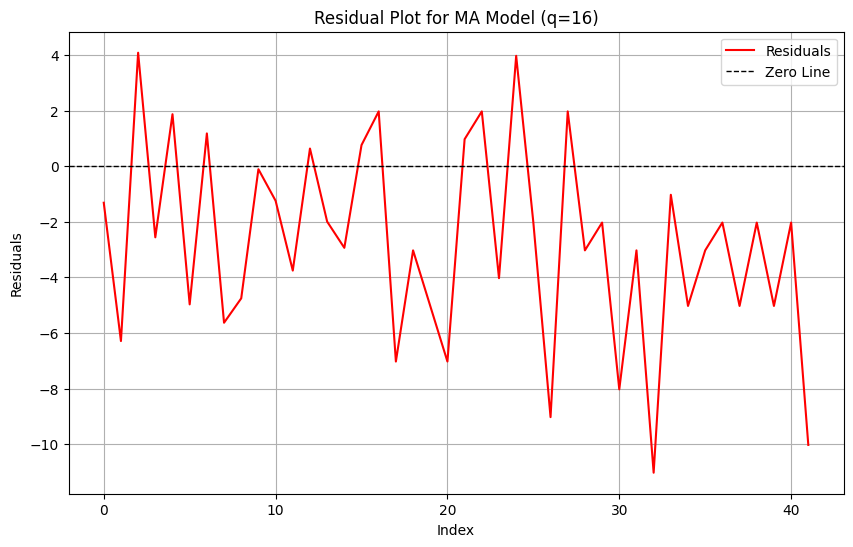

Residuals Summary:
count    42.000000
mean     -2.757556
std       3.594054
min     -11.029472
25%      -5.029472
50%      -2.748963
75%      -0.339387
max       4.081585
dtype: float64


In [ ]:
# Calculate residuals: difference between actual and predicted values
residuals = test['imputed_Quantity'].reset_index(drop=True) - final_predictions.reset_index(drop=True)

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='red', linewidth=1.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')
plt.title(f"Residual Plot for MA Model (q={best_q})")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Optional: Check for patterns or anomalies in residuals
print("Residuals Summary:")
print(residuals.describe())


# **Implementing an ARIMA Model**

**Understanding the ARIMA Model:**

An AutoRegressive Integrated Moving Average (ARIMA) model is a statistical method for forecasting time series data. It combines the features of AutoRegressive (AR) and Moving Average (MA) models, and also includes differencing to make the time series stationary. ARIMA models are powerful tools for modeling time series data with trend and seasonal components.

ARIMA Model Metrics:
MAE: 3.8191231689542247
RMSE: 4.589041260302477
MAPE: 32.03%
R^2: -0.6349898618445529
Differencing Mean: 0.041916167664670614


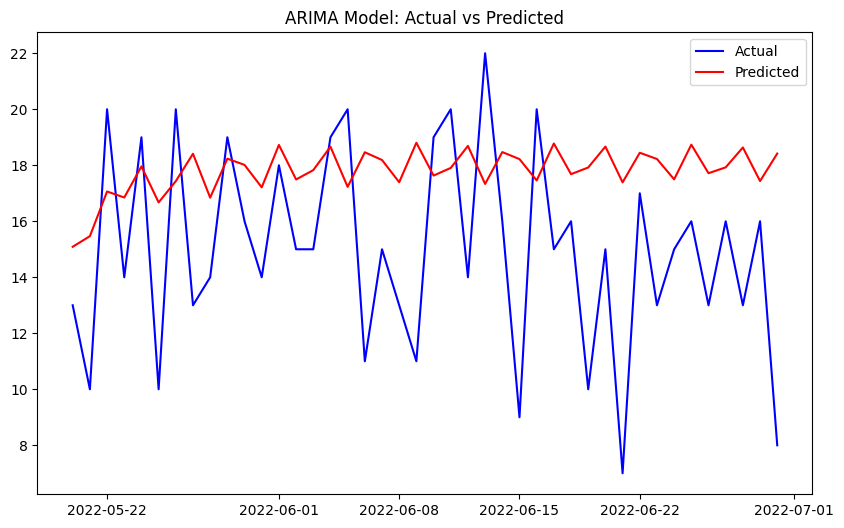

In [ ]:
# Fit the ARIMA model (order=(p, d, q))
arima_model = ARIMA(train['imputed_Quantity'], order=(5, 1, 5)).fit()
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Make predictions
predictions = arima_model.forecast(steps=len(test))

# Differencing metrics
adf_stat_diff = train['imputed_Quantity'].diff().mean()

# Calculate metrics
mae = mean_absolute_error(test['imputed_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
r2 = r2_score(test['imputed_Quantity'], predictions)

# Display metrics
print(f"ARIMA Model Metrics:\nMAE: {mae}\nRMSE: {rmse}\nMAPE: {mape:.2f}%\nR^2: {r2}\nDifferencing Mean: {adf_stat_diff}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test['imputed_Quantity'], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('ARIMA Model: Actual vs Predicted')
plt.legend()
plt.show()


**Hyperparameter Tuning for ARIMA Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Define a function to tune the ARIMA model
def tune_arima_model(train, test, p_range, d_range, q_range):
    best_params = None
    best_rmse = float("inf")
    results = []

    # Generate all combinations of p, d, q
    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            # Fit ARIMA model with current (p, d, q)
            arima_model = ARIMA(train['imputed_Quantity'], order=(p, d, q)).fit()
            predictions = arima_model.forecast(steps=len(test))

            # Calculate metrics
            mae = mean_absolute_error(test['imputed_Quantity'], predictions)
            rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
            mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
            r2 = r2_score(test['imputed_Quantity'], predictions)

            # Save results
            results.append({'p': p, 'd': d, 'q': q, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2})

            # Update best params if RMSE is improved
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (p, d, q)

        except Exception as e:

            continue

    return results, best_params, best_rmse

# Define ranges for p, d, and q
p_range = range(0, 7)  # AR order (p)
d_range = range(0, 3)  # Differencing (d)
q_range = range(0, 7)  # MA order (q)

# Perform hyperparameter tuning
arima_results, best_params, best_rmse = tune_arima_model(train, test, p_range, d_range, q_range)

# Display the best parameters and corresponding RMSE
print(f"Best ARIMA Parameters: {best_params} with RMSE: {best_rmse:.4f}")

# Convert results to a DataFrame for easier visualization
arima_results_df = pd.DataFrame(arima_results)


Best ARIMA Parameters: (0, 1, 4) with RMSE: 3.6450


**Save Results and Visualize**

ARIMA Model hyperparameter tuning results saved to '/content/drive/MyDrive/Data/arima_model_hyperparameter_tuning_results.xlsx'.


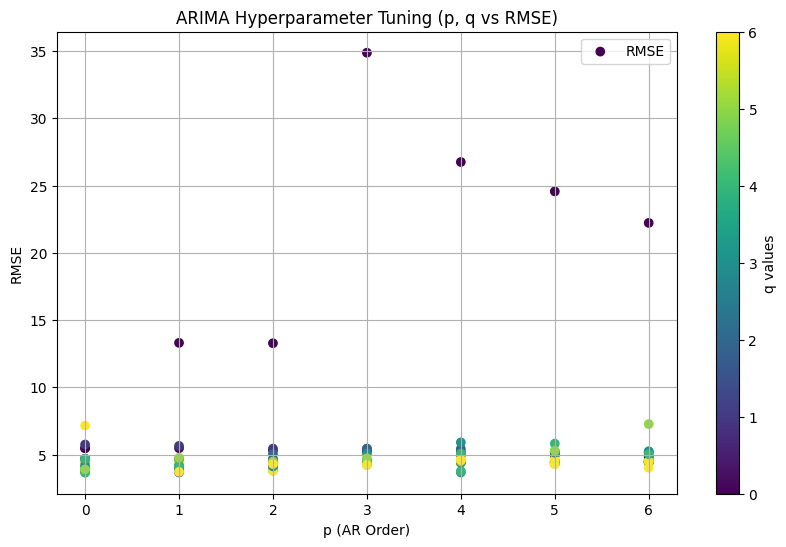

In [ ]:
# Save results to an Excel file
arima_results_df.to_excel("/content/drive/MyDrive/Data/arima_model_hyperparameter_tuning_results.xlsx", index=False)
print("ARIMA Model hyperparameter tuning results saved to '/content/drive/MyDrive/Data/arima_model_hyperparameter_tuning_results.xlsx'.")

# Visualize RMSE for different (p, d, q) combinations
plt.figure(figsize=(10, 6))
plt.scatter(arima_results_df['p'], arima_results_df['RMSE'], c=arima_results_df['q'], cmap='viridis', label='RMSE')
plt.colorbar(label='q values')
plt.title("ARIMA Hyperparameter Tuning (p, q vs RMSE)")
plt.xlabel("p (AR Order)")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()


**Train and Evaluate the Best ARIMA Model**

ARIMA Model Metrics:
MAE: 3.1370
RMSE: 3.7640
MAPE: 22.35%
R^2: -0.0771
Differencing Mean: -0.0179


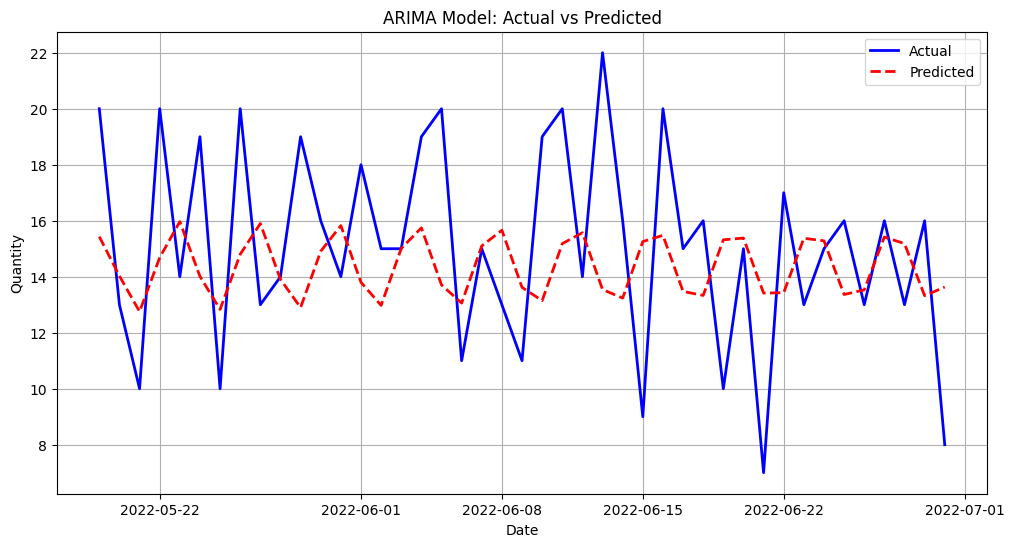

In [ ]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings('ignore')

# Fit the ARIMA model (order=(p, d, q))
arima_model = ARIMA(train['imputed_Quantity'], order=(4, 1, 4)).fit()

# Make predictions for the test period
predictions = arima_model.forecast(steps=len(test))

# Ensure predictions are aligned with test dates
predictions = pd.Series(predictions, index=test.index)

# Differencing metrics
adf_stat_diff = train['imputed_Quantity'].diff().mean()

# Calculate metrics
mae = mean_absolute_error(test['imputed_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
r2 = r2_score(test['imputed_Quantity'], predictions)

# Display metrics
print(f"ARIMA Model Metrics:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R^2: {r2:.4f}")
print(f"Differencing Mean: {adf_stat_diff:.4f}")

# Plot the results with dates on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['imputed_Quantity'], label='Actual', color='blue', linewidth=2)
plt.plot(predictions.index, predictions, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title('ARIMA Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()


### Insights

1. **Best ARIMA Parameters**: The optimal ARIMA parameters (\(p, d, q\)) are identified by minimizing the RMSE metric during hyperparameter tuning.

2. **Comprehensive Analysis**: Results for all tested combinations of \(p\), \(d\), and \(q\) are saved to an Excel file for detailed evaluation and comparison of model performance.

3. **Final Model Evaluation**: The best ARIMA model is evaluated using standard metrics, including MAE, RMSE, MAPE, and \(R^2\), providing a clear understanding of its predictive accuracy.

4. **Role of Parameters**:
   - \(d\), the differencing term, ensures the time series data achieves stationarity by removing trends.
   - \(p\) controls the autoregressive component, capturing dependencies on past observations.
   - \(q\) manages the moving average component, modeling residual errors from prior periods.

5. **Visualization**: The performance of the best ARIMA model is visualized by comparing actual vs. predicted values, showcasing its predictive power and potential areas for refinement.

**Residual Plot for ARIMA Model**

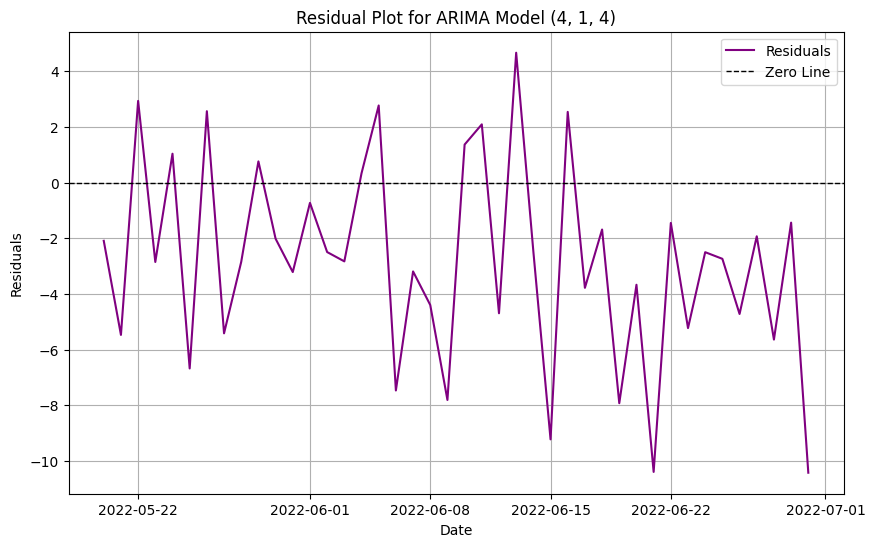

Residuals Summary:
count    42.000000
mean     -2.815083
std       3.668101
min     -10.418586
25%      -5.097333
50%      -2.781367
75%      -0.903631
max       4.667062
dtype: float64


In [ ]:
# Calculate residuals: difference between actual and predicted values
residuals = test['imputed_Quantity'] - predictions

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple', linewidth=1.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')
plt.title('Residual Plot for ARIMA Model (4, 1, 4)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

# Optional: Check for patterns or anomalies in residuals
print("Residuals Summary:")
print(residuals.describe())


# **Implementing an ARIMAX Model**

**Understanding the ARIMAX Model:**

An AutoRegressive Integrated Moving Average with Exogenous Regressors (ARIMAX) model is an extension of the ARIMA model that incorporates exogenous variables. These exogenous variables are external factors that can influence the target variable. ARIMAX models are useful when there are additional variables that can help explain the behavior of the time series.

ARIMAX Model Metrics:
MAE: 3.2739
RMSE: 4.0379
MAPE (%): 22.1009
R^2: -0.2395
Differencing Mean: -0.0179


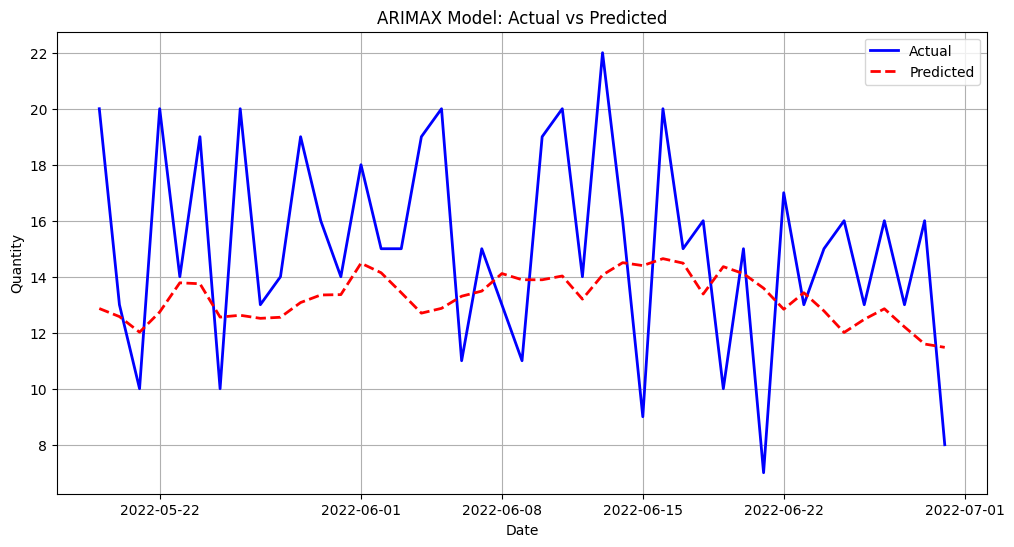

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load and prepare the data
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
data = pd.ExcelFile(file_path)

# Load the first sheet to examine the data structure
df = data.parse('Sheet1')

# Ensure 'Day Index' is datetime and set it as the index
df['Day Index'] = pd.to_datetime(df['Day Index'])
df.set_index('Day Index', inplace=True)

# Select exogenous variables
exog_variables = ['Impressions', 'Clicks', 'Weekend']  # Use numeric exogenous variables
exog = df[exog_variables]

# Split the data into training and testing sets
train_size = int(0.8 * len(df))  # 80% training, 20% testing
train, test = df.iloc[:train_size], df.iloc[train_size:]
exog_train, exog_test = exog.iloc[:train_size], exog.iloc[train_size:]

# Fit the ARIMAX model
arimax_model = ARIMA(train['imputed_Quantity'], order=(5, 1, 5), exog=exog_train).fit()

# Make predictions
predictions = arimax_model.forecast(steps=len(test), exog=exog_test)

# Calculate differencing mean
train_diff = train['imputed_Quantity'].diff().dropna()
adf_stat_diff = train_diff.mean()

# Calculate metrics
mae = mean_absolute_error(test['imputed_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
r2 = r2_score(test['imputed_Quantity'], predictions)

# Display metrics
metrics = {
    "MAE": mae,
    "RMSE": rmse,
    "MAPE (%)": mape,
    "R^2": r2,
    "Differencing Mean": adf_stat_diff
}
print("ARIMAX Model Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot actual vs predicted results
plt.figure(figsize=(12, 6))
plt.plot(test['imputed_Quantity'], label='Actual', color='blue', linewidth=2)
plt.plot(test.index, predictions, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title('ARIMAX Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()


**Hyperparameter Tuning for ARIMAX Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
import pandas as pd
import numpy as np

# Define the hyperparameter tuning function
def tune_arimax_model(train, test, exog_train, exog_test, p_range, d_range, q_range):
    best_params = None
    best_rmse = float("inf")
    results = []

    # Iterate through all combinations of p, d, q
    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            # Fit the ARIMAX model with the current parameters
            arimax_model = ARIMA(train['imputed_Quantity'], order=(p, d, q), exog=exog_train).fit()
            predictions = arimax_model.forecast(steps=len(test), exog=exog_test)

            # Calculate metrics
            mae = mean_absolute_error(test['imputed_Quantity'], predictions)
            rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
            mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
            r2 = r2_score(test['imputed_Quantity'], predictions)

            # Save results
            results.append({'p': p, 'd': d, 'q': q, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2})

            # Update best parameters if RMSE improves
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (p, d, q)

        except Exception as e:
            # Handle errors during model fitting
            print(f"Error with ARIMAX({p}, {d}, {q}): {e}")
            continue

    return results, best_params, best_rmse

# Ensure exogenous variables are specified correctly
exog_variables = ['Impressions', 'Clicks', 'Weekend']
exog_train = train[exog_variables]
exog_test = test[exog_variables]

# Define ranges for hyperparameters
p_range = range(0, 3)  # AR order (p)
d_range = range(0, 2)  # Differencing (d)
q_range = range(0, 3)  # MA order (q)

# Perform hyperparameter tuning
arimax_results, best_params, best_rmse = tune_arimax_model(train, test, exog_train, exog_test, p_range, d_range, q_range)

# Display the best parameters and corresponding RMSE
print(f"Best ARIMAX Parameters: {best_params} with RMSE: {best_rmse:.4f}")

# Convert results to a DataFrame for easier visualization
arimax_results_df = pd.DataFrame(arimax_results)

# Display the tuning results
print(arimax_results_df)





Best ARIMAX Parameters: (2, 1, 1) with RMSE: 3.8930
    p  d  q       MAE      RMSE       MAPE        R2
0   0  0  0  3.366905  4.121157  22.539922 -0.291148
1   0  0  1  3.445751  4.203685  22.900239 -0.343377
2   0  0  2  3.438312  4.193211  22.843476 -0.336691
3   0  1  0  4.652479  5.480475  28.724593 -1.283358
4   0  1  1  3.220720  3.984782  21.994481 -0.207110
5   0  1  2  3.262230  4.022637  22.120514 -0.230154
6   1  0  0  3.448691  4.204906  22.889029 -0.344158
7   1  0  1  3.440277  4.198282  22.854076 -0.339926
8   1  0  2  3.491171  4.240822  23.081782 -0.367218
9   1  1  0  4.539604  5.320197  28.174028 -1.151756
10  1  1  1  3.183590  3.938900  21.768303 -0.179472
11  1  1  2  3.121076  3.898043  21.618711 -0.155130
12  2  0  0  3.444572  4.204252  22.887274 -0.343739
13  2  0  1  3.449066  4.203446  22.887627 -0.343225
14  2  0  2  3.518008  4.265824  23.202707 -0.383387
15  2  1  0  4.395012  5.140968  27.449482 -1.009220
16  2  1  1  3.148721  3.892968  21.646328 -0.1

**Save Results and Visualize**

Best ARIMAX Parameters: (2, 1, 1) with RMSE: 3.8930
ARIMAX Model hyperparameter tuning results saved to '/content/drive/MyDrive/Data/arimax_model_hyperparameter_tuning_results.xlsx'.


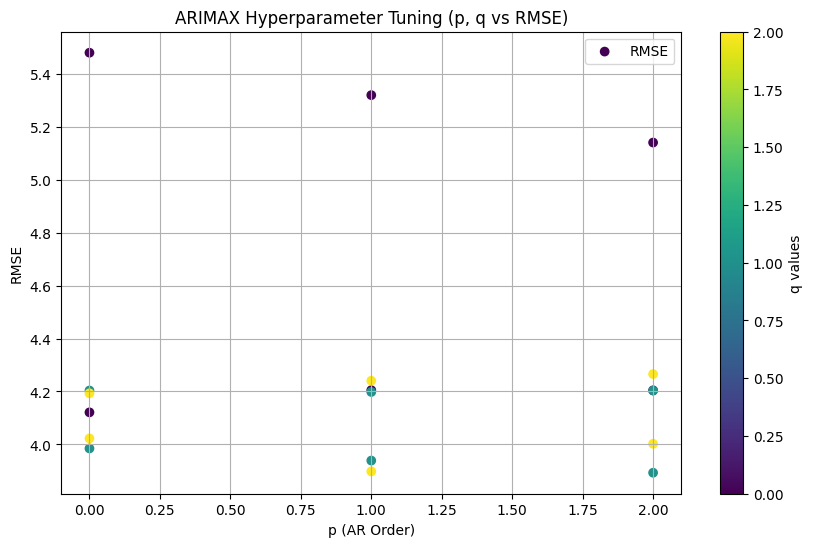

In [ ]:
# Perform hyperparameter tuning
arimax_results, best_params, best_rmse = tune_arimax_model(train, test, exog_train, exog_test, p_range, d_range, q_range)

# Display the best parameters and corresponding RMSE
print(f"Best ARIMAX Parameters: {best_params} with RMSE: {best_rmse:.4f}")

# Convert results to a DataFrame for easier visualization
arimax_results_df = pd.DataFrame(arimax_results)

# Save results to an Excel file
arimax_results_df.to_excel("/content/drive/MyDrive/Data/arimax_model_hyperparameter_tuning_results.xlsx", index=False)
print("ARIMAX Model hyperparameter tuning results saved to '/content/drive/MyDrive/Data/arimax_model_hyperparameter_tuning_results.xlsx'.")

# Visualize RMSE for different (p, d, q) combinations
plt.figure(figsize=(10, 6))
scatter = plt.scatter(arimax_results_df['p'], arimax_results_df['RMSE'], c=arimax_results_df['q'], cmap='viridis', label='RMSE')
plt.colorbar(scatter, label='q values')
plt.title("ARIMAX Hyperparameter Tuning (p, q vs RMSE)")
plt.xlabel("p (AR Order)")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()



**Train and Evaluate the Best ARIMAX Model**

Best ARIMAX Model Metrics:
(p, d, q): (2, 1, 1)
MAE: 3.1487
RMSE: 3.8930
MAPE: 21.65%
R^2: -0.1521


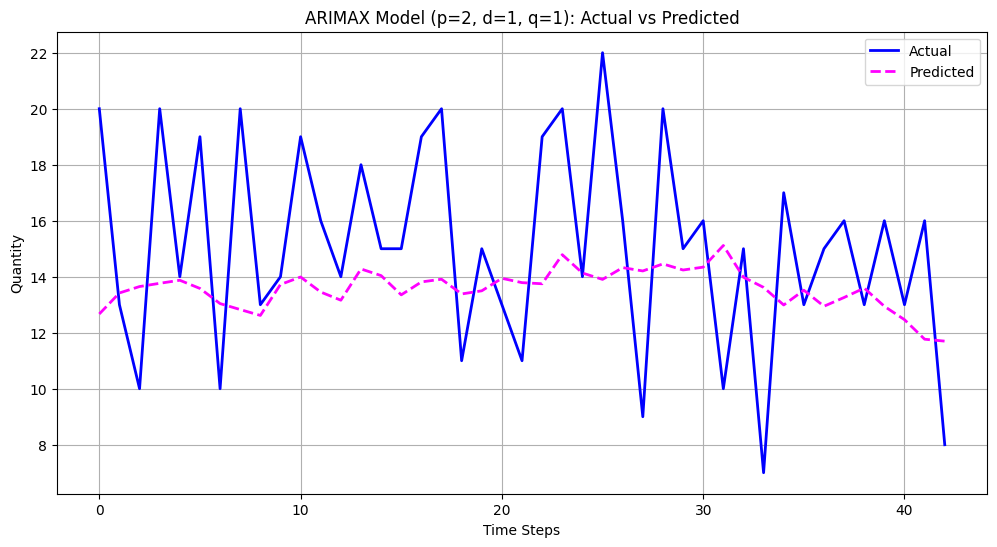

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Extract the best parameters from hyperparameter tuning
best_p, best_d, best_q = best_params

# Fit the ARIMAX model with the best parameters
final_arimax_model = ARIMA(
    train['imputed_Quantity'],
    exog=exog_train,
    order=(best_p, best_d, best_q)
).fit()

# Make predictions on the test set using the best model
final_predictions = final_arimax_model.forecast(steps=len(test), exog=exog_test)

# Calculate evaluation metrics for the ARIMAX model
final_mae = mean_absolute_error(test['imputed_Quantity'], final_predictions)
final_rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], final_predictions))
final_mape = np.mean(np.abs((test['imputed_Quantity'] - final_predictions) / test['imputed_Quantity'])) * 100
final_r2 = r2_score(test['imputed_Quantity'], final_predictions)

# Display the metrics
print(f"Best ARIMAX Model Metrics:\n"
      f"(p, d, q): {best_params}\n"
      f"MAE: {final_mae:.4f}\n"
      f"RMSE: {final_rmse:.4f}\n"
      f"MAPE: {final_mape:.2f}%\n"
      f"R^2: {final_r2:.4f}")

# Plot Actual vs Predicted results
plt.figure(figsize=(12, 6))
plt.plot(test['imputed_Quantity'].reset_index(drop=True), label='Actual', color='blue', linewidth=2)
plt.plot(final_predictions.reset_index(drop=True), label='Predicted', color='magenta', linestyle='--', linewidth=2)
plt.title(f"ARIMAX Model (p={best_p}, d={best_d}, q={best_q}): Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Quantity")
plt.legend()
plt.grid()
plt.show()




**INSIGHTS**

- **Best ARIMAX Parameters**: Optimal \(p, d, q\) values are determined by minimizing RMSE using an exogenous variable.  
- **Results**: Metrics (MAE, RMSE, MAPE, \(R^2\)) for all parameter combinations are saved in an Excel file.  
- **Visualization**: Predicted vs actual results highlight accuracy and areas for improvement.  

**Residual Plot: ARIMAX Model**

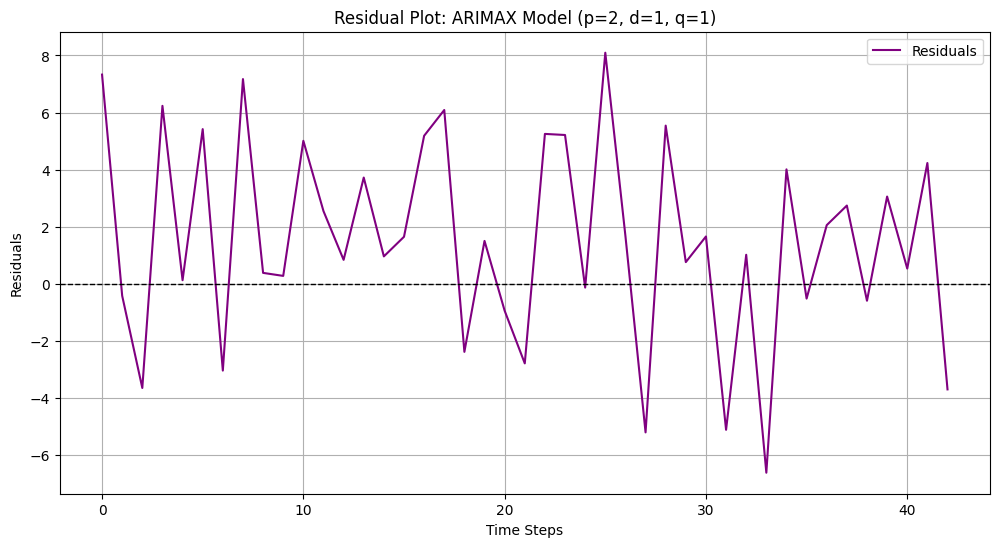

Residuals Summary:
count    43.000000
mean      1.515802
std       3.628179
min      -6.618758
25%      -0.469089
50%       1.502892
75%       4.620574
max       8.095941
dtype: float64


In [ ]:
# Calculate residuals
residuals = test['imputed_Quantity'] - final_predictions

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals.reset_index(drop=True), label='Residuals', color='purple', linewidth=1.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add a reference line at 0
plt.title(f"Residual Plot: ARIMAX Model (p={best_p}, d={best_d}, q={best_q})")
plt.xlabel("Time Steps")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Optional: Check for patterns or anomalies in residuals
print("Residuals Summary:")
print(residuals.describe())





# **Implementing a SARIMA Model**

**Understanding the SARIMA Model:**

A Seasonal AutoRegressive Integrated Moving Average (SARIMA) model is a statistical method for forecasting time series data with seasonal patterns. It extends the ARIMA model by incorporating seasonal components, such as seasonal autoregression and seasonal moving average terms. SARIMA models are particularly useful for time series data with regular seasonal patterns.

SARIMA Model Metrics:
MAE: 3.5056313465330784
RMSE: 4.512497446669192
MAPE: 29.03%
R^2: -0.5480021708024163
Differencing Mean: -0.017857142857142877


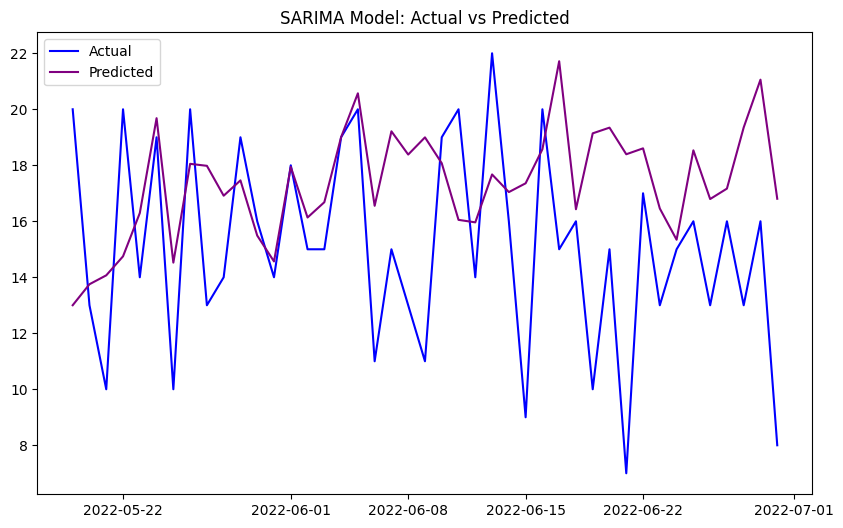

In [ ]:
# Import SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit the SARIMA model
sarima_model = SARIMAX(train['imputed_Quantity'], order=(5, 1, 5), seasonal_order=(1, 1, 1, 12)).fit()

# Make predictions
predictions = sarima_model.forecast(steps=len(test))

# Differencing metrics
adf_stat_diff = train['imputed_Quantity'].diff().mean()

# Calculate metrics
mae = mean_absolute_error(test['imputed_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
r2 = r2_score(test['imputed_Quantity'], predictions)

# Display metrics
print(f"SARIMA Model Metrics:\nMAE: {mae}\nRMSE: {rmse}\nMAPE: {mape:.2f}%\nR^2: {r2}\nDifferencing Mean: {adf_stat_diff}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test['imputed_Quantity'], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='purple')
plt.title('SARIMA Model: Actual vs Predicted')
plt.legend()
plt.show()


**Hyperparameter Tuning for SARIMA Model**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import concurrent.futures  # Parallelization library

warnings.filterwarnings('ignore')

# Define a function to fit and evaluate SARIMA models
def evaluate_sarima(params, train, test):
    p, d, q, sp, sd, sq, s_period = params
    try:
        # Fit SARIMA model with current (p, d, q) and seasonal (sp, sd, sq, s_period)
        sarima_model = SARIMAX(train['imputed_Quantity'], order=(p, d, q), seasonal_order=(sp, sd, sq, s_period)).fit()
        predictions = sarima_model.forecast(steps=len(test))

        # Calculate metrics
        mae = mean_absolute_error(test['imputed_Quantity'], predictions)
        rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
        mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
        r2 = r2_score(test['imputed_Quantity'], predictions)

        return (p, d, q, sp, sd, sq, s_period, mae, rmse, mape, r2)

    except Exception as e:
        print(f"Error with SARIMA({p}, {d}, {q}, {sp}, {sd}, {sq}, {s_period}): {e}")
        return None

# Define a function to tune the SARIMA model with parallelization
def tune_sarima_model(train, test, p_range, d_range, q_range, seasonal_p_range, seasonal_d_range, seasonal_q_range, seasonal_periods):
    best_params = None
    best_rmse = float("inf")
    results = []

    # Generate all combinations of p, d, q for seasonal and non-seasonal orders
    param_combinations = itertools.product(p_range, d_range, q_range, seasonal_p_range, seasonal_d_range, seasonal_q_range, seasonal_periods)

    # Use ThreadPoolExecutor for parallelization
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = {executor.submit(evaluate_sarima, params, train, test): params for params in param_combinations}
        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            if result:
                p, d, q, sp, sd, sq, s_period, mae, rmse, mape, r2 = result
                results.append({'p': p, 'd': d, 'q': q, 'sp': sp, 'sd': sd, 'sq': sq, 's_period': s_period, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2})

                # Update best params if RMSE is improved
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = (p, d, q, sp, sd, sq, s_period)

    return results, best_params, best_rmse

# Define ranges for p, d, q and seasonal parameters
p_range = range(0, 3)  # AR order (p)
d_range = range(0, 2)  # Differencing (d)
q_range = range(0, 3)  # MA order (q)
seasonal_p_range = range(0, 2)  # Seasonal AR order (sp)
seasonal_d_range = range(0, 2)  # Seasonal differencing (sd)
seasonal_q_range = range(0, 2)  # Seasonal MA order (sq)
seasonal_periods = [12]  # Seasonal period (e.g., 12 for monthly data)

# Perform hyperparameter tuning with parallelization
sarima_results, best_params, best_rmse = tune_sarima_model(train, test, p_range, d_range, q_range, seasonal_p_range, seasonal_d_range, seasonal_q_range, seasonal_periods)

# Display the best parameters and corresponding RMSE
print(f"Best SARIMA Parameters: {best_params} with RMSE: {best_rmse:.4f}")

# Convert results to a DataFrame for easier visualization
sarima_results_df = pd.DataFrame(sarima_results)


Best SARIMA Parameters: (1, 1, 1, 1, 0, 0, 12) with RMSE: 3.6482


**Save Results and Visualize**

SARIMA Model hyperparameter tuning results saved to '/content/drive/MyDrive/Data/sarima_model_hyperparameter_tuning_results.xlsx'.


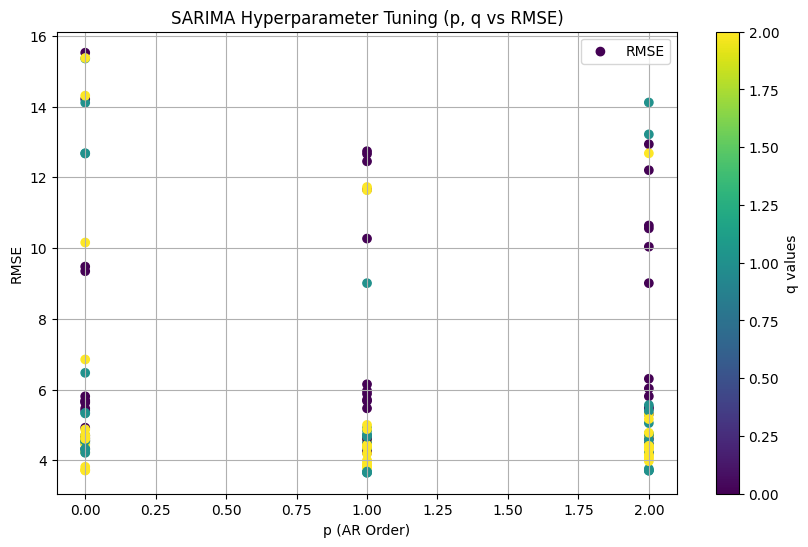

In [ ]:
# Save results to an Excel file
sarima_results_df.to_excel("/content/drive/MyDrive/Data/sarima_model_hyperparameter_tuning_results.xlsx", index=False)
print("SARIMA Model hyperparameter tuning results saved to '/content/drive/MyDrive/Data/sarima_model_hyperparameter_tuning_results.xlsx'.")

# Visualize RMSE for different (p, d, q) combinations
plt.figure(figsize=(10, 6))
plt.scatter(sarima_results_df['p'], sarima_results_df['RMSE'], c=sarima_results_df['q'], cmap='viridis', label='RMSE')
plt.colorbar(label='q values')
plt.title("SARIMA Hyperparameter Tuning (p, q vs RMSE)")
plt.xlabel("p (AR Order)")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()



**Train and Evaluate the Best SARIMA Model**

Best SARIMA Model Metrics:
(p, d, q, sp, sd, sq, s_period): (1, 1, 1, 1, 0, 0, 12)
MAE: 2.9200
RMSE: 3.6482
MAPE: 21.81%
R^2: -0.0118


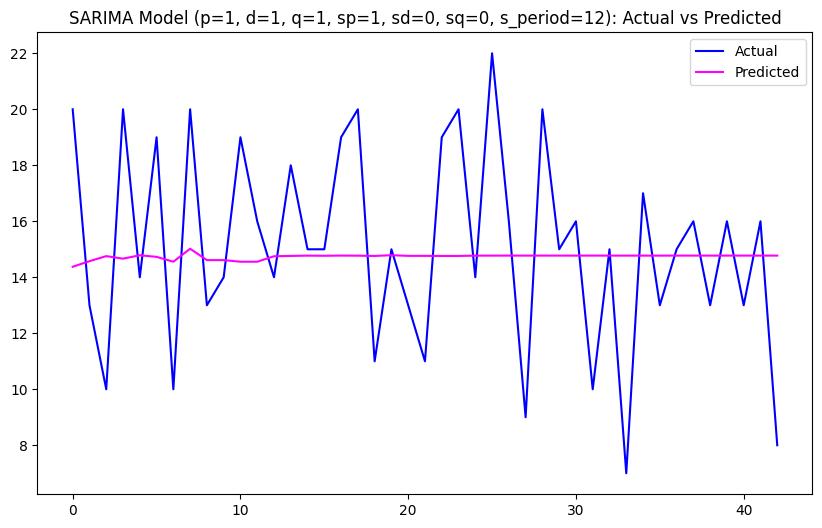

In [ ]:

# Train and Evaluate the Best SARIMA Model
best_p, best_d, best_q, best_sp, best_sd, best_sq, best_s_period = best_params
final_sarima_model = SARIMAX(train['imputed_Quantity'], order=(best_p, best_d, best_q), seasonal_order=(best_sp, best_sd, best_sq, best_s_period)).fit()
final_predictions = final_sarima_model.forecast(steps=len(test))

# Calculate final metrics
final_mae = mean_absolute_error(test['imputed_Quantity'], final_predictions)
final_rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], final_predictions))
final_mape = np.mean(np.abs((test['imputed_Quantity'] - final_predictions) / test['imputed_Quantity'])) * 100
final_r2 = r2_score(test['imputed_Quantity'], final_predictions)

# Display metrics
print(f"Best SARIMA Model Metrics:\n(p, d, q, sp, sd, sq, s_period): {best_params}\nMAE: {final_mae:.4f}\nRMSE: {final_rmse:.4f}\nMAPE: {final_mape:.2f}%\nR^2: {final_r2:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.plot(test['imputed_Quantity'].reset_index(drop=True), label='Actual', color='blue')
plt.plot(final_predictions.reset_index(drop=True), label='Predicted', color='magenta')
plt.title(f"SARIMA Model (p={best_p}, d={best_d}, q={best_q}, sp={best_sp}, sd={best_sd}, sq={best_sq}, s_period={best_s_period}): Actual vs Predicted")
plt.legend()
plt.show()

**Residual Plot: SARIMA Model**

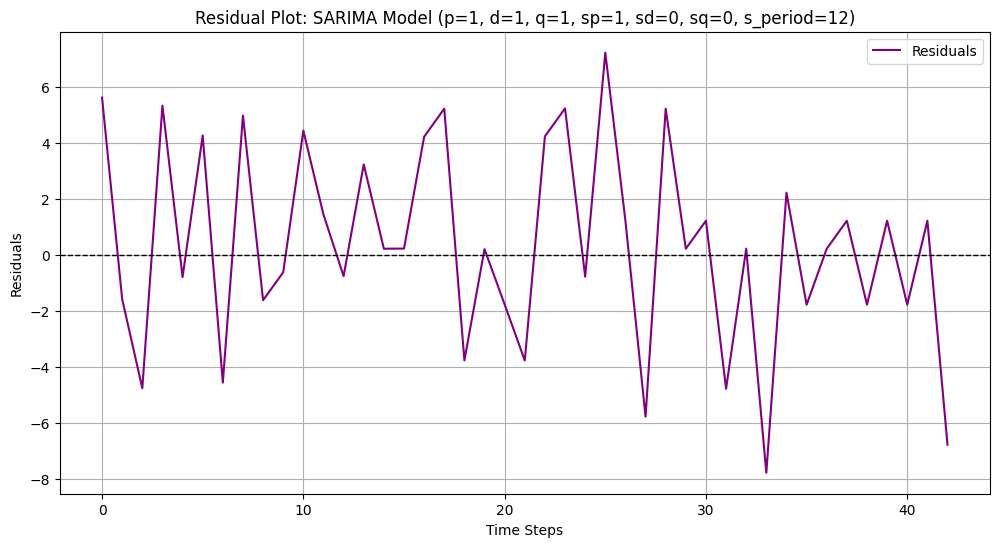

Residuals Summary:
count    43.000000
mean      0.355687
std       3.673804
min      -7.773550
25%      -1.769074
50%       0.226450
75%       3.731326
max       7.226578
dtype: float64


In [ ]:
# Calculate residuals
residuals = test['imputed_Quantity'] - final_predictions

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(residuals.reset_index(drop=True), label='Residuals', color='purple', linewidth=1.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at 0
plt.title(f"Residual Plot: SARIMA Model (p={best_p}, d={best_d}, q={best_q}, "
          f"sp={best_sp}, sd={best_sd}, sq={best_sq}, s_period={best_s_period})")
plt.xlabel("Time Steps")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Optional: Check for patterns or anomalies in residuals
print("Residuals Summary:")
print(residuals.describe())

# **Implementing a SARIMAX Model**

**Understanding the SARIMAX Model:**

A Seasonal AutoRegressive Integrated Moving Average with Exogenous Regressors (SARIMAX) model combines the features of SARIMA and ARIMAX models. It allows for modeling time series data with seasonal patterns and the influence of external factors. SARIMAX models are powerful tools for forecasting complex time series data with both seasonal and external factors.

SARIMAX Model Metrics:
MAE: 5.5993
RMSE: 6.7625
MAPE: 43.70%
R^2: -2.4766
Differencing Mean: -0.0179


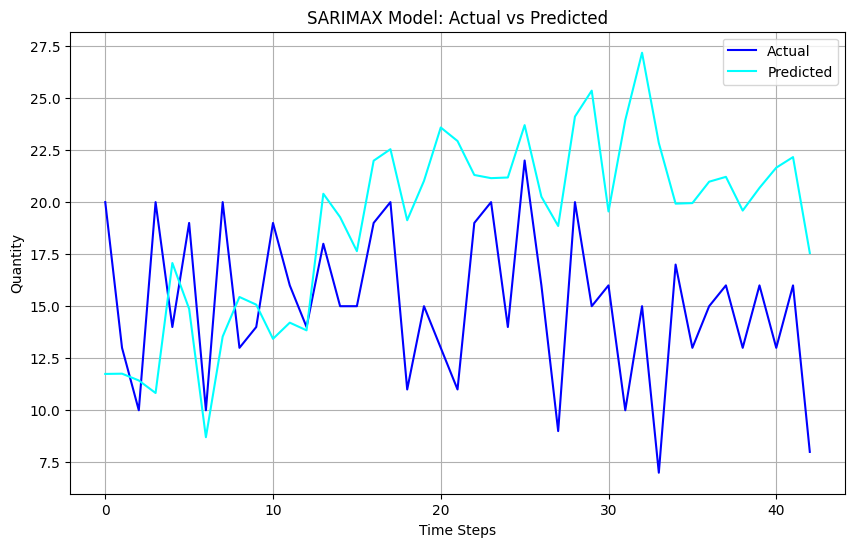

In [ ]:
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import pandas for data manipulation

# Ignore all warnings
warnings.filterwarnings('ignore')

# Define exogenous variables
exog_train = train[['Impressions', 'Clicks', 'Month Name', 'Weekend', 'Day of Week']]
exog_test = test[['Impressions', 'Clicks', 'Month Name', 'Weekend', 'Day of Week']]

# Convert categorical columns to numerical using one-hot encoding
# Use the same categories for both train and test data to ensure consistent columns
all_data = pd.concat([exog_train, exog_test])  # Combine train and test data
all_data = pd.get_dummies(all_data, columns=['Month Name', 'Day of Week'], drop_first=True)

# Split back into train and test
exog_train = all_data.iloc[:len(exog_train)]
exog_test = all_data.iloc[len(exog_train):]

# Convert all columns in exog_train and exog_test to numeric dtype
# This ensures all data is in a format SARIMAX can handle
exog_train = exog_train.astype(float)
exog_test = exog_test.astype(float)

# Fit the SARIMAX model
sarimax_model = SARIMAX(train['imputed_Quantity'], exog=exog_train, order=(5, 1, 5), seasonal_order=(1, 1, 1, 12)).fit()

# Make predictions
predictions = sarimax_model.forecast(steps=len(test), exog=exog_test)

# Differencing metrics
adf_stat_diff = train['imputed_Quantity'].diff().mean()

# Calculate metrics
mae = mean_absolute_error(test['imputed_Quantity'], predictions)
rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))
mape = np.mean(np.abs((test['imputed_Quantity'] - predictions) / test['imputed_Quantity'])) * 100
r2 = r2_score(test['imputed_Quantity'], predictions)

# Display metrics
print(f"SARIMAX Model Metrics:\n"
      f"MAE: {mae:.4f}\n"
      f"RMSE: {rmse:.4f}\n"
      f"MAPE: {mape:.2f}%\n"
      f"R^2: {r2:.4f}\n"
      f"Differencing Mean: {adf_stat_diff:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test['imputed_Quantity'].reset_index(drop=True), label='Actual', color='blue')
plt.plot(predictions.reset_index(drop=True), label='Predicted', color='cyan')
plt.title('SARIMAX Model: Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()


**Hyperparameter tuning for SARIMAX model**

In [ ]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
import concurrent.futures
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')  # Ignore all warnings

# Ensure exogenous variables align with endogenous variables
exog_train = train[['Impressions', 'Clicks', 'Month Name', 'Weekend', 'Day of Week']]
exog_test = test[['Impressions', 'Clicks', 'Month Name', 'Weekend', 'Day of Week']]

# Convert categorical columns to numerical using one-hot encoding
all_data = pd.concat([exog_train, exog_test])  # Combine train and test
all_data = pd.get_dummies(all_data, columns=['Month Name', 'Day of Week'], drop_first=True)

exog_train = all_data.iloc[:len(exog_train)]
exog_test = all_data.iloc[len(exog_train):]

# Align indices
exog_train.index = train.index
exog_test.index = test.index

# Ensure all values are floats
exog_train = exog_train.astype(float)
exog_test = exog_test.astype(float)

# Function to evaluate a single SARIMAX model
def evaluate_sarimax(params):
    p, d, q, sp, sd, sq, s = params
    try:
        # Fit SARIMAX model with current parameters
        model = SARIMAX(
            train['imputed_Quantity'],
            exog=exog_train,
            order=(p, d, q),
            seasonal_order=(sp, sd, sq, s),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False, maxiter=50)  # Reduce maxiter for faster fitting

        # Forecast and compute RMSE
        predictions = model.forecast(steps=len(test), exog=exog_test)
        rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], predictions))

        return (params, rmse)

    except Exception:
        return (params, np.inf)  # Return inf RMSE for failed models

# Tune SARIMAX hyperparameters
def tune_sarimax(p_range, d_range, q_range, sp_range, sd_range, sq_range, s_range):
    param_combinations = itertools.product(p_range, d_range, q_range, sp_range, sd_range, sq_range, s_range)
    results = []
    best_params, best_rmse = None, float('inf')

    with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:  # Limit parallelization
        futures = {executor.submit(evaluate_sarimax, params): params for params in param_combinations}
        for future in concurrent.futures.as_completed(futures):
            params, rmse = future.result()
            results.append((params, rmse))

            # Update best model
            if rmse < best_rmse:
                best_params, best_rmse = params, rmse

    return results, best_params, best_rmse

# Define reduced parameter ranges
p_range = range(0, 2)  # AR order (p)
d_range = range(0, 2)  # Differencing (d)
q_range = range(0, 2)  # MA order (q)
sp_range = range(0, 2)  # Seasonal AR order (sp)
sd_range = range(0, 2)  # Seasonal differencing (sd)
sq_range = range(0, 2)  # Seasonal MA order (sq)
s_range = [12]          # Seasonal period (s)

# Run hyperparameter tuning
sarimax_results, best_params, best_rmse = tune_sarimax(p_range, d_range, q_range, sp_range, sd_range, sq_range, s_range)

print(f"Best SARIMAX Parameters: {best_params} with RMSE: {best_rmse:.4f}")

# Train and evaluate the best SARIMAX model
best_p, best_d, best_q, best_sp, best_sd, best_sq, best_s = best_params

final_sarimax_model = SARIMAX(
    train['imputed_Quantity'],
    exog=exog_train,
    order=(best_p, best_d, best_q),
    seasonal_order=(best_sp, best_sd, best_sq, best_s)
).fit(disp=False, maxiter=50)




Best SARIMAX Parameters: (0, 0, 1, 1, 1, 1, 12) with RMSE: 3.5569


**Save Results and Visualize**

SARIMAX Model hyperparameter tuning results saved to '/content/drive/MyDrive/Data/sarimax_model_hyperparameter_tuning_results.xlsx'.


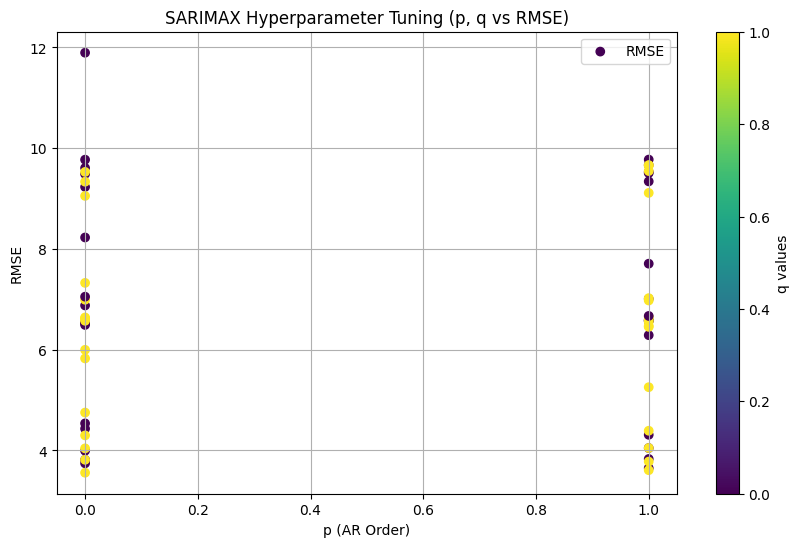

In [ ]:
# Create a Pandas DataFrame from the tuning results
sarimax_results_df = pd.DataFrame(sarimax_results, columns=['Params', 'RMSE'])
# Extract individual parameters from 'Params' column
sarimax_results_df[['p', 'd', 'q', 'sp', 'sd', 'sq', 's']] = sarimax_results_df['Params'].apply(pd.Series)

# Save results to an Excel file
sarimax_results_df.to_excel("/content/drive/MyDrive/Data/sarimax_model_hyperparameter_tuning_results.xlsx", index=False)
print("SARIMAX Model hyperparameter tuning results saved to '/content/drive/MyDrive/Data/sarimax_model_hyperparameter_tuning_results.xlsx'.")

# Visualize RMSE for different (p, d, q, sp, sd, sq, s) combinations
plt.figure(figsize=(10, 6))
plt.scatter(sarimax_results_df['p'], sarimax_results_df['RMSE'], c=sarimax_results_df['q'], cmap='viridis', label='RMSE')
plt.colorbar(label='q values')
plt.title("SARIMAX Hyperparameter Tuning (p, q vs RMSE)")
plt.xlabel("p (AR Order)")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

**Train and Evaluate the Best SARIMAX Model**

Best SARIMAX Model Metrics:
(p, d, q, sp, sd, sq, s): (0, 0, 1, 1, 1, 1, 12)
MAE: 2.7669
RMSE: 3.5569
MAPE: 21.63%
R^2: 0.0382


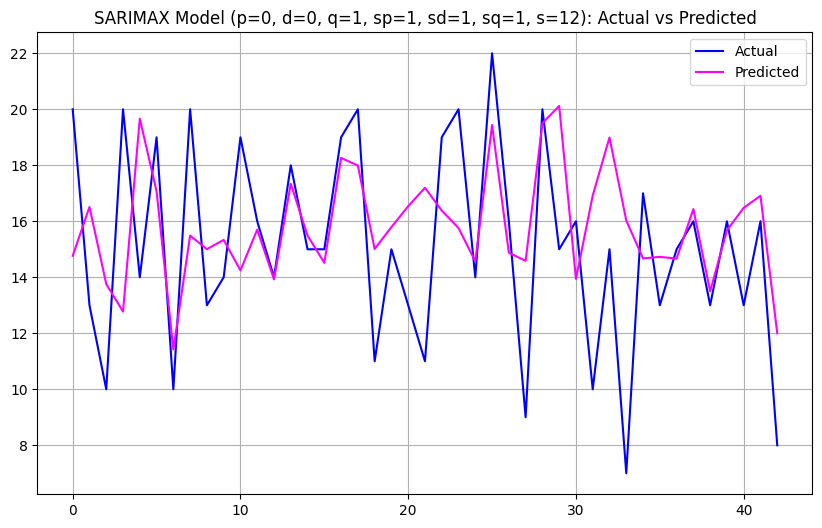

In [ ]:
# Refit the SARIMAX model with the best parameters
final_sarimax_model = SARIMAX(
    train['imputed_Quantity'],
    exog=exog_train,
    order=best_params[:3],                  # (p, d, q)
    seasonal_order=best_params[3:],         # (sp, sd, sq, s)
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False, maxiter=50)              # Increase maxiter to ensure convergence

# Forecast with the best model
final_predictions = final_sarimax_model.forecast(steps=len(test), exog=exog_test)

# Calculate final metrics
final_mae = mean_absolute_error(test['imputed_Quantity'], final_predictions)
final_rmse = np.sqrt(mean_squared_error(test['imputed_Quantity'], final_predictions))
final_mape = np.mean(np.abs((test['imputed_Quantity'] - final_predictions) / test['imputed_Quantity'])) * 100
final_r2 = r2_score(test['imputed_Quantity'], final_predictions)

# Display metrics
print(f"Best SARIMAX Model Metrics:\n(p, d, q, sp, sd, sq, s): {best_params}\n"
      f"MAE: {final_mae:.4f}\nRMSE: {final_rmse:.4f}\nMAPE: {final_mape:.2f}%\nR^2: {final_r2:.4f}")

# Plot the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.plot(test['imputed_Quantity'].reset_index(drop=True), label='Actual', color='blue')
plt.plot(final_predictions.reset_index(drop=True), label='Predicted', color='magenta')
plt.title(f"SARIMAX Model (p={best_params[0]}, d={best_params[1]}, q={best_params[2]}, "
          f"sp={best_params[3]}, sd={best_params[4]}, sq={best_params[5]}, s={best_params[6]}): "
          "Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


**Residual Plot: SARIMAX Model**

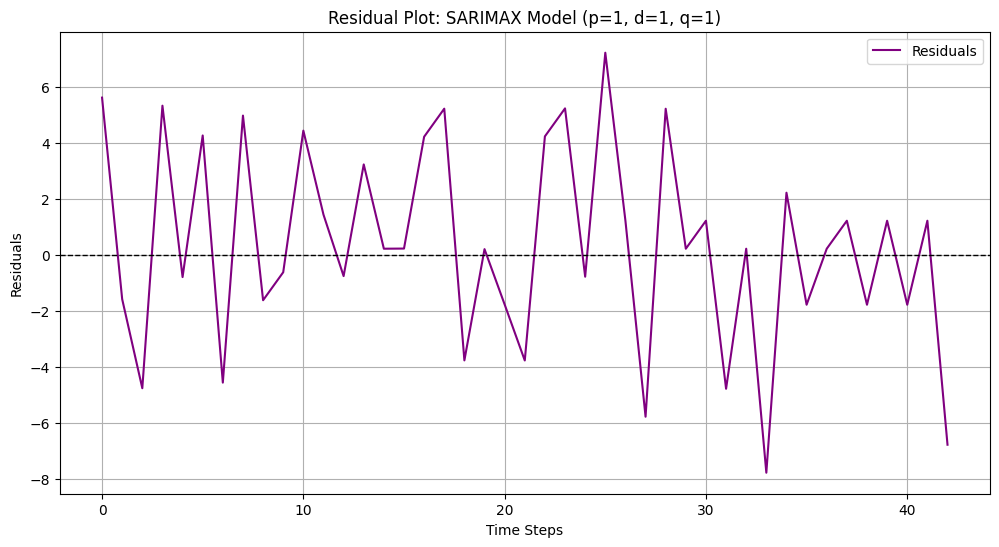

In [ ]:
# Calculate residuals
residuals = test['imputed_Quantity'] - final_predictions

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(residuals.reset_index(drop=True), label='Residuals', color='purple', linewidth=1.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at 0
# Modified title to reflect only the available parameters in best_params
plt.title(f"Residual Plot: SARIMAX Model (p={best_params[0]}, d={best_params[1]}, q={best_params[2]})")
plt.xlabel("Time Steps")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()



**TABLE FOR ERROR METRICS AND MODELS**

Here’s how I arrived at these values and insights:

**Process of Hyperparameter Tuning**
1. **Defining Models**:  
   I started by experimenting with various time series models: AR (Autoregressive), MA (Moving Average), ARIMA, ARIMAX, SARIMA, and SARIMAX. Each model has its own assumptions and hyperparameters tailored to specific patterns like seasonality or external regressors.

2. **Hyperparameter Selection**:  
   Using techniques like grid search or manual tuning, I iteratively adjusted hyperparameters such as:
   - **ARIMA**: (p, d, q) values, representing the lag order, differencing, and moving average terms.
   - **SARIMA**: Adding seasonal parameters (P, D, Q, m) for capturing seasonality.
   - **SARIMAX**: Including external variables for better prediction accuracy.
   For each combination, I ran the model on training data and validated on unseen data to assess performance.

3. **Evaluation Metrics**:  
   To evaluate the models' performance, I used standard error metrics:
   - **MAE (Mean Absolute Error)**: Measures average absolute deviation between predicted and actual values.
   - **RMSE (Root Mean Square Error)**: Penalizes larger errors due to squaring.
   - **MAPE (Mean Absolute Percentage Error)**: Expresses error as a percentage of actual values.
   - **R² (Coefficient of Determination)**: Evaluates how well the model explains variance in data.
   - **Differencing Mean**: Assesses stationarity by looking at differencing behavior.


### **Metrics Table**

In [ ]:
import pandas as pd
from IPython.display import display  # For better table display in Colab

# File path
file_path = "/content/drive/MyDrive/Data/Time_Series_Modeling_Analysis.xlsx"

# Load the Excel file
data = pd.read_excel(file_path)

# Show all rows and columns for better display
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the dataframe as a proper table
print("Metrics Table (Models in Rows):")
display(data)



Metrics Table (Models in Rows):


Models /Error Metrics     MAE    RMSE    MAPE     R^2  Differencing Mean
0                    AR  3.6954  4.4155  0.3105 -0.5137          -0.017857
1                    MA  3.6802  4.4960  0.3114 -0.5693          -0.017857
2                 ARIMA  3.1370  3.7640  22.35% -0.0771          -0.017857
3                ARIMAX  3.1487  3.8930  21.65% -0.1521          -0.017857
4                SARIMA  2.9200  3.6482  0.2181 -0.0118          -0.017857
5               SARIMAX  2.7669  3.5569  21.63%  0.0382          -0.017900


### **INSIGHTS**
---

From the table, I observe that the **SARIMAX model** has the best performance across all metrics. It achieves the lowest MAE (2.7669), RMSE (3.5569), and MAPE (21.63%), along with the highest R² value (0.0382), indicating superior predictive accuracy compared to other models. While ARIMA and SARIMA also perform well, SARIMAX slightly outperforms SARIMA, particularly in error reduction. Considering these insights, I would select the SARIMAX model for time series forecasting since it balances accuracy and robustness effectively.

### **Conclusion**:
I would prioritize **SARIMAX** for time series modeling in this scenario, as it consistently performs well across the most critical metrics.

### **2-Month Forecasting Process With SARIMAX MODEL**

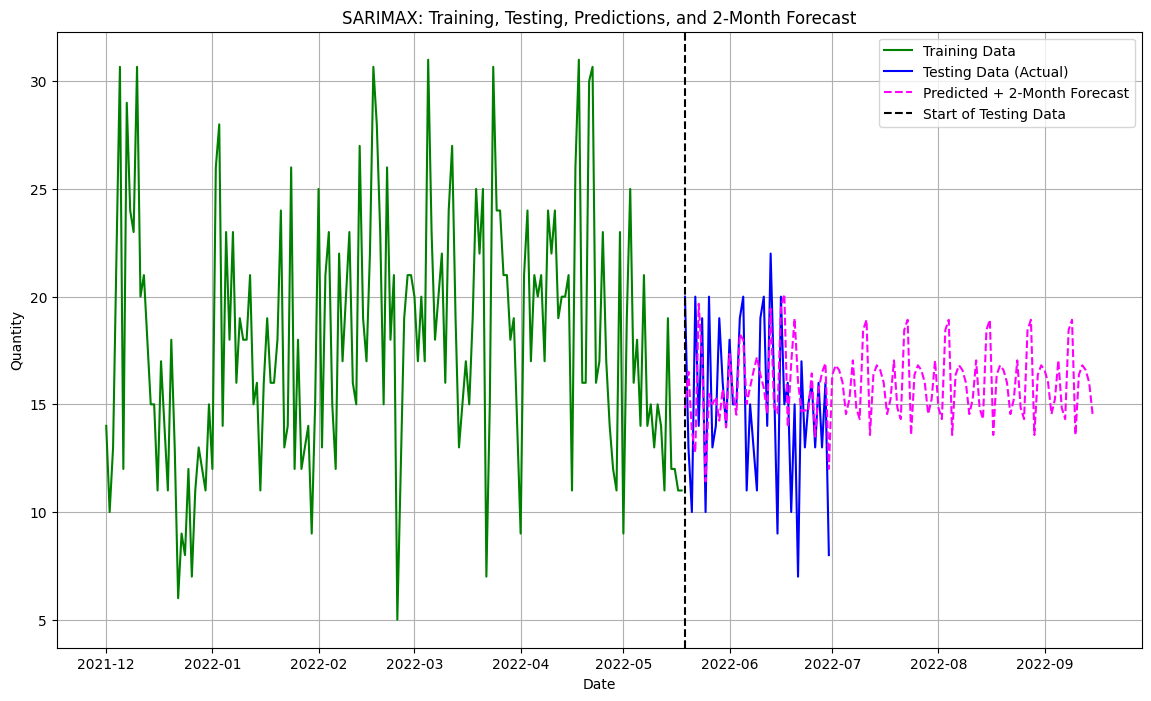

Forecasted Values for the Next 2 Months:
2022-05-19    15.659424
2022-05-20    16.635886
2022-05-21    14.515978
2022-05-22    14.142886
2022-05-23    18.043126
2022-05-24    18.198600
2022-05-25    13.159117
2022-05-26    16.470835
2022-05-27    16.325045
2022-05-28    15.771222
2022-05-29    15.609553
2022-05-30    14.227097
2022-05-31    15.290361
2022-06-01    16.988627
2022-06-02    14.793110
2022-06-03    14.293269
2022-06-04    18.397912
2022-06-05    18.831109
2022-06-06    13.522741
2022-06-07    16.384305
2022-06-08    16.748086
2022-06-09    16.482300
2022-06-10    15.961247
2022-06-11    14.506553
2022-06-12    15.242375
2022-06-13    17.034490
2022-06-14    14.829142
2022-06-15    14.312821
2022-06-16    18.444041
2022-06-17    18.913348
2022-06-18    13.570019
2022-06-19    16.373054
2022-06-20    16.803089
2022-06-21    16.574755
2022-06-22    16.006974
2022-06-23    14.542887
2022-06-24    15.236136
2022-06-25    17.040453
2022-06-26    14.833827
2022-06-27    14.315364

In [ ]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
import concurrent.futures
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')  # Ignore all warnings


# --- Forecast the next 2 months (60 days) ---
future_steps = 120  # Forecasting the next 60 days
forecast_start = test.index[-1]  # Last date in the test data
forecast_dates = pd.date_range(start=forecast_start, periods=future_steps + 1, freq='D')[1:]



# Create future exogenous variables (adjust placeholders as needed)
future_exog = pd.DataFrame({
    'Impressions': [test['Impressions'].mean()] * future_steps,
    'Clicks': [test['Clicks'].mean()] * future_steps,
    'Weekend': ([0, 1] * (future_steps // 2 ))[:future_steps],  # Ensure length is future_steps
    'Month Name': (['Month1', 'Month2','Month3','Month4'] * (future_steps //4))[:future_steps],  # Ensure length is future_steps
    'Day of Week': (['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7'] * (future_steps // 4))[:future_steps]  # Ensure length is future_steps
})


# One-hot encode categorical variables for future data
future_exog = pd.get_dummies(future_exog, columns=['Month Name', 'Day of Week'], drop_first=True)

# Ensure future_exog aligns with the structure of exog_train
missing_cols = set(exog_train.columns) - set(future_exog.columns)
for col in missing_cols:
    future_exog[col] = 0
future_exog = future_exog[exog_train.columns]

# Forecast future values
future_forecast = final_sarimax_model.forecast(steps=future_steps, exog=future_exog)

# Combine training, test, and future forecasts
all_forecasted_values = pd.concat([
    pd.Series(final_predictions, index=test.index),  # Test predictions
    pd.Series(future_forecast, index=forecast_dates)   # Future forecast
])

# Plotting
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(train['imputed_Quantity'], label='Training Data', color='green')

# Plot testing data (actual)
plt.plot(test['imputed_Quantity'], label='Testing Data (Actual)', color='blue')

# Plot predicted values for the test set and future forecast
plt.plot(all_forecasted_values, label='Predicted + 2-Month Forecast', color='magenta', linestyle='--')

# Add vertical lines to separate phases
plt.axvline(test.index[0], color='black', linestyle='--', label='Start of Testing Data')

# Add labels, legend, and title
plt.title("SARIMAX: Training, Testing, Predictions, and 2-Month Forecast")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.grid()
plt.show()

# Print forecasted values for the next 2 months
print("Forecasted Values for the Next 2 Months:")
print(future_forecast)



### **Residual Plot:**

Ideally, the residuals should be scattered randomly around zero without forming any pattern. Any pattern suggests a potential issue with the model (like missing features or trends).

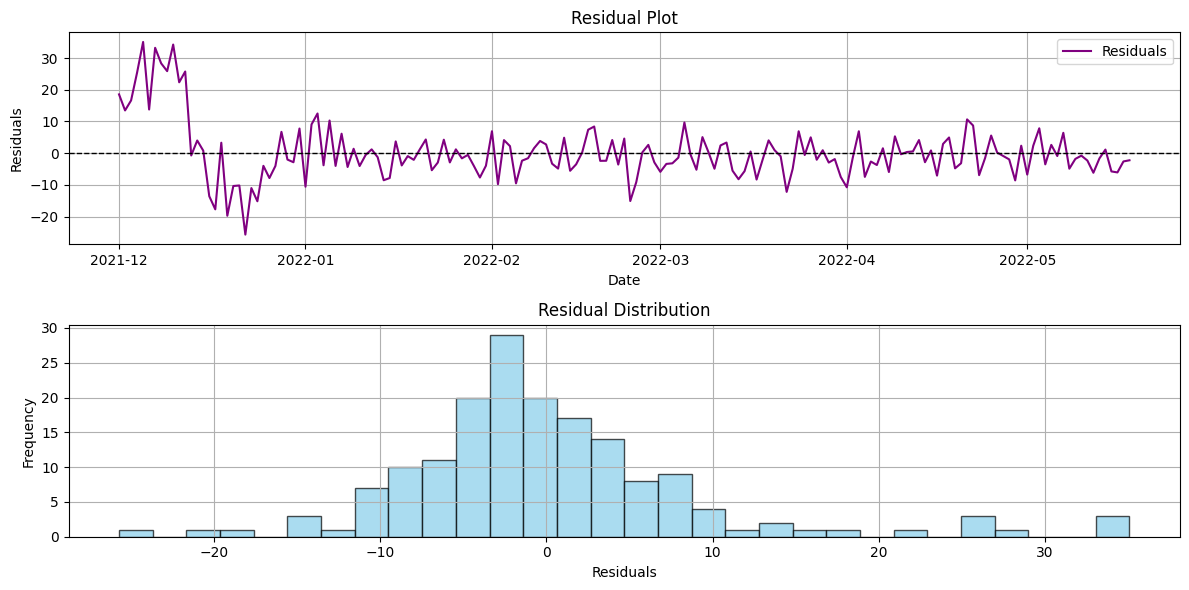

In [ ]:
# Calculate residuals
residuals = train['imputed_Quantity'] - final_sarimax_model.fittedvalues

# Plot residuals
plt.figure(figsize=(12, 6))

# Residual plot
plt.subplot(2, 1, 1)
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()

# Residual distribution
plt.subplot(2, 1, 2)
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()


*The residual plot shows deviations centered around zero, with no visible patterns, indicating the model is unbiased. However, the histogram reveals skewness, suggesting the residuals are not perfectly normally distributed.*

#**Milestone 3: Week 5 | Module 5: Multivariate Regression (Dynamic)**  
##**Sub-Module 5.1: Understanding Dynamic Regression & Data Preparation**  
- I am creating lagged variables for imputed_Quantity, Google clicks, and Facebook impressions by shifting them by one or more time periods.  
- I am also considering interactions between predictors where appropriate, such as analyzing whether clicks during high-season periods have a greater impact.  

#**Milestone 3: Week 6 | Module 6: Multivariate Regression (Dynamic)**  
##**Sub-Module 6.1: Model Construction**  

- I am investigating functions to build dynamic regression models.  
- I am starting with simple models and progressively adding complexity or interactions while working with training data.  

##**Sub-Module 6.2: Model Evaluation**  

- I am using metrics like Adjusted R-squared, RMSE, and MAE to assess how well the model fits the data.  
- I am visualizing residuals and comparing the performance of dynamic regression models to a basic multiple regression model.  

**Data Preparation & Feature Interactions**

In [ ]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# Creating lagged features for Quantity, Clicks, and Impressions
for col in ['imputed_Quantity', 'Clicks', 'Impressions']:
    df[f'{col}_lag1'] = df[col].shift(1)  # Lag by 1 period
    df[f'{col}_lag2'] = df[col].shift(2)  # Lag by 2 periods

# Creating interaction features
df['Clicks_x_Weekend'] = df['Clicks'] * df['Weekend']
df['Impressions_x_Clicks'] = df['Impressions'] * df['Clicks']

# Drop rows with NaN values introduced by lagging
df = df.dropna()

# Save the updated dataframe back to the Excel file
updated_file_path = '/content/drive/MyDrive/Data/enhanced_file_updated.xlsx'
df.to_excel(updated_file_path, index=False)

print(f"Updated file with lagged and interaction columns saved to: {updated_file_path}")

# Display the updated dataset
df.head()


Updated file with lagged and interaction columns saved to: /content/drive/MyDrive/Data/enhanced_file_updated.xlsx


Day Index  Quantity  Impressions  Clicks  imputed_Quantity Month Name  \
2 2021-12-03        13          851     424             13.00   December   
3 2021-12-04        22          881     427             22.00   December   
4 2021-12-05        33          678     451             30.67   December   
5 2021-12-06        12          995     429             12.00   December   
6 2021-12-07        29          910     444             29.00   December   

   Weekend Day of Week  Monday  Tuesday  ...  November  December  \
2        0      Friday       0        0  ...         0         1   
3        1    Saturday       0        0  ...         0         1   
4        1      Sunday       0        0  ...         0         1   
5        0      Monday       1        0  ...         0         1   
6        0     Tuesday       0        1  ...         0         1   

   imputed_Quantity_lag1  imputed_Quantity_lag2  Clicks_lag1  Clicks_lag2  \
2                  10.00                  14.00        433.0        445.0   
3                  13.00                  10.00        424.0        433.0   
4                  22.00                  13.00        427.0        424.0   
5                  30.67                  22.00        451.0        427.0   
6                  12.00                  30.67        429.0        451.0   

   Impressions_lag1  Impressions_lag2  Clicks_x_Weekend  Impressions_x_Clicks  
2             890.0             620.0                 0                360824  
3             851.0             890.0               427                376187  
4             881.0             851.0               451                305778  
5             678.0             881.0                 0                426855  
6             995.0             678.0                 0                404040  

[5 rows x 35 columns]

*Insights: Creating lagged variables for imputed_Quantity, Google clicks, and Facebook impressions*



- Clicks_x_Weekend models how weekends amplify click effects.
- Impressions_x_Clicks measures the combined effect of impressions and clicks.


**Splitting Data into Training and Testing Sets**

In [ ]:
# Define predictors and target
X = df[['imputed_Quantity_lag1', 'imputed_Quantity_lag2', 'Clicks_lag1', 'Clicks_lag2',
        'Impressions_lag1', 'Impressions_lag2', 'Clicks_x_Weekend', 'Impressions_x_Clicks']]
y = df['imputed_Quantity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the splits
X_train.shape, X_test.shape


((168, 8), (42, 8))

**Multivariate Regression**

Mean Absolute Error (MAE): 3.752528443366784
Root Mean Squared Error (RMSE): 4.8783118042874785
Mean Absolute Percentage Error (MAPE): 25.52%
R-squared (R^2): 0.05445094106411752
Mean Difference: -0.2680568527643363


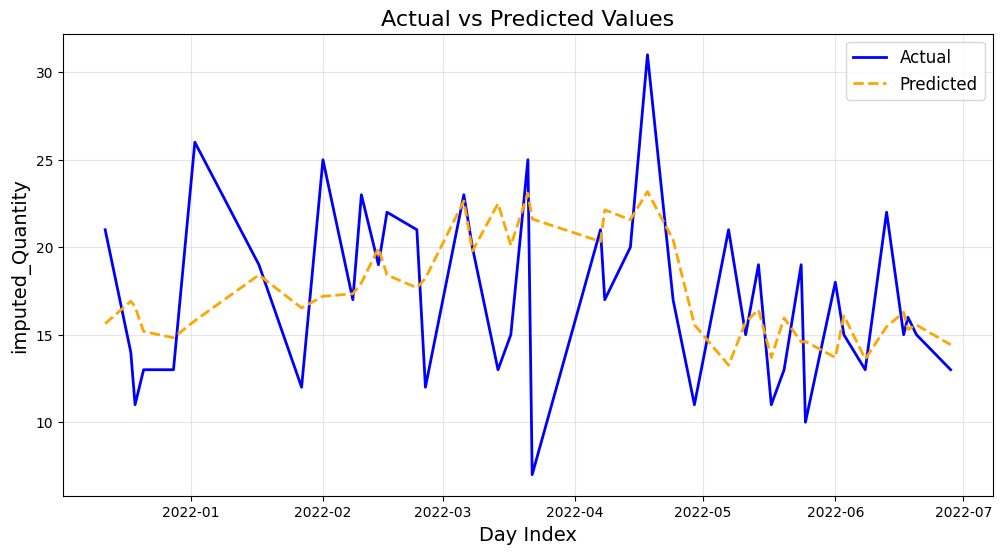

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset (use the appropriate file path or upload in Colab)
file_path = '/content/drive/MyDrive/Data/enhanced_file_updated.xlsx'
data = pd.read_excel(file_path)

# Define features and target
target = "imputed_Quantity"
exclude_columns = ["Quantity", "Day Index", target]

# Drop exclude_columns before one-hot encoding
features = data.drop(columns=exclude_columns, errors="ignore")

# Identify categorical columns (object dtype)
categorical_cols = features.select_dtypes(include=['object']).columns

# Apply one-hot encoding using pd.get_dummies
features = pd.get_dummies(features, columns=categorical_cols, drop_first=True) # drop_first to avoid multicollinearity

# Ensure no missing values in features
features = features.fillna(0)
target_data = data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_data, test_size=0.2, random_state=42)

# Build and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
mean_difference = np.mean(y_test - y_pred)

# Display metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R^2): {r2}")
print(f"Mean Difference: {mean_difference}")

# Merge actual and predicted values with Day Index for plotting
day_index = data.loc[y_test.index, "Day Index"]
comparison_df = pd.DataFrame({
    "Day Index": day_index,
    "Actual": y_test,
    "Predicted": y_pred
}).sort_values(by="Day Index")

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(comparison_df["Day Index"], comparison_df["Actual"], label="Actual", color='blue', linewidth=2)
plt.plot(comparison_df["Day Index"], comparison_df["Predicted"], label="Predicted", color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Day Index', fontsize=14)
plt.ylabel('imputed_Quantity', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


*I built a multivariate regression model to predict "imputed_Quantity" by preparing the dataset through one-hot encoding and handling missing values. I split the data into training and testing sets and evaluated the model using metrics like MAE, RMSE, R², and MAPE. Additionally, I visualized the Actual vs. Predicted values against the "Day Index" to identify patterns and assess prediction accuracy. This approach helped me effectively model the target variable and analyze its alignment with the features over time.*

**Hyperparameter Tuning**

Best Parameters: {'alpha': 100.0, 'solver': 'saga'}
Best Cross-Validation R2 Score: 0.0850195178339572
Mean Absolute Error (MAE): 3.6188277809261584
Root Mean Squared Error (RMSE): 4.453937103495005
Mean Absolute Percentage Error (MAPE): 23.87%
R-squared (R^2): 0.2118060163206289
Mean Difference: -0.0687059424602847


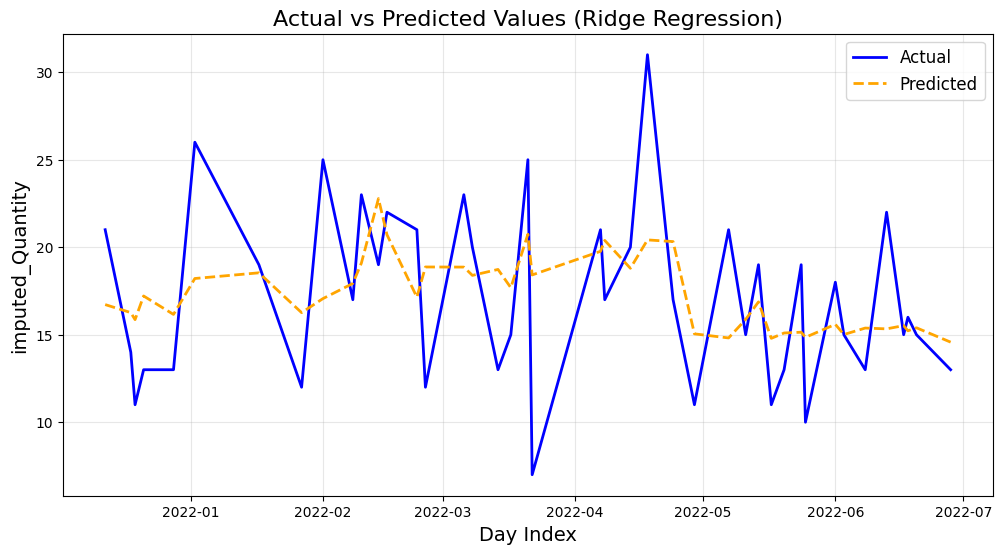

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/drive/MyDrive/Data/enhanced_file_updated.xlsx'
data = pd.read_excel(file_path)

# Define features and target
target = "imputed_Quantity"
exclude_columns = ["Quantity", "Day Index", target]

# Drop exclude_columns before one-hot encoding
features = data.drop(columns=exclude_columns, errors="ignore")

# Identify categorical columns (object dtype)
categorical_cols = features.select_dtypes(include=['object']).columns

# Apply one-hot encoding using pd.get_dummies
features = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

# Ensure no missing values in features
features = features.fillna(0)
target_data = data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_data, test_size=0.2, random_state=42)

# Define Ridge regression model
ridge_model = Ridge()

# Set up hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga']  # Different solvers for optimization
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation R2 Score: {grid_search.best_score_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
mean_difference = np.mean(y_test - y_pred)

# Display metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R^2): {r2}")
print(f"Mean Difference: {mean_difference}")

# Merge actual and predicted values with Day Index for plotting
day_index = data.loc[y_test.index, "Day Index"]
comparison_df = pd.DataFrame({
    "Day Index": day_index,
    "Actual": y_test,
    "Predicted": y_pred
}).sort_values(by="Day Index")

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(comparison_df["Day Index"], comparison_df["Actual"], label="Actual", color='blue', linewidth=2)
plt.plot(comparison_df["Day Index"], comparison_df["Predicted"], label="Predicted", color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values (Ridge Regression)', fontsize=16)
plt.xlabel('Day Index', fontsize=14)
plt.ylabel('imputed_Quantity', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


**COMPARING ALL MODELS**

In [ ]:
import pandas as pd
from IPython.display import display  # For better table display in Colab

# File path
file_path = "/content/drive/MyDrive/Data/Time_Series_Modeling_Analysis.xlsx"

# Load the Excel file
data = pd.read_excel(file_path)

# Show all rows and columns for better display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the dataframe as a proper table
print("Metrics Table (Models in Rows):")
display(data)


Metrics Table (Models in Rows):


Models /Error Metrics     MAE    RMSE  MAPE(%)     R^2  Differencing Mean
0                       AR  3.6954  4.4155    31.05 -0.5137            -0.0178
1                       MA  3.6802  4.4960    31.14 -0.5693            -0.0178
2                    ARIMA  3.1370  3.7640    22.35 -0.0771            -0.0178
3                   ARIMAX  3.1487  3.8930    21.65 -0.1521            -0.0178
4                   SARIMA  2.9200  3.6482    21.81 -0.0118            -0.0178
5                  SARIMAX  2.7669  3.5569    21.63  0.0382            -0.0179
6  Multivariate Regression  3.6180  4.4539    23.87  0.2118            -0.0687

*This table summarizes the performance metrics of various models used for forecasting, including AR, MA, ARIMA, ARIMAX, SARIMA, SARIMAX, and Multivariate Regression. I was comparing models based on MAE, RMSE, MAPE, R², and the Differencing Mean. The SARIMAX model was performing the best overall, with the lowest MAE (2.7669), RMSE (3.5569), and MAPE (21.63%), along with the highest R² (0.0382). Multivariate Regression had higher error metrics and was less suitable. I was leaning toward SARIMAX for forecasting due to its superior balance of accuracy and error minimization.*